# 데이터셋

https://dacon.io/competitions/official/235743/overview/description

# 라이브러리

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from glob import glob

In [2]:
# 모든 행 볼 수 있게 옵션 변경
# pd.set_option('display.max_rows', None)

# 데이터 불러오기

In [3]:
# 파일 목록 확인
file_name = glob('data/*.csv')
file_name

['data\\dinnerseperated.csv',
 'data\\sample_submission.csv',
 'data\\test.csv',
 'data\\train.csv']

In [4]:
# train, test 불러오기
train = pd.read_csv(file_name[-1])
test = pd.read_csv(file_name[-2])

In [5]:
train

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0     2016-02-01  월   2601      50     150             238          0.0   
1     2016-02-02  화   2601      50     173             319          0.0   
2     2016-02-03  수   2601      56     180             111          0.0   
3     2016-02-04  목   2601     104     220             355          0.0   
4     2016-02-05  금   2601     278     181              34          0.0   
...          ... ..    ...     ...     ...             ...          ...   
1200  2021-01-20  수   2983      75     198               4        391.0   
1201  2021-01-21  목   2983      92     231             462        351.0   
1202  2021-01-22  금   2983     255     248               1        303.0   
1203  2021-01-25  월   2983     107     153             616        327.0   
1204  2021-01-26  화   2983      69     183             551        362.0   

                                                   조식메뉴  \
0     모닝롤/찐빵  우유/두유/주스 계란후라이  호두죽/쌀밥 (쌀:국내산) 된장찌개  쥐...   
1     모닝롤/단호박샌드  우유/두유/주스 계란후라이  팥죽/쌀밥 (쌀:국내산) 호박젓국찌...   
2     모닝롤/베이글  우유/두유/주스 계란후라이  표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...   
3     모닝롤/토마토샌드  우유/두유/주스 계란후라이  닭죽/쌀밥 (쌀,닭:국내산) 근대국...   
4     모닝롤/와플  우유/두유/주스 계란후라이  쇠고기죽/쌀밥 (쌀:국내산) 재첩국  방...   
...                                                 ...   
1200  모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...   
1201  모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...   
1202  모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...   
1203  모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...   
1204  모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...   

                                                   중식메뉴  \
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2     카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   
...                                                 ...   
1200  쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...   
1201  쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...   
1202  전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...   
1203  쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...   
1204  쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...   

                                                   석식메뉴     중식계    석식계  
0     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039.0  331.0  
1     콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867.0  560.0  
2     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017.0  573.0  
3     미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978.0  525.0  
4     쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925.0  330.0  
...                                                 ...     ...    ...  
1200     김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치   1093.0  421.0  
1201            흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치    832.0  353.0  
1202        흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치    579.0  217.0  
1203            흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치   1145.0  502.0  
1204         (New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기   1015.0  480.0  

[1205 rows x 12 columns]

In [6]:
test

일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0   2021-01-27  수   2983      88     182               5        358.0   
1   2021-01-28  목   2983     104     212             409        348.0   
2   2021-01-29  금   2983     270     249               0        294.0   
3   2021-02-01  월   2924     108     154             538        322.0   
4   2021-02-02  화   2924      62     186             455        314.0   
5   2021-02-03  수   2924      59     199               5        286.0   
6   2021-02-04  목   2924      61     211             476        288.0   
7   2021-02-05  금   2924     169     252               0        256.0   
8   2021-02-08  월   2924      88     174             690        329.0   
9   2021-02-09  화   2924      94     183             542        329.0   
10  2021-02-10  수   2924     489     134               0        233.0   
11  2021-02-15  월   2924     178     131             795        355.0   
12  2021-02-16  화   2924      70     175             815        413.0   
13  2021-02-17  수   2924      77     181               3        379.0   
14  2021-02-18  목   2924      83     247             594        338.0   
15  2021-02-19  금   2924     176     268               1        280.0   
16  2021-02-22  월   2924     105     197             814        247.0   
17  2021-02-23  화   2924      75     200             783        233.0   
18  2021-02-24  수   2924      77     235               3        234.0   
19  2021-02-25  목   2924      91     252             585        235.0   
20  2021-02-26  금   2924     261     279               1        179.0   
21  2021-03-02  화   2975     139     166             781        248.0   
22  2021-03-03  수   2975      50     195               1        292.0   
23  2021-03-04  목   2975      72     236             746        263.0   
24  2021-03-05  금   2975     158     257               2        226.0   
25  2021-03-08  월   2975      97     170             939        264.0   
26  2021-03-09  화   2975      76     170            1003        282.0   
27  2021-03-10  수   2975      71     185               1        271.0   
28  2021-03-11  목   2975      93     223             609        261.0   
29  2021-03-12  금   2975     241     240               0        251.0   
30  2021-03-15  월   2975     126     148             864        314.0   
31  2021-03-16  화   2975      74     176             658        401.0   
32  2021-03-17  수   2975      90     192               4        371.0   
33  2021-03-18  목   2975     106     231             520        351.0   
34  2021-03-19  금   2975     253     255               0        266.0   
35  2021-03-22  월   2975     133     166             707        350.0   
36  2021-03-23  화   2975      82     205             688        349.0   
37  2021-03-24  수   2975      87     234               0        314.0   
38  2021-03-25  목   2975     118     260             441        297.0   
39  2021-03-26  금   2975     311     266               0        229.0   
40  2021-03-29  월   2975     121     178             660        318.0   
41  2021-03-30  화   2975      83     198             625        313.0   
42  2021-03-31  수   2975      86     217               0        317.0   
43  2021-04-01  목   2973      88     256             394        303.0   
44  2021-04-02  금   2973     275     272               0        224.0   
45  2021-04-05  월   2973     125     174             704        331.0   
46  2021-04-06  화   2973      76     170             636        364.0   
47  2021-04-07  수   2973      96     214               1        334.0   
48  2021-04-08  목   2973     105     238             509        324.0   
49  2021-04-09  금   2973     259     268               0        229.0   

                                                 조식메뉴  \
0   모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...   
1   모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...   
2   모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...   
3   모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...   
4  

In [7]:
# 결측치 확인
train.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [8]:
# info 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [9]:
# 데이터 타입 변경
train['일자'] = pd.to_datetime(train['일자'])
train['요일'] = pd.to_datetime(train['일자']).dt.dayofweek + 1
train['현본사소속재택근무자수'] = train['현본사소속재택근무자수'].astype(int)
train['중식계'] = train['중식계'].astype(int)
train['석식계'] = train['석식계'].astype(int)

test['일자'] = pd.to_datetime(test['일자'])
test['요일'] = pd.to_datetime(test['일자']).dt.dayofweek + 1
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype(int)

In [10]:
# 연도, 월, 일 파생변수 만들기
train['연도'] =  train['일자'].astype(str).str[:4].astype(int)
train['월'] = train['일자'].astype(str).str[5:7].astype(int)
train['일'] = train['일자'].astype(str).str[-2:].astype(int)

test['연도'] =  test['일자'].astype(str).str[:4].astype(int)
test['월'] = test['일자'].astype(str).str[5:7].astype(int)
test['일'] = test['일자'].astype(str).str[-2:].astype(int)

In [11]:
# 식사 가능 인원 파생변수 만들기
train['식사가능인원'] = train['본사정원수'] - train['본사휴가자수'] - train['본사출장자수'] - train['현본사소속재택근무자수']

test['식사가능인원'] = test['본사정원수'] - test['본사휴가자수'] - test['본사출장자수'] - test['현본사소속재택근무자수']

In [12]:
# 컬럼 정리
train = train[['일자', '연도', '월', '일', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '현본사소속재택근무자수',
               '식사가능인원', '본사시간외근무명령서승인건수', '중식메뉴', '석식메뉴', '중식계', '석식계']]

In [13]:
train = train.rename(columns = {'본사정원수' : '정원수', '본사휴가자수' : '휴가자수',
                        '본사출장자수' : '출장자수', '본사시간외근무명령서승인건수' :  '야근수',
                        '현본사소속재택근무자수' :  '재택근무자수'}).copy()

In [14]:
test = test.rename(columns = {'본사정원수' : '정원수', '본사휴가자수' : '휴가자수',
                        '본사출장자수' : '출장자수', '본사시간외근무명령서승인건수' :  '야근수',
                        '현본사소속재택근무자수' :  '재택근무자수'}).copy()

In [15]:
# 확인
train.head()

일자    연도  월  일  요일   정원수  휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
0 2016-02-01  2016  2  1   1  2601    50   150       0    2401  238   
1 2016-02-02  2016  2  2   2  2601    50   173       0    2378  319   
2 2016-02-03  2016  2  3   3  2601    56   180       0    2365  111   
3 2016-02-04  2016  2  4   4  2601   104   220       0    2277  355   
4 2016-02-05  2016  2  5   5  2601   278   181       0    2142   34   

                                                중식메뉴  \
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 (쇠고기:호주산) 계란찜 ...   
1  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개  가자미튀김  모둠소세지구이  마늘쫑무...   
2  카레덮밥 (쌀,현미흑미:국내산) 팽이장국  치킨핑거 (닭고기:국내산) 쫄면야채무침 ...   
3  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국  주꾸미볶음  부추전  시금치나물  ...   
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국  돈육씨앗강정 (돼지고기:국내산) 우엉잡채...   

                                                석식메뉴   중식계  석식계  
0  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침 ...  1039  331  
1  콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국  유산슬 (쇠고기:호주산) 아삭고추무...   867  560  
2  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개  황태양념구이 (황태:러시아산) 고기...  1017  573  
3  미니김밥*겨자장 (쌀,현미흑미:국내산) 우동  멕시칸샐러드  군고구마  무피클  포...   978  525  
4  쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...   925  330

In [16]:
# describe 확인
train.describe()

연도            월            일           요일          정원수  \
count  1205.000000  1205.000000  1205.000000  1205.000000  1205.000000   
mean   2018.052282     6.512033    15.947718     3.006639  2807.815768   
std       1.433958     3.453906     8.650452     1.415372   171.264404   
min    2016.000000     1.000000     1.000000     1.000000  2601.000000   
25%    2017.000000     4.000000     9.000000     2.000000  2645.000000   
50%    2018.000000     7.000000    16.000000     3.000000  2760.000000   
75%    2019.000000     9.000000    23.000000     4.000000  2962.000000   
max    2021.000000    12.000000    31.000000     5.000000  3305.000000   

              휴가자수         출장자수       재택근무자수       식사가능인원          야근수  \
count  1205.000000  1205.000000  1205.000000  1205.000000  1205.000000   
mean    157.913693   241.142739    43.506224  2365.253112   274.117012   
std     144.190572    43.532298   109.937400   176.563062   246.239651   
min      23.000000    41.000000     0.000000  1372.000000     0.000000   
25%      71.000000   217.000000     0.000000  2281.000000     4.000000   
50%     105.000000   245.000000     0.000000  2357.000000   299.000000   
75%     185.000000   272.000000     0.000000  2461.000000   452.000000   
max    1224.000000   378.000000   533.000000  2921.000000  1044.000000   

               중식계          석식계  
count  1205.000000  1205.000000  
mean    890.334440   461.772614  
std     209.505057   139.179202  
min     296.000000     0.000000  
25%     758.000000   406.000000  
50%     879.000000   483.000000  
75%    1032.000000   545.000000  
max    1459.000000   905.000000

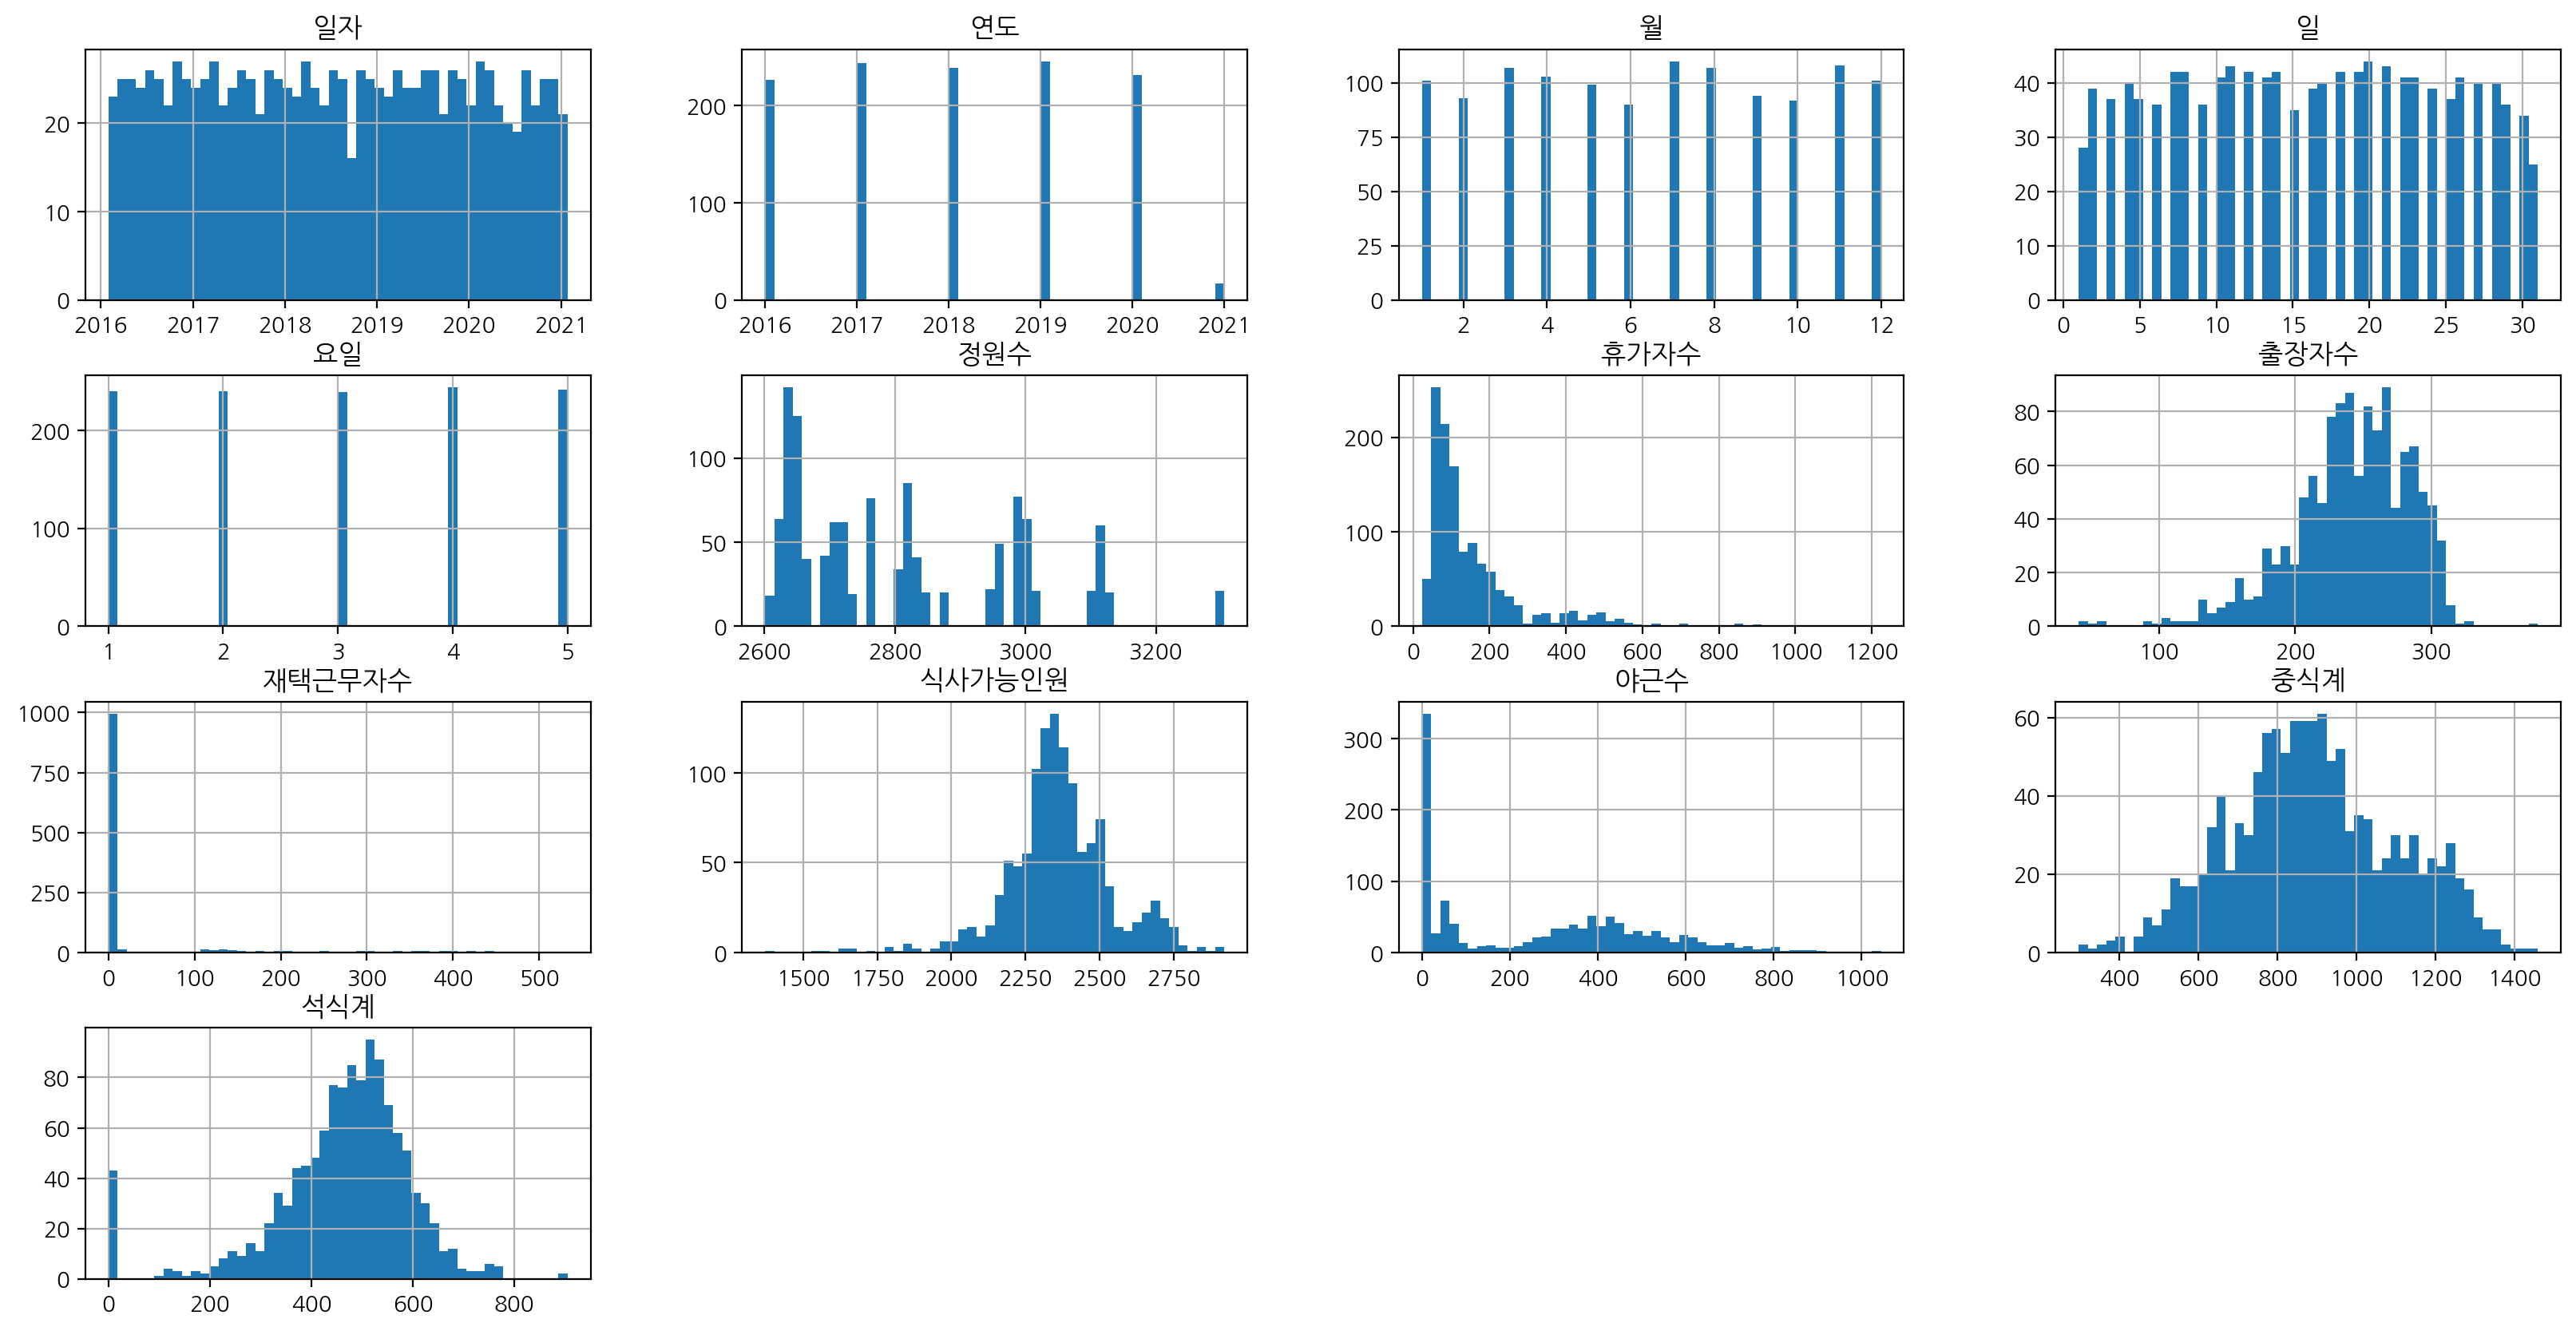

In [17]:
# 히스토그램
train.hist(bins=50, figsize=(20, 10));

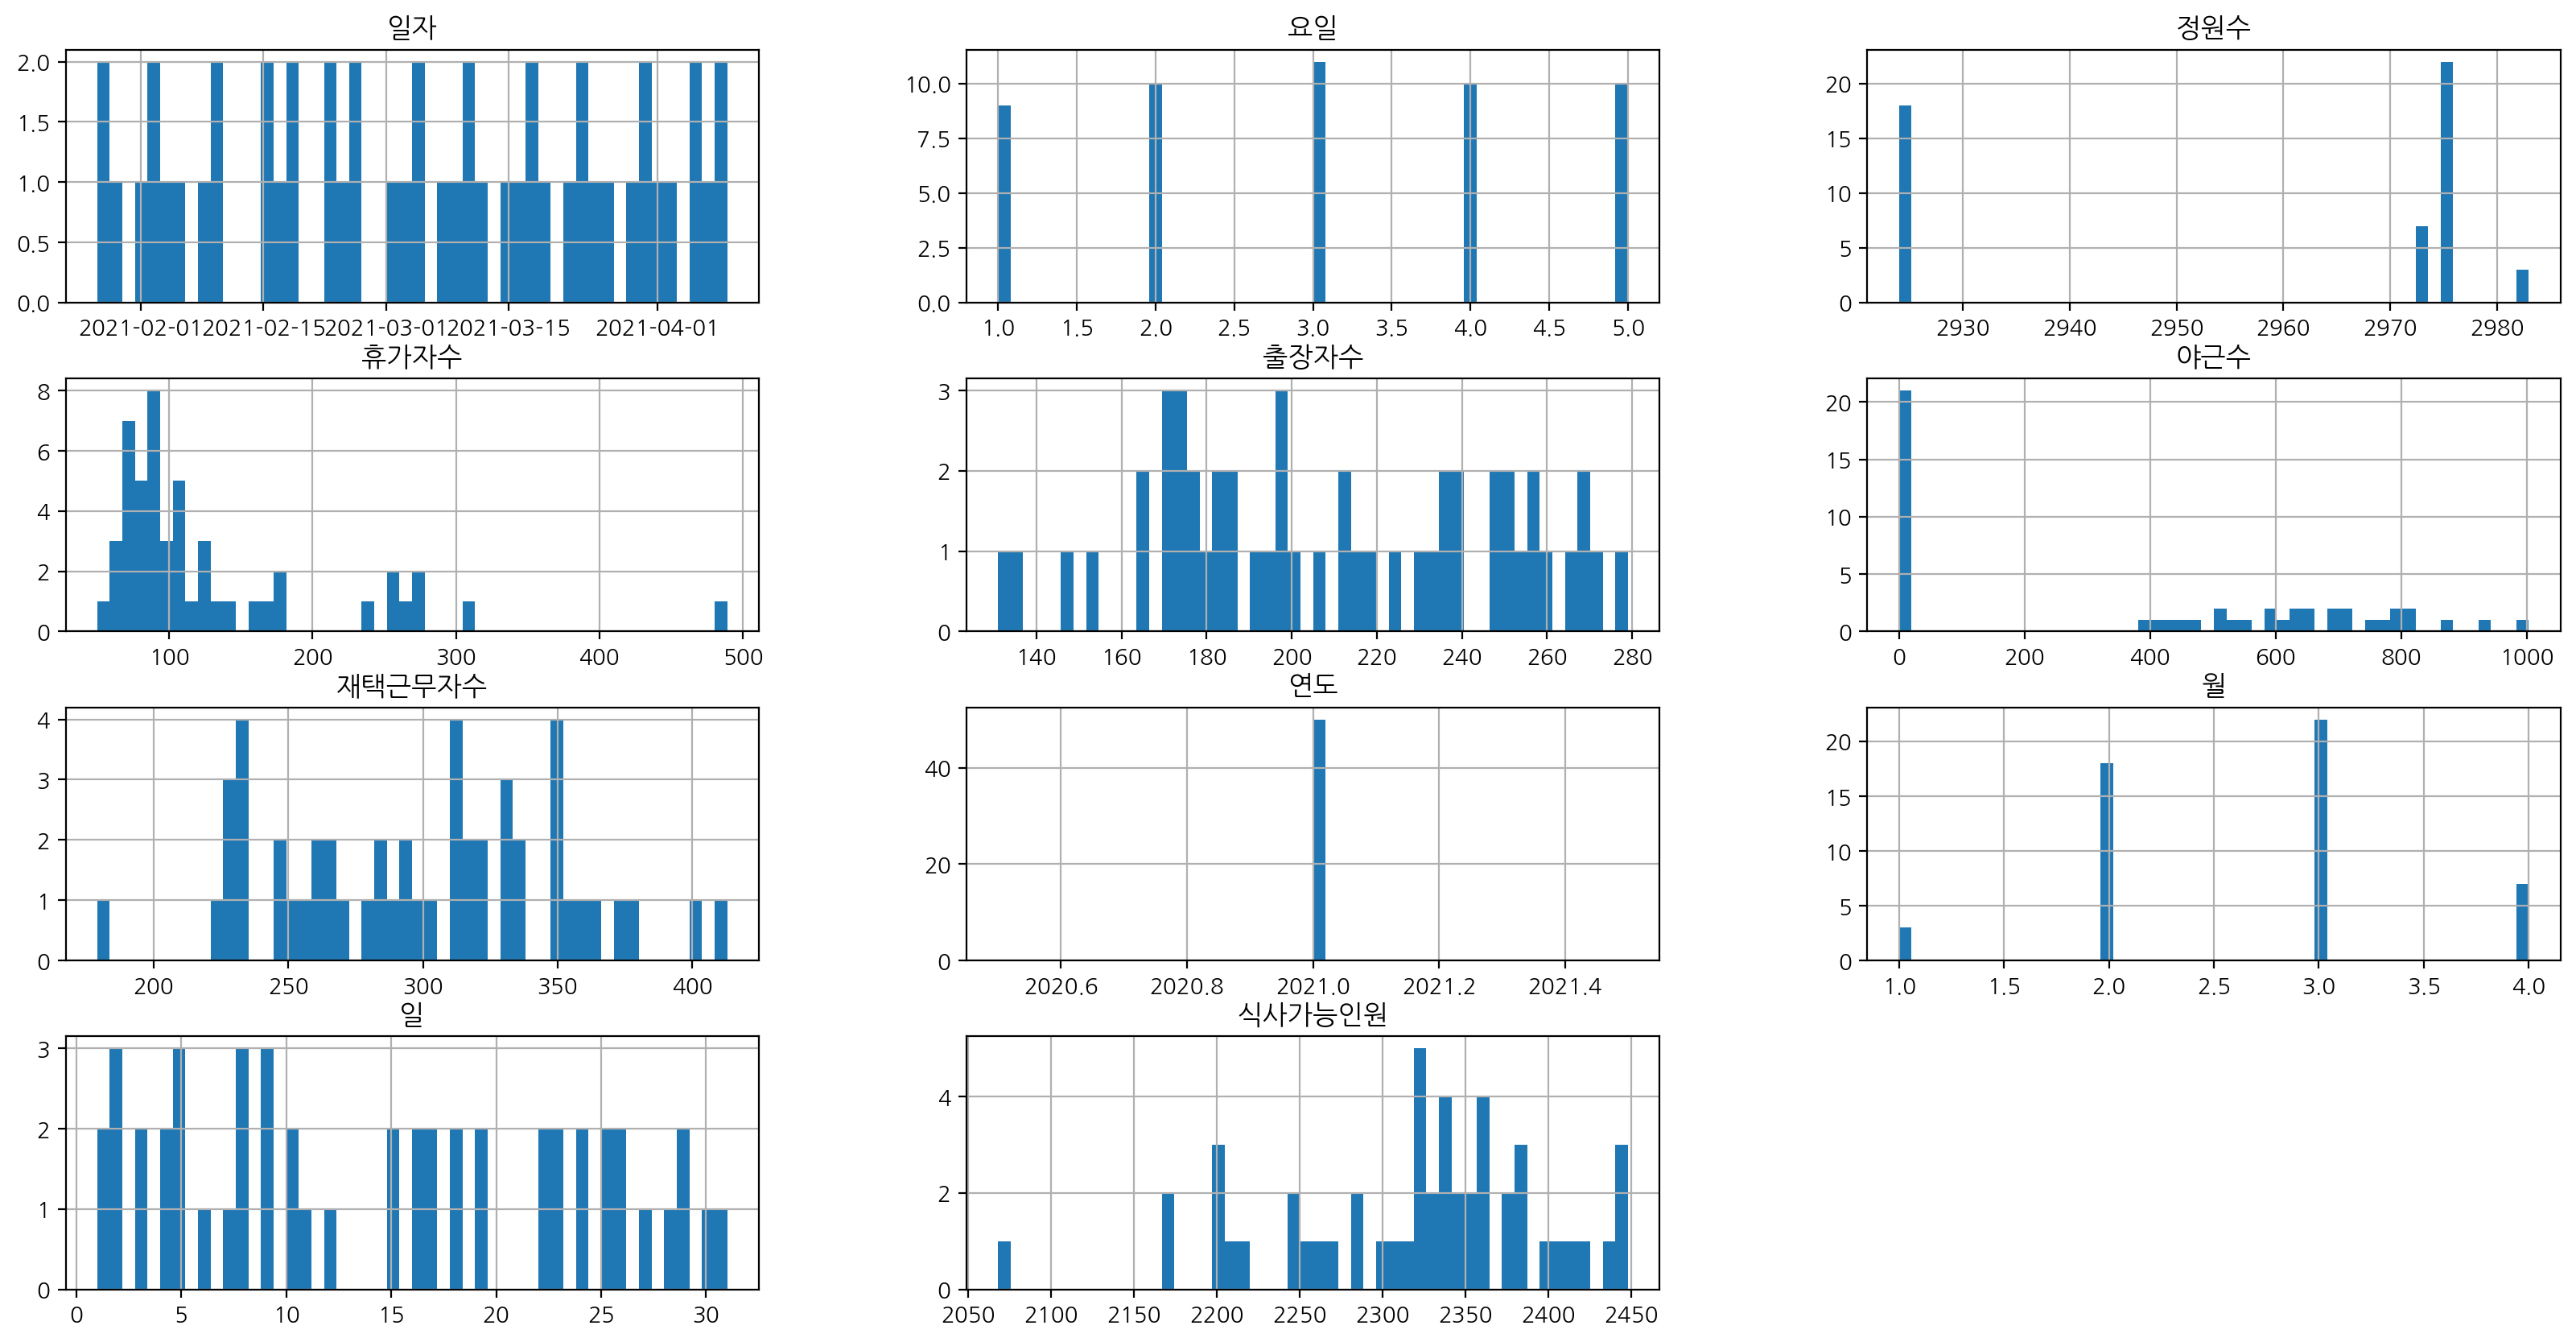

In [18]:
# 히스토그램
test.hist(bins=50, figsize=(20, 10));

* 21년도 데이터는 적구나
* 식사가능인원의 분포는 레이블 스무딩이 따로 필요 없을 듯
* 본사시간외근무명령서승인건수는 첨도를 조절할 필요가 있어보인다.

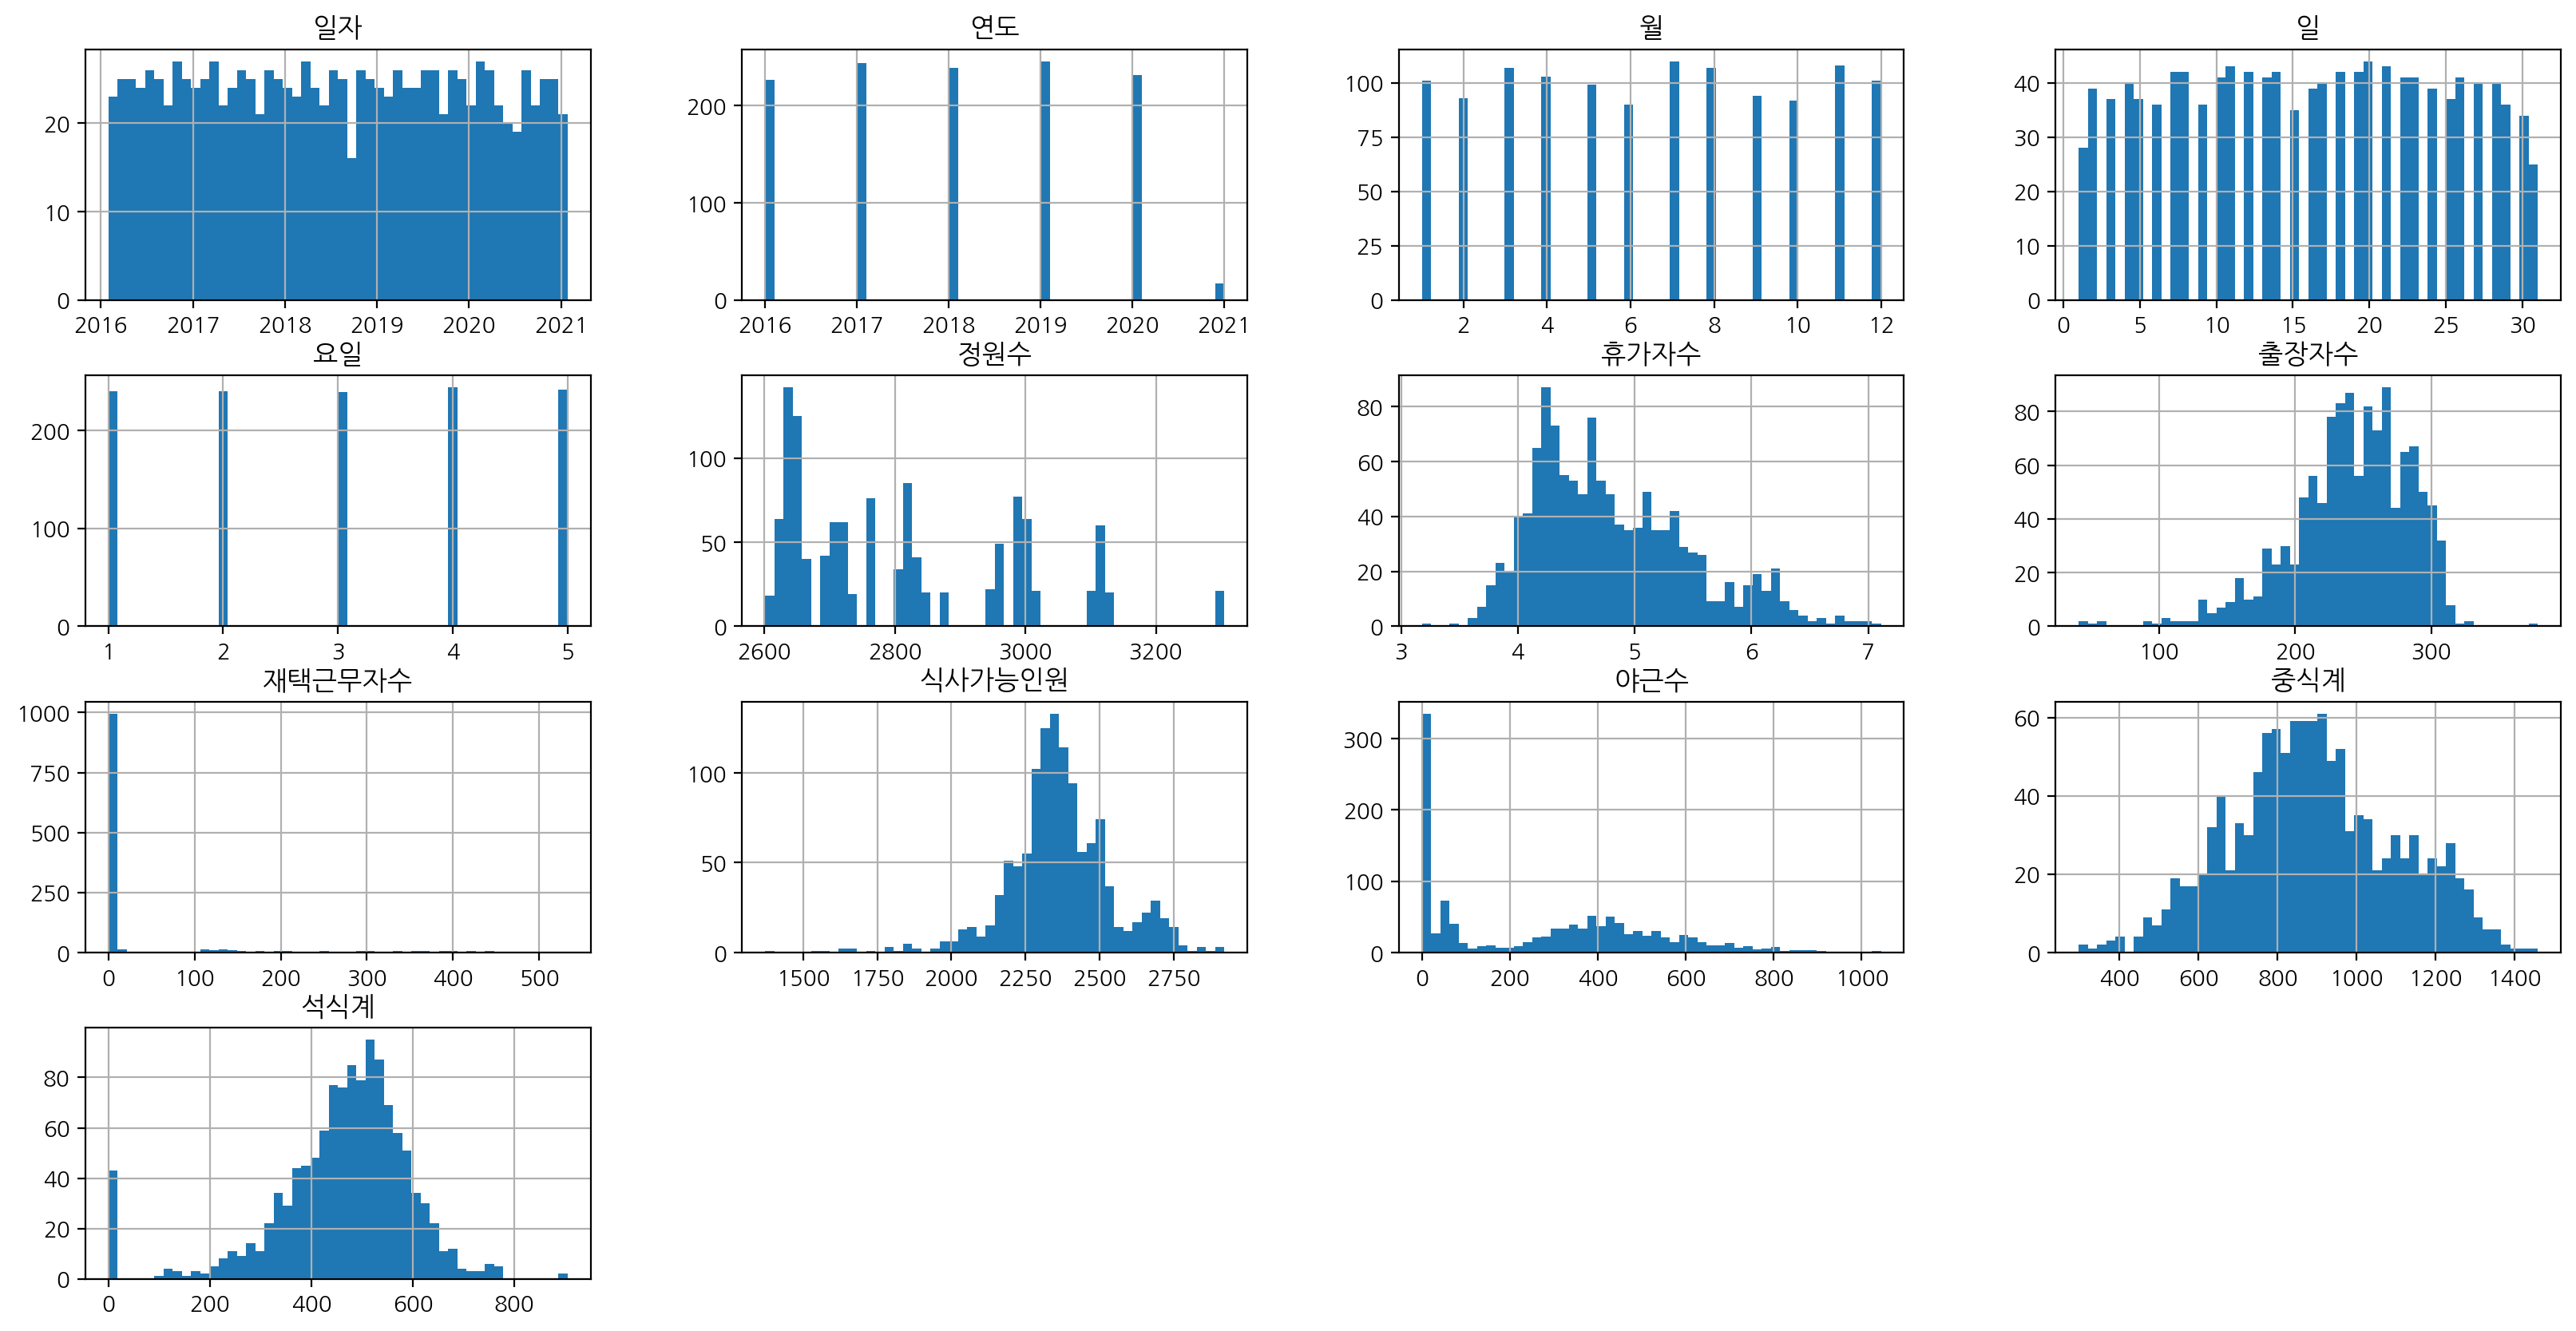

In [19]:
# 휴가자수 정규분포화
train['휴가자수'] = np.log1p(train['휴가자수'])
test['휴가자수'] = np.log1p(test['휴가자수'])

train.hist(bins=50, figsize=(20, 10));

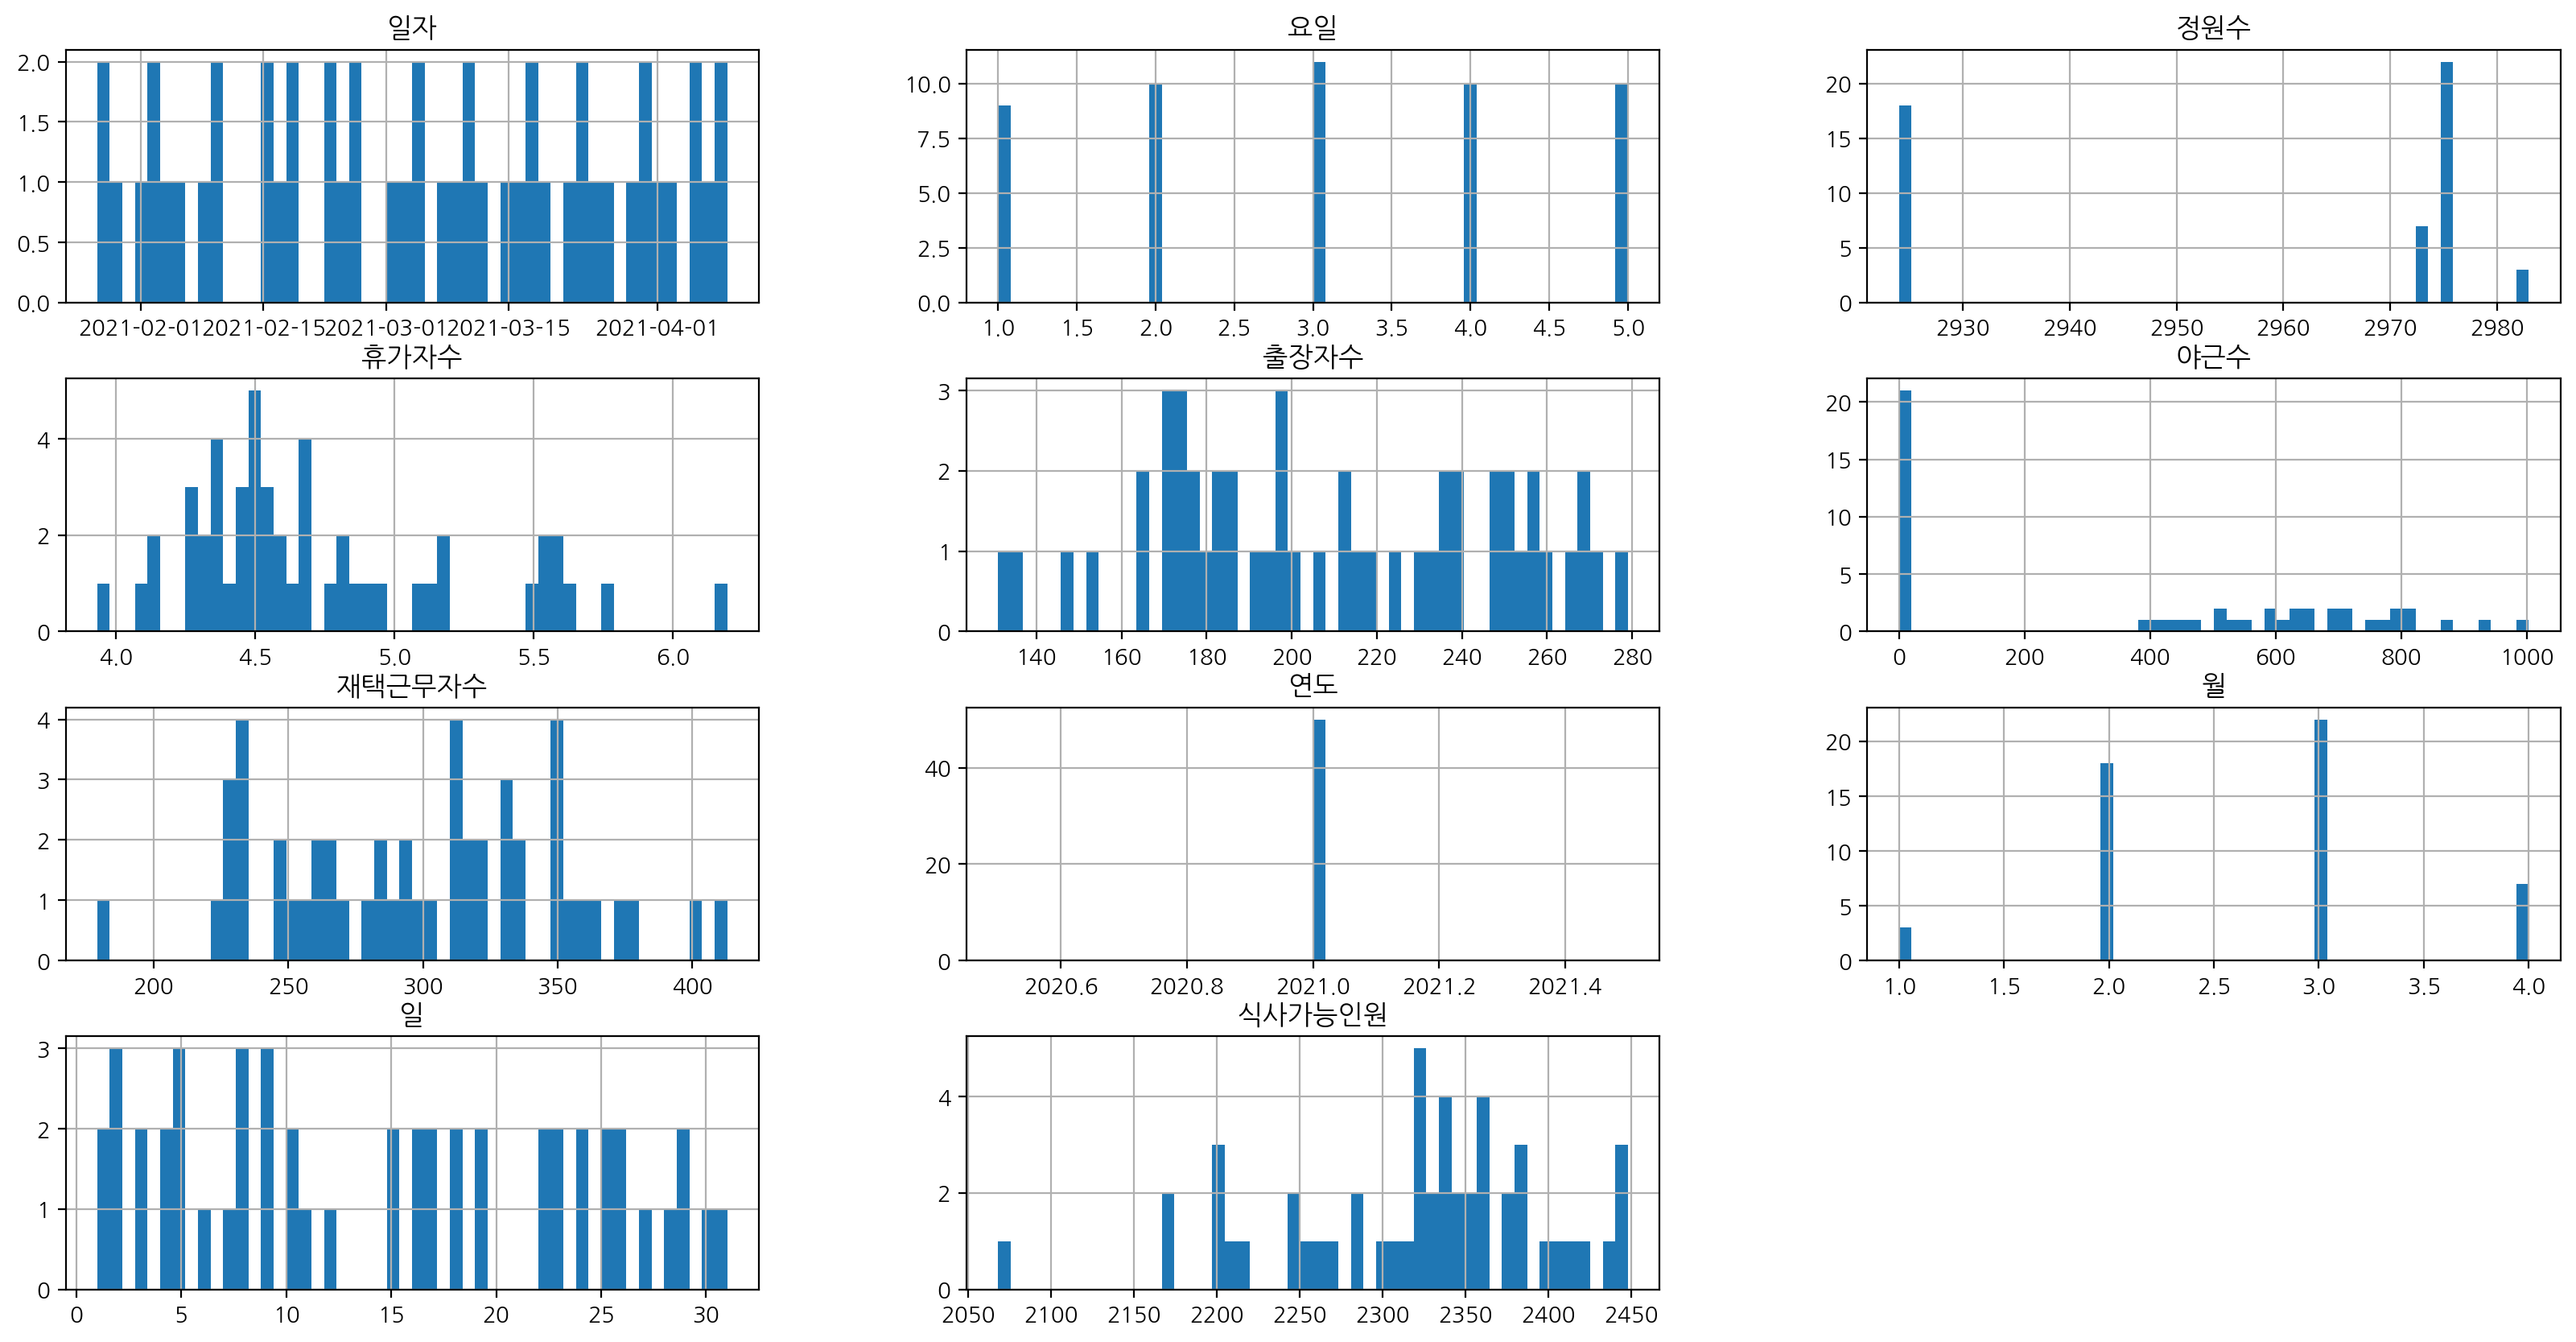

In [20]:
test.hist(bins=50, figsize=(20, 10));

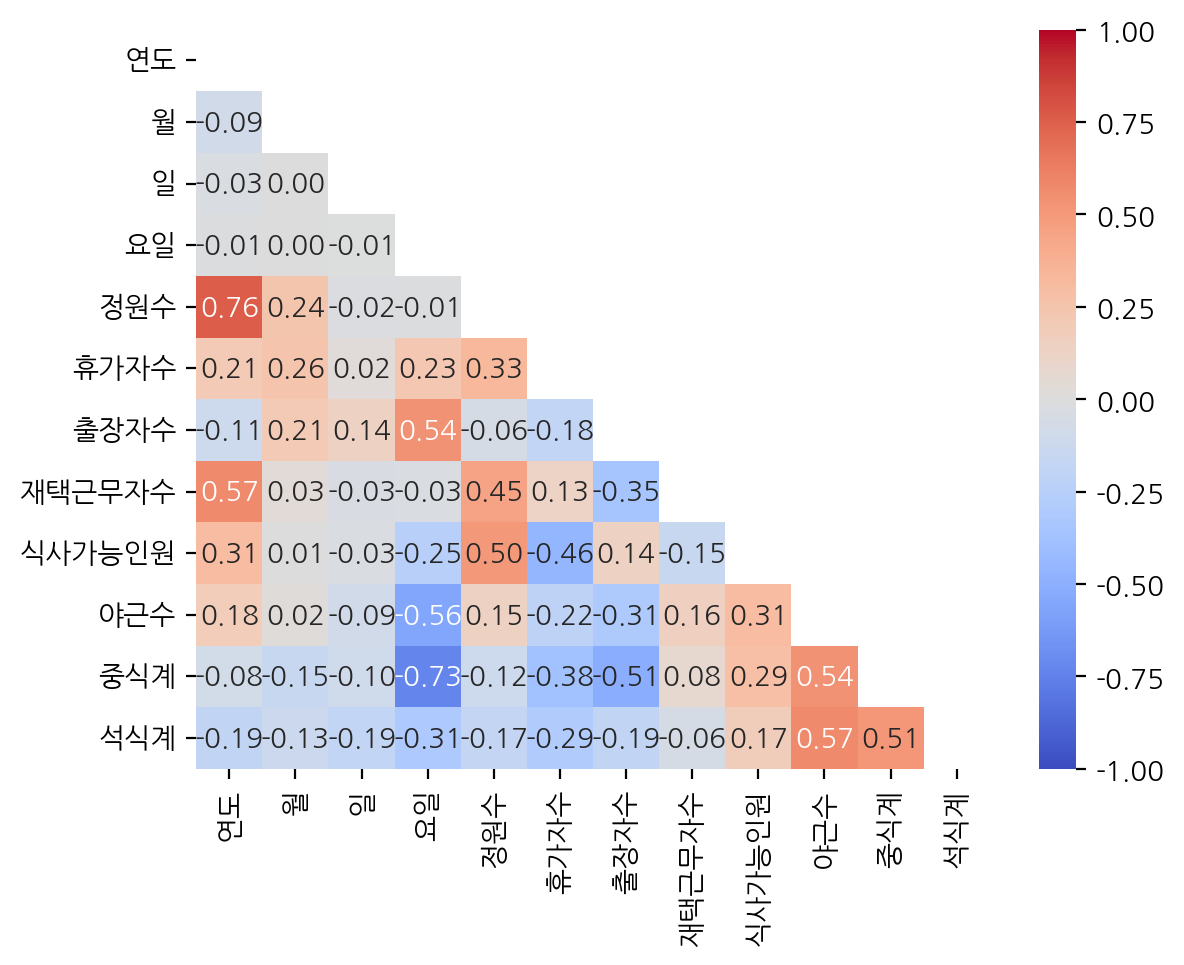

In [21]:
# 상관관계
cor = train.corr(numeric_only=True)
mask = np.triu(np.ones_like(cor))
sns.heatmap(data=cor, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f', mask=mask);

* 중식계와 석식계 모두 야근자수와 양의 상관 관계가 있다 => 아마도 바빠서 구내식당 이용하는 게 아닐까? => 야근자수 많은 달과 원인 파악하기
* 중식계는 요일과 음의 상관 관계다. => 금요일로 갈 수록 점심을 안 먹는다. => 왜 why?
* 식사가능인원과는 의외로 큰 상관관계가 없고,
* 본사출장자수가 중식계와 나름 음의 상관 관계가 있는 듯
* 추가적으로 연도, 월도 봐야겠다.

# EDA

## 연도별

In [22]:
train['연도'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

In [23]:
train_2016 = train.loc[train['연도']==2016].copy()
train_2017 = train.loc[train['연도']==2017].copy()
train_2018 = train.loc[train['연도']==2018].copy()
train_2019 = train.loc[train['연도']==2019].copy()
train_2020 = train.loc[train['연도']==2020].copy()
train_2021 = train.loc[train['연도']==2021].copy()

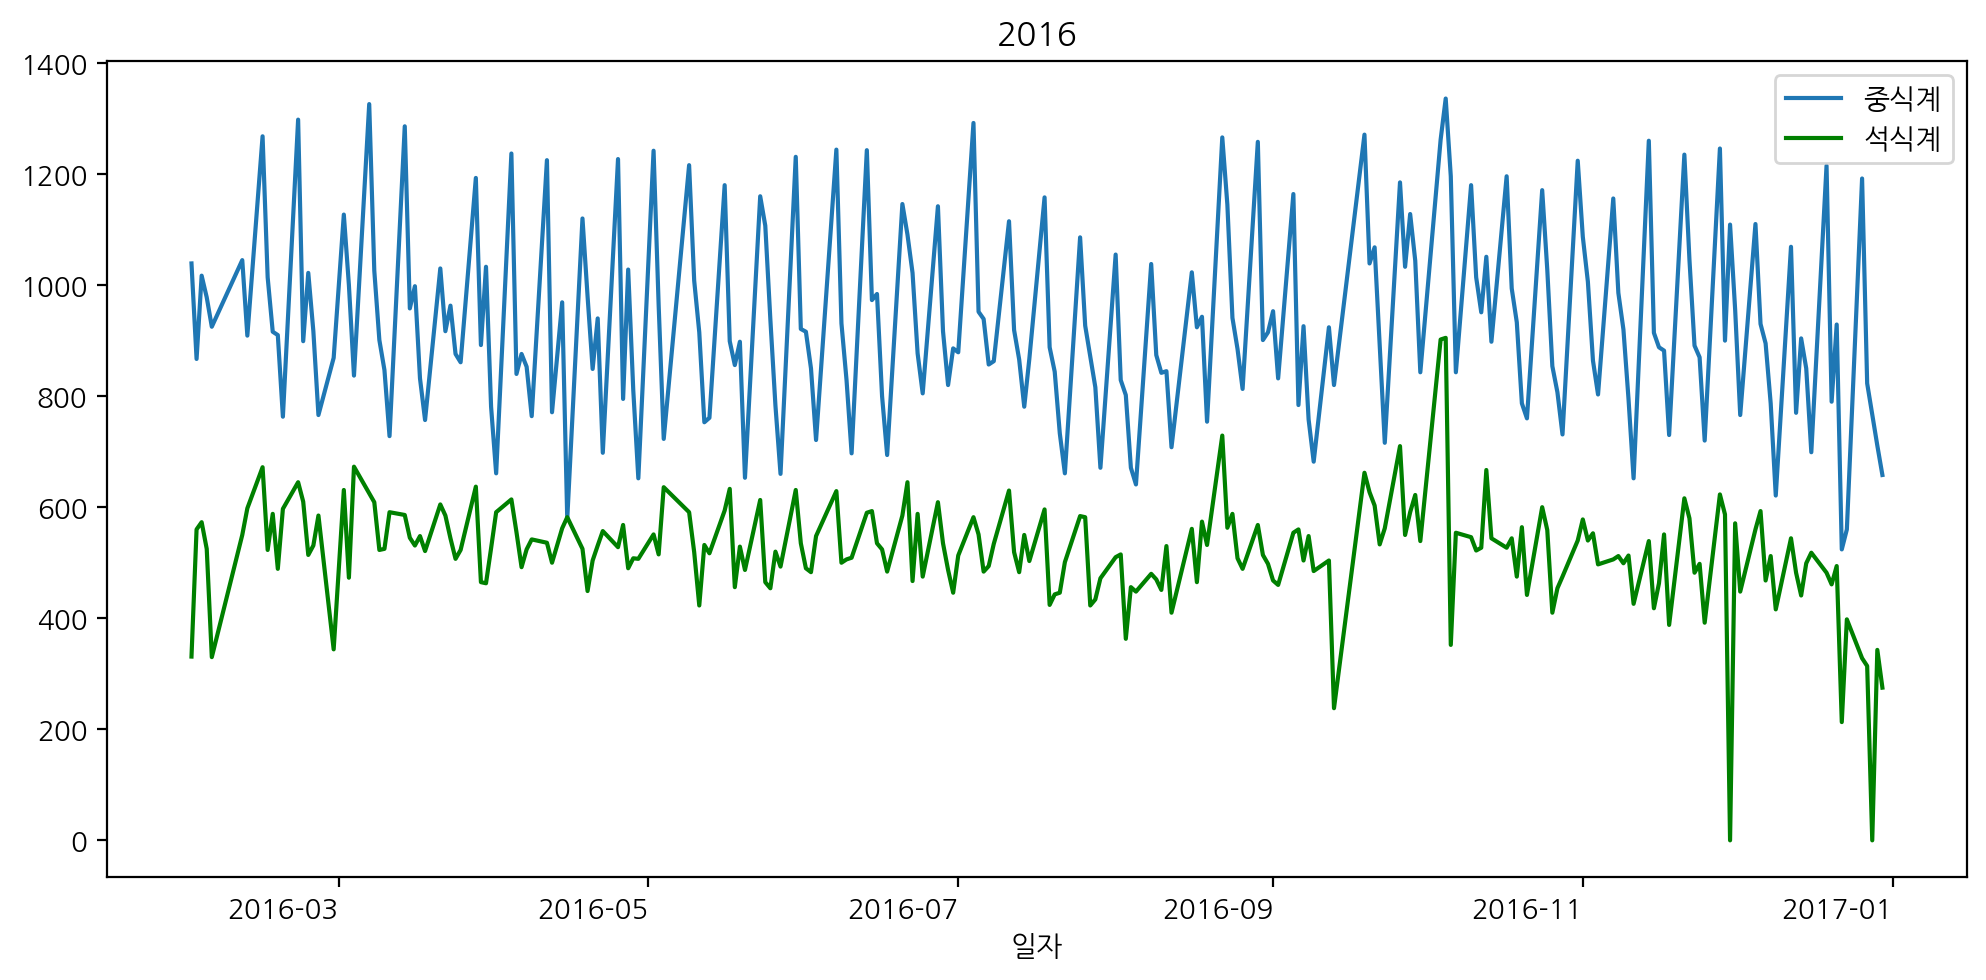

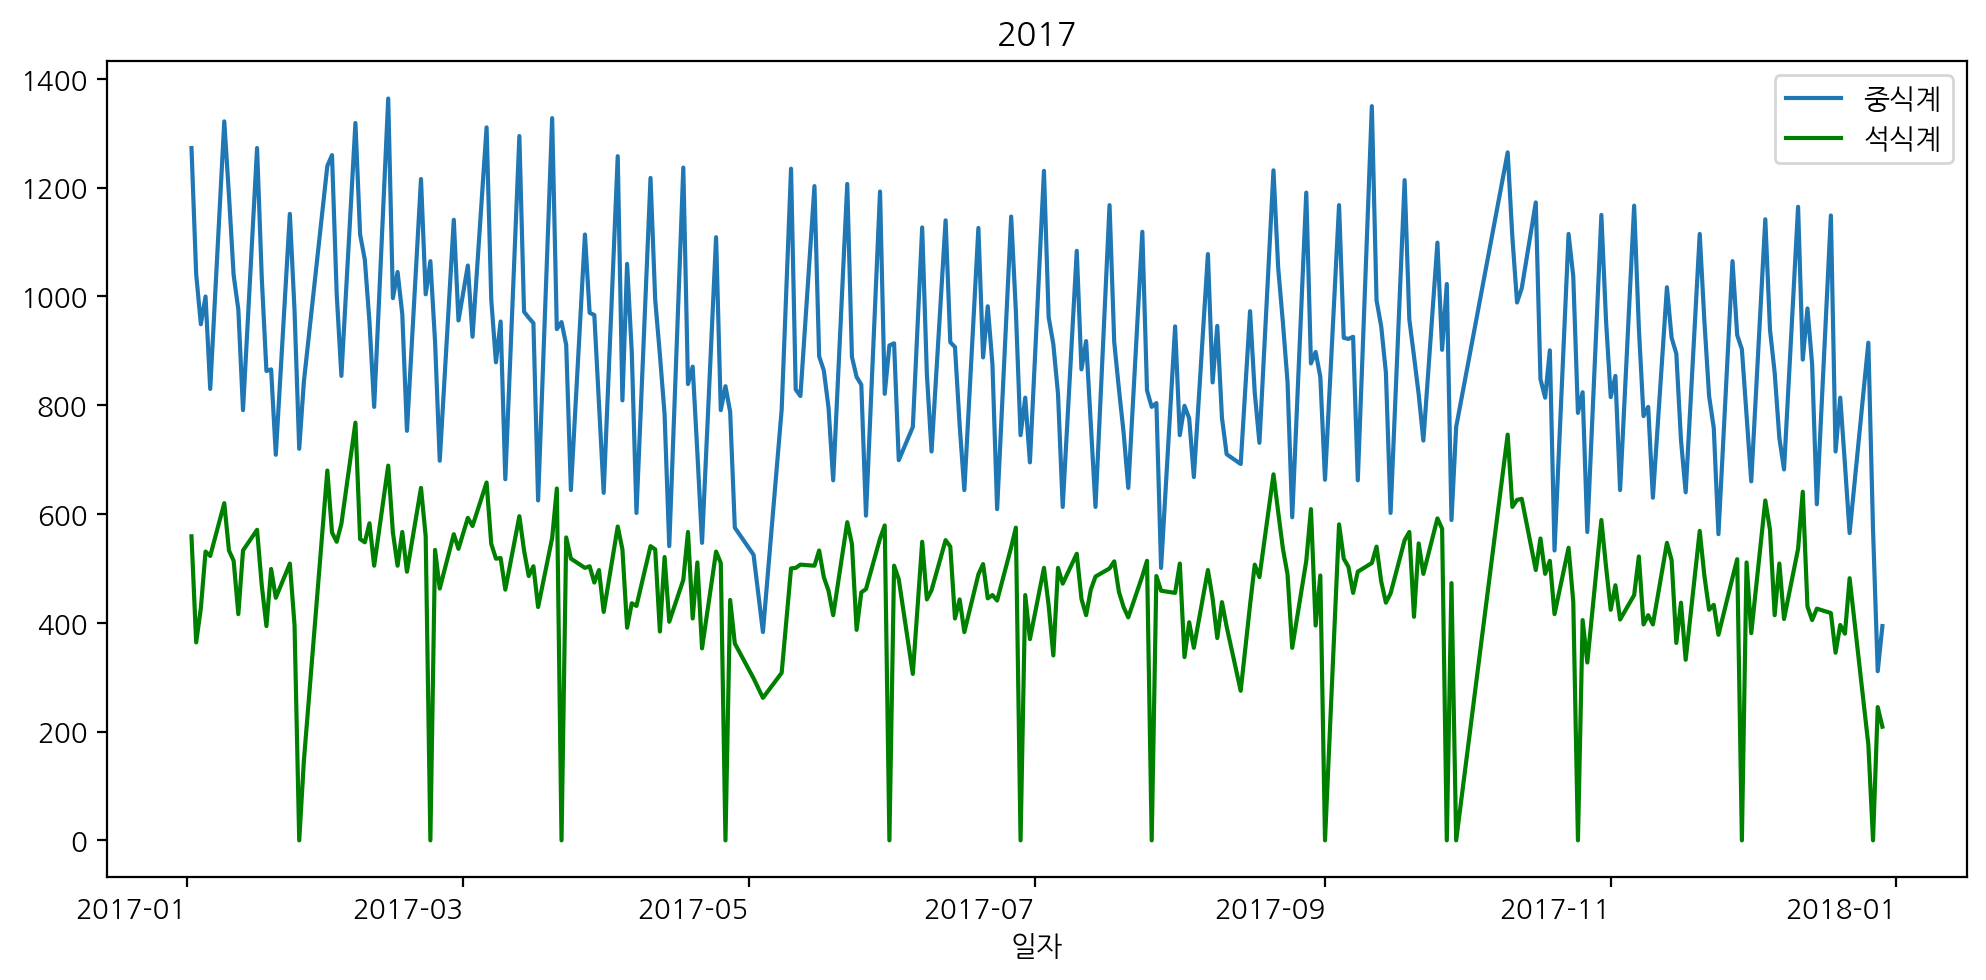

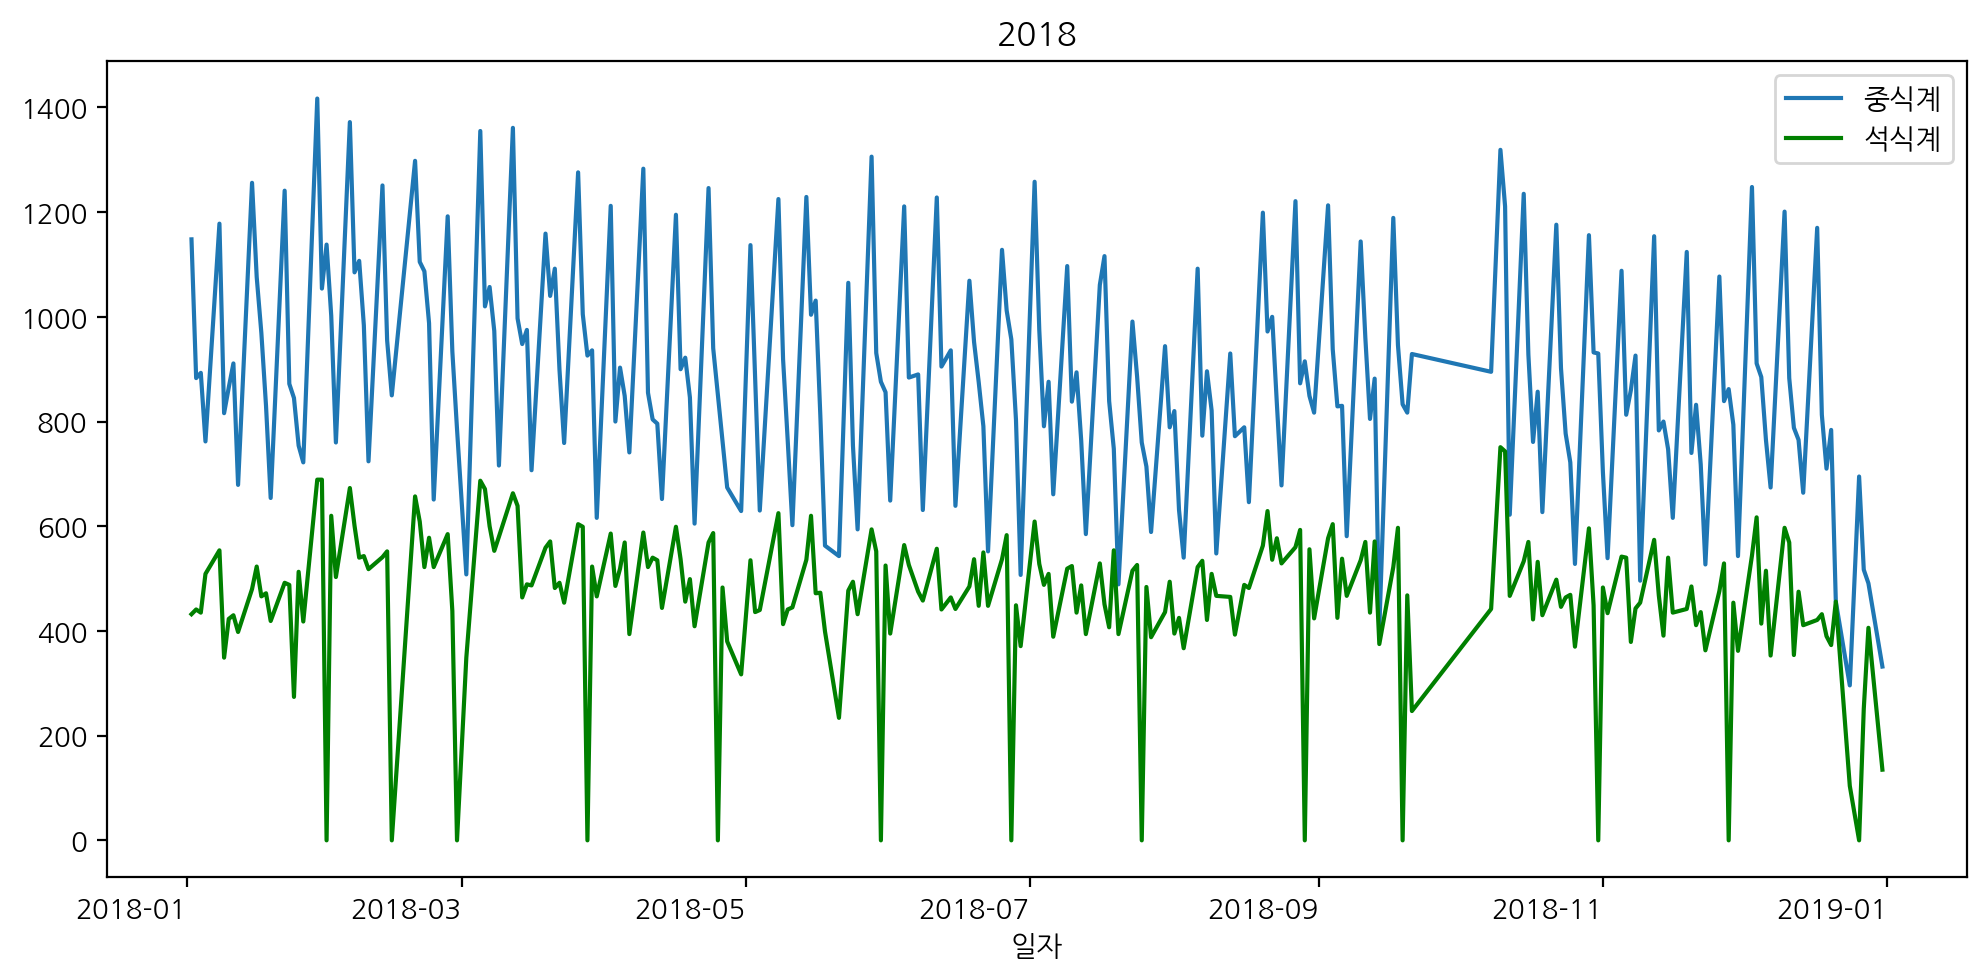

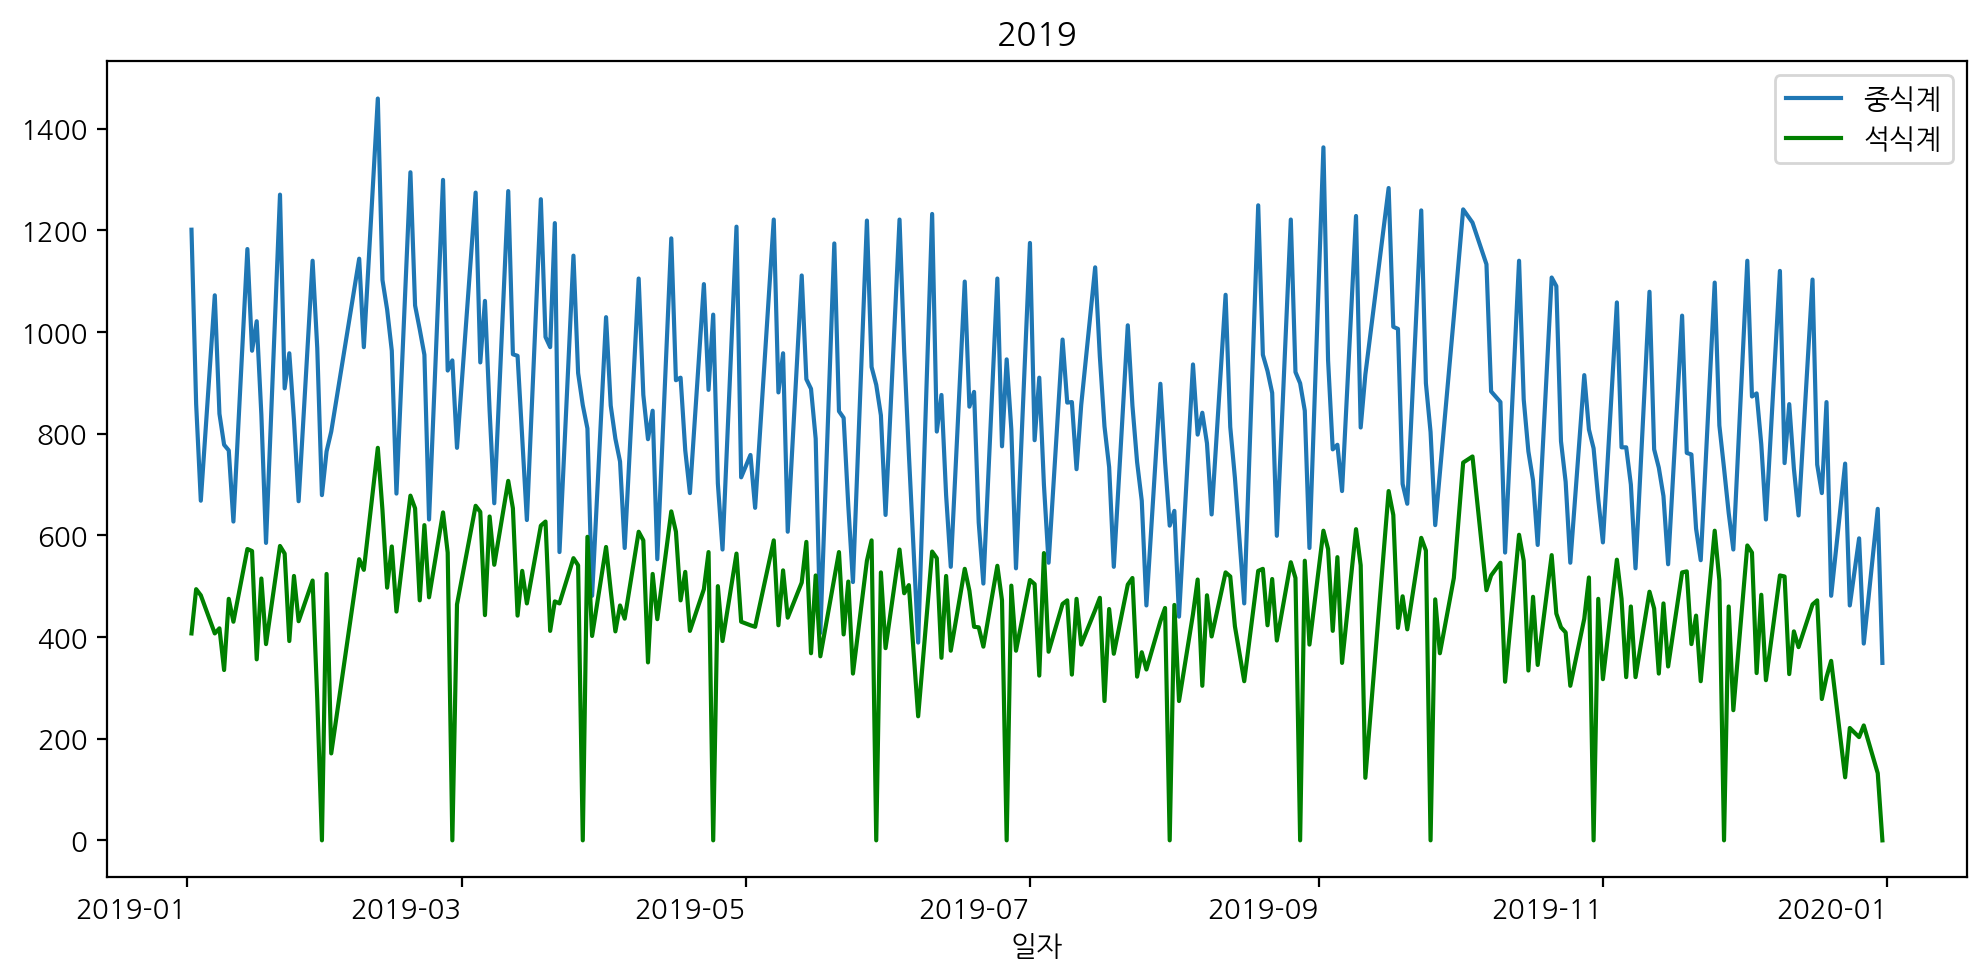

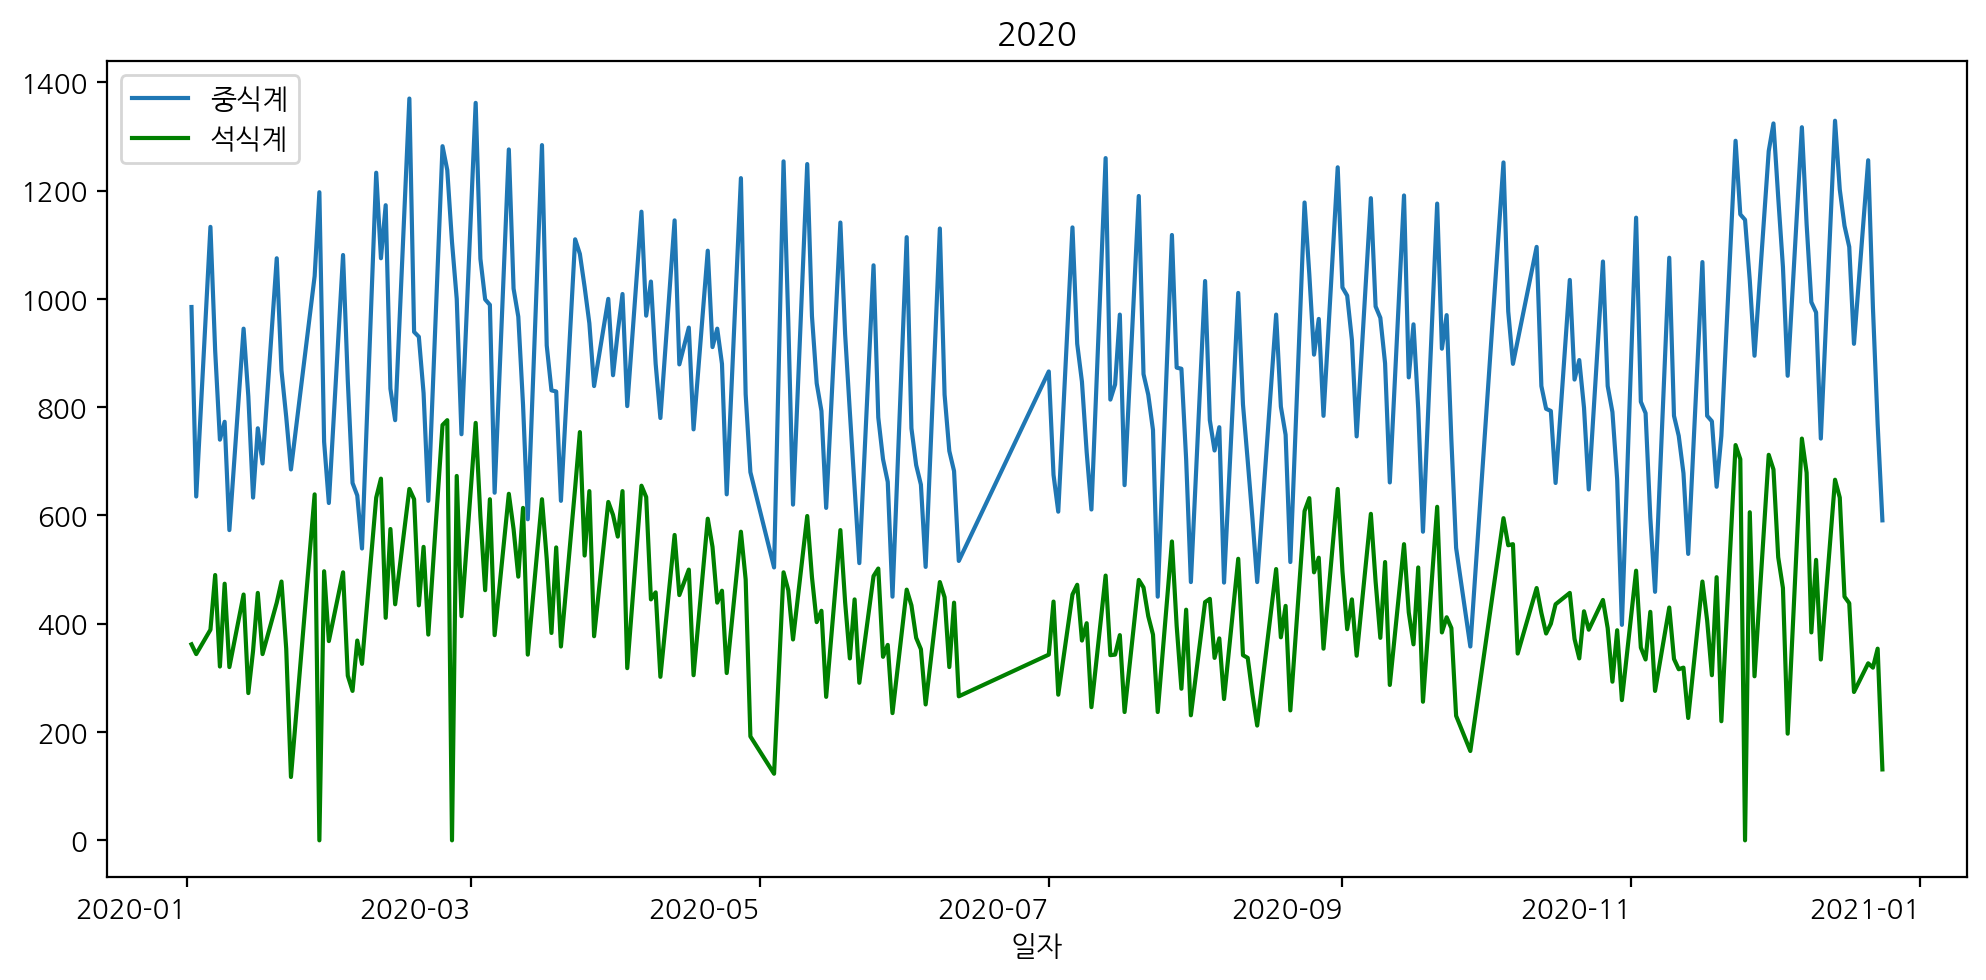

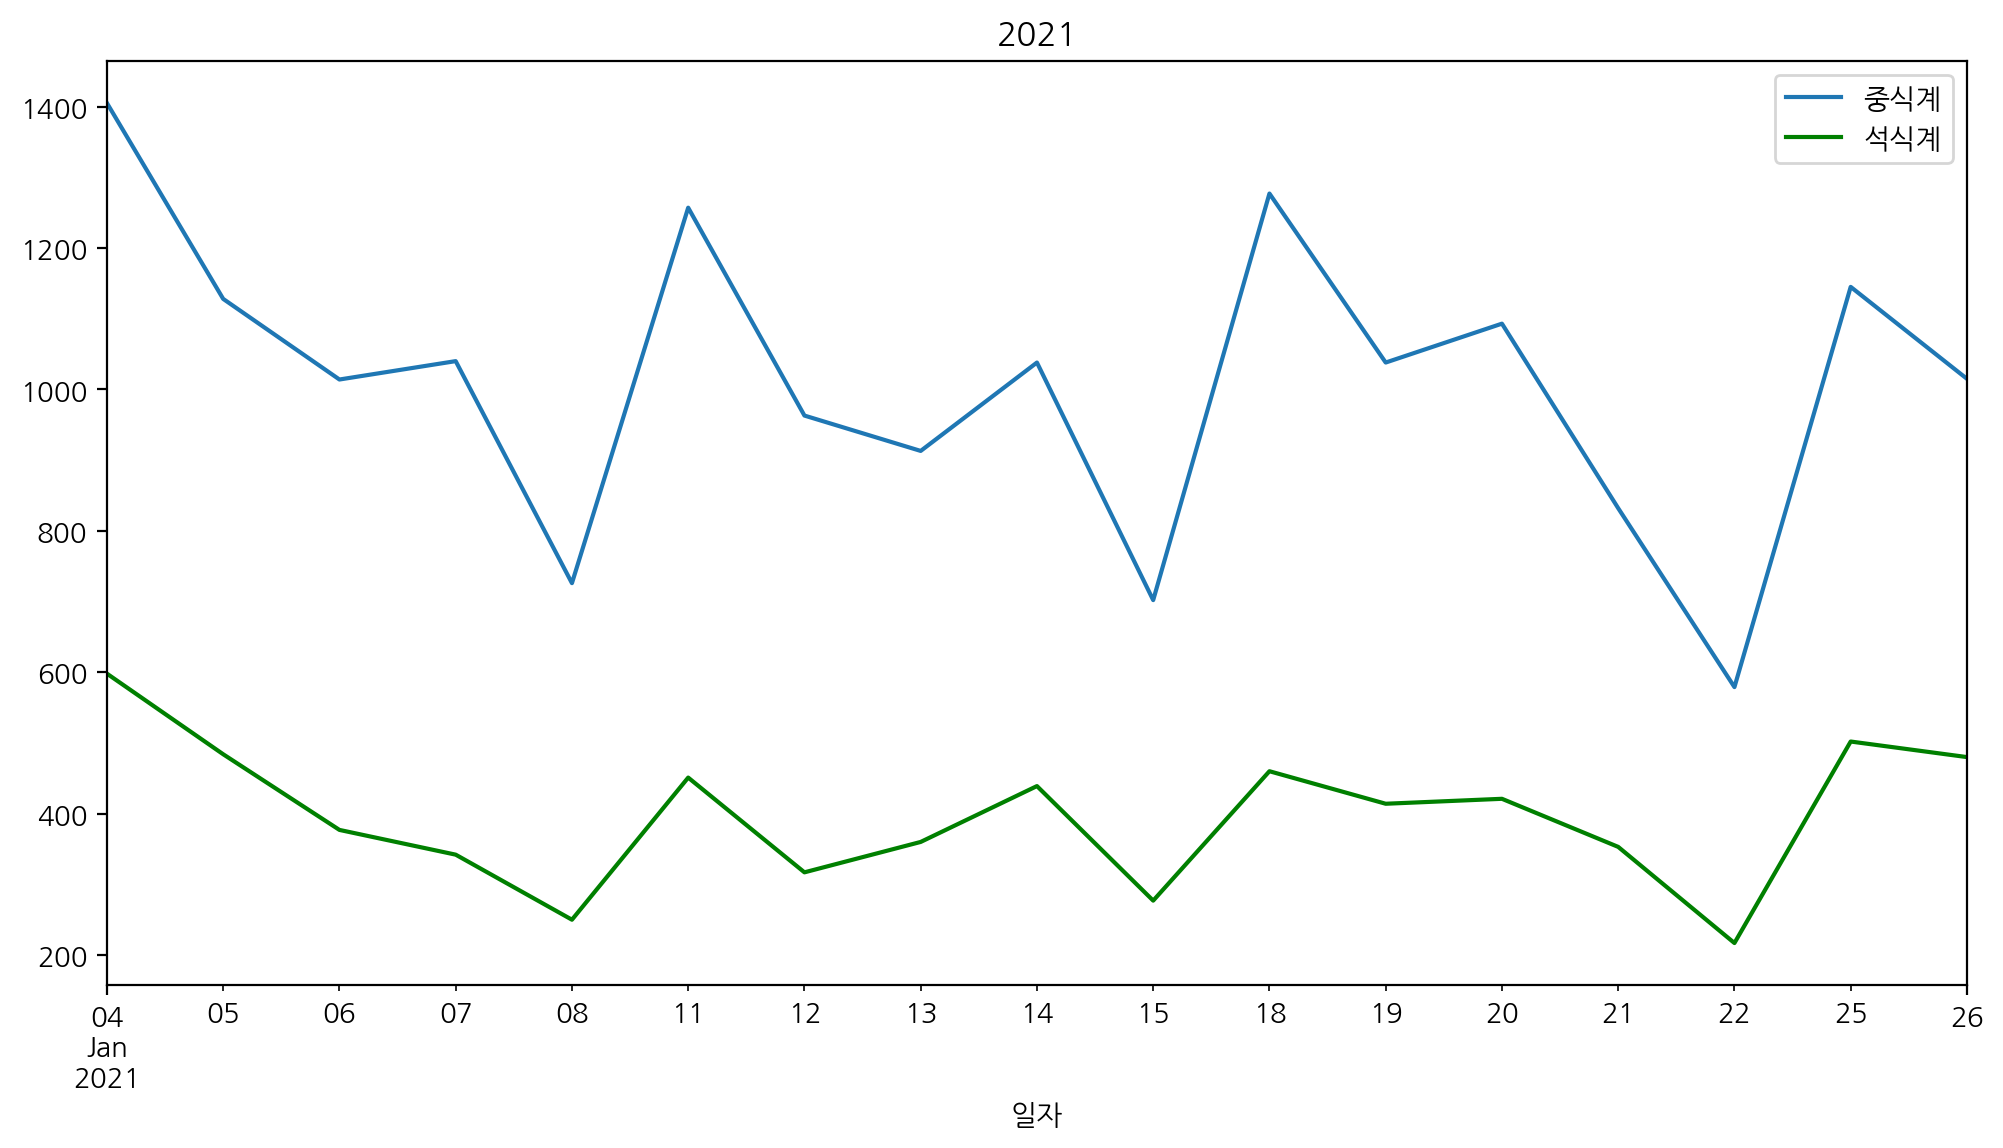

In [24]:
# 시각화
train_2016[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2016', color={'중식계':'tab:blue', '석식계':'g'});
train_2017[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2017', color={'중식계':'tab:blue', '석식계':'g'});
train_2018[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2018', color={'중식계':'tab:blue', '석식계':'g'});
train_2019[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2019', color={'중식계':'tab:blue', '석식계':'g'});
train_2020[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2020', color={'중식계':'tab:blue', '석식계':'g'});
train_2021[['일자', '중식계', '석식계']].set_index('일자').plot(rot=0, figsize=(12, 6), title='2021', color={'중식계':'tab:blue', '석식계':'g'});

* 매달 석식계가 0인 날이 있다.
* 매년 10월 석식계 확인해 보기, 2020년 6~7월 확인해 보기

In [25]:
# 석식계가 0인 날 확인
pd.concat([train_2017[train_2017['석식계']==0], train_2018[train_2018['석식계']==0], train_2019[train_2019['석식계']==0], train_2020[train_2020['석식계']==0], train_2021[train_2021['석식계']==0]], axis=0)

일자    연도   월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
244  2017-01-25  2017   1  25   3  2697  4.382027   203       0    2415    0   
262  2017-02-22  2017   2  22   3  2632  4.330733   252       0    2305    0   
281  2017-03-22  2017   3  22   3  2627  3.988984   235       0    2339    0   
306  2017-04-26  2017   4  26   3  2626  3.828641   304       0    2277    0   
327  2017-05-31  2017   5  31   3  2637  3.784190   265       0    2329    0   
346  2017-06-28  2017   6  28   3  2648  4.077537   259       0    2331    0   
366  2017-07-26  2017   7  26   3  2839  5.541264   246       0    2339    0   
392  2017-09-01  2017   9   1   5  2642  5.181784   303       0    2162   45   
410  2017-09-27  2017   9  27   3  2642  4.262680   265       0    2307    0   
412  2017-09-29  2017   9  29   5  2642  5.370638   248       0    2180   22   
424  2017-10-25  2017  10  25   3  2645  4.330733   289       0    2281    0   
449  2017-11-29  2017  11  29   3  2644  4.369448   261       0    2305    0   
468  2017-12-27  2017  12  27   3  2665  5.135798   255       0    2241    0   
492  2018-01-31  2018   1  31   3  2655  4.043051   223       0    2376    0   
502  2018-02-14  2018   2  14   3  2707  6.037871   159       0    2130    0   
510  2018-02-28  2018   2  28   3  2707  4.905275   278       0    2295    0   
529  2018-03-28  2018   3  28   3  2714  3.828641   252       0    2417    0   
549  2018-04-25  2018   4  25   3  2714  4.204693   285       0    2363    0   
571  2018-05-30  2018   5  30   3  2721  4.394449   281       0    2360    0   
589  2018-06-27  2018   6  27   3  2728  4.204693   277       0    2385    0   
609  2018-07-25  2018   7  25   3  2704  5.424950   256       0    2222    1   
633  2018-08-29  2018   8  29   3  2996  4.644391   258       0    2635    0   
648  2018-09-19  2018   9  19   3  2763  4.356709   288       0    2398    0   
667  2018-10-31  2018  10  31   3  2805  4.718499   306       0    2388    0   
687  2018-11-28  2018  11  28   3  2815  4.248495   298       0    2448    1   
706  2018-12-26  2018  12  26   3  2846  5.220356   241       0    2421    0   
730  2019-01-30  2019   1  30   3  2985  4.204693   226       0    2693    1   
747  2019-02-27  2019   2  27   3  2806  4.615121   274       0    2432    0   
766  2019-03-27  2019   3  27   3  2836  4.532599   259       0    2485    0   
786  2019-04-24  2019   4  24   3  2822  4.094345   273       0    2490    0   
809  2019-05-29  2019   5  29   3  2825  3.931826   237       0    2538    0   
828  2019-06-26  2019   6  26   3  2758  4.248495   282       0    2407    0   
853  2019-07-31  2019   7  31   3  2760  6.206576   231       0    2034    0   
872  2019-08-28  2019   8  28   3  3305  4.820282   274       0    2908    0   
890  2019-09-25  2019   9  25   3  3111  4.110874   285       0    2766    1   
912  2019-10-30  2019  10  30   3  3121  4.812184   294       0    2705    1   
932  2019-11-27  2019  11  27   3  3104  4.905275   288       0    2682    1   
955  2019-12-31  2019  12  31   2  3111  6.565265   149       0    2253   22   
973  2020-01-29  2020   1  29   3  2821  4.624973   214       0    2506    4   
993  2020-02-26  2020   2  26   3  2872  4.700480   190       0    2573    4   
1166 2020-11-25  2020  11  25   3  3021  5.332719   191     387    2237    3   

                                                   중식메뉴  \
244   카레덮밥 (쌀:국내산) 맑은국  유린기  개성감자만두  오이사과무침  포기김치 (김...   
262   나물비빔밥 (쌀:국내산) 유부장국  생선까스*탈탈소스  파스타샐러드  마늘쫑볶음  ...   
281   쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개  유린기  비엔나볶음  세발나물  깍두기 (...   
306   비빔밥 (쌀:국내산) 맑은국  오징어튀김  견과류조림  하와이안샐러드  깍두기 (김...   
327   열무보리비빔밥 (쌀:국내산) 가쯔오장국  탕수만두  콥샐러드  오이지무침  포기김치...   
346   콩나물밥 (쌀:국내산) 얼갈이된장국  삼치구이  잡채  아삭고추무침  깍두기 (김치...   
366   나물비빔밥  미소장국  파스타샐러드  소세지오븐구이  오렌지  포기김치 (김치:국내산)    
392   쌀밥/잡곡밥 (쌀:국내산) 시래기국  훈제오리구이  두부구이*양념장  쌈무/양파절임...   
410   쌀밥/잡곡밥 (쌀:국내산) 콩나물국  삼겹살구이  어묵볶음  상추파무침  포기김치 ...   
412   쌀밥/잡곡밥 (쌀:국내산) 미역국  쇠불고기/잡채  오징어숙회무침  미니케익/식혜 ...   
424

* 매달 마지막 주 수요일은 자기개발의 날로 석식을 운영하지 않는다.

In [26]:
# 9월 데이터 확인해 보기
train_2018[train_2018['월']==9]

일자    연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
636 2018-09-03  2018  9   3   1  2763  4.812184   233       0    2408  393   
637 2018-09-04  2018  9   4   2  2763  4.521789   262       0    2410  404   
638 2018-09-05  2018  9   5   3  2763  4.543295   269       0    2401    0   
639 2018-09-06  2018  9   6   4  2763  4.672829   283       0    2374  280   
640 2018-09-07  2018  9   7   5  2763  5.105945   303       0    2296   56   
641 2018-09-10  2018  9  10   1  2763  4.605170   243       0    2421  343   
642 2018-09-11  2018  9  11   2  2763  4.219508   272       0    2424  370   
643 2018-09-12  2018  9  12   3  2763  4.304065   300       0    2390    0   
644 2018-09-13  2018  9  13   4  2763  4.219508   306       0    2390  297   
645 2018-09-14  2018  9  14   5  2763  5.164786   313       0    2276  132   
646 2018-09-17  2018  9  17   1  2763  4.521789   252       0    2420  465   
647 2018-09-18  2018  9  18   2  2763  4.219508   289       0    2407  446   
648 2018-09-19  2018  9  19   3  2763  4.356709   288       0    2398    0   
649 2018-09-20  2018  9  20   4  2763  4.543295   277       0    2393  385   
650 2018-09-21  2018  9  21   5  2763  5.564520   241       0    2262   51   

                                                  중식메뉴  \
636  쌀밥/잡곡밥 (쌀:국내산) 콩나물국  버섯불고기  브로컬리오징어숙회  취나물  포기...   
637  쌀밥/잡곡밥 (쌀:국내산) 들깨시래기국  동파삼겹수육  녹두전  야채스틱*쌈장  배...   
638  김치제육덮밥 (쌀:국내산) 맑은국  샐러드파스타  오징어튀김  무생채  열무김치 (...   
639  쌀밥/잡곡밥 (쌀:국내산) 꽃게탕  간장찜닭  연두부*양념장  마늘쫑무침  포기김치...   
640  쌀밥/잡곡밥 (쌀:국내산) 미역국  매운주꾸미볶음  새송이버섯전  건파래무침  포기...   
641  쌀밥/잡곡밥 (쌀:국내산) 연두부국  돈육고추장불고기  감자채볶음  양배추쌈  포기...   
642  쌀밥/잡곡밥 (쌀:국내산) 쇠고기미역국  닭매운찜  두부스테이크  흑임자연근샐러드 ...   
643  소불고기덮밥 (쌀:국내산) 가쯔오장국  오징어튀김  구운채소 *발사믹소스 오복지무침...   
644  쌀밥/잡곡밥 (쌀:국내산) 시래기국  등갈비김치찜  부추전  콩나물무침  포기김치 ...   
645  쌀밥/잡곡밥 (쌀:국내산) 고추장찌개  언양식불고기  계란말이  상추파무침  포기김...   
646  쌀밥/잡곡밥 (쌀:국내산) 어묵국  돈육굴소스볶음  골뱅이무침*소면  무생채  포기...   
647  쌀밥/잡곡밥 (쌀:국내산) 닭개장  류산슬  김치전  아삭고추무침  포기김치 (김치...   
648  카레덮밥 (쌀:국내산) 유부장국  감자프리타타  메밀전병만두  쨔샤이무침/과일  포...   
649  쌀밥/잡곡밥 (쌀:국내산) 꽃게탕  소고기장조림  명태조림  파래김*양념장  포기김...   
650  쌀밥/잡곡밥 (쌀:국내산) 아욱된장국  돼지갈비찜/잡채  쭈꾸미숙회무침  송편/식혜...   

                                                  석식메뉴   중식계  석식계  
636  쌀밥/잡곡밥 (쌀:국내산) 돈육김치찌개  유산슬  계란찜  땅콩조림  알타리김치 (...  1213  577  
637  닭갈비볶음밥 (쌀:국내산) 가쯔오장국  크림카레우동  왕만두  양배추샐러드/무피클 ...   938  604  
638  쌀밥/잡곡밥 (쌀:국내산) 육개장  고등어구이  훈제오리냉채  우엉곤약조림  포기김...   829  425  
639  꼬마김밥*겨자장 (쌀:국내산) 잔치국수  돈육강정  키위드레싱샐러드  요플레  포기...   830  538  
640  쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개  생선까스*칠리소스  두부양념조림  청포묵무침...   581  467  
641  쌀밥/잡곡밥 (쌀:국내산) 청국장찌개  가자미튀김  돈육잡채  양념깻잎지  포기김치...  1144  535  
642  김밥 (쌀:국내산) 김치말이국수  떡볶이  찐옥수수  꼬들단무지/음료  포기김치 (...   960  570  
643  쌀밥/잡곡밥 (쌀:국내산) 매운쇠고기국  유린기  어묵무침  참나물생채  포기김치 ...   805  435  
644  쌀밥/잡곡밥 (쌀:국내산) 크림스프  수제돈까스*칠리소스  푸실리샐러드  오이미역무...   882  571  
645  쌀밥/잡곡밥 (쌀:국내산) 도토리묵냉국  해물누룽지탕  동그랑땡전  도라지무침  포...   405  375  
646  쌀밥/잡곡밥 (쌀:국내산) 들깨버섯국  오징어볶음  단호박계란찜  셀프무쌈말이  포...  1189  522  
647  유부초밥 (쌀:국내산) 우동  순대야채볶음  참치샐러드  음료  포기김치 (김치:국...   946  597  
648                                                      833    0  
649  김치볶음밥/계란 (쌀:국내산) 유부주머니국  해물까스*탈탈소스  단호박범벅  수제피...   817  468  
650  쌀밥/잡곡밥 (쌀:국내산) 시금치된장국  미니채소떡갈비  흑임자곤약샐러드  얼갈이생...   929  247

* 일주일 정도씩 비는 구나?

In [27]:
# 10월 데이터 확인해 보기
train_2018[train_2018['월']==10]

일자    연도   월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원   야근수  \
651 2018-10-08  2018  10   8   1  2805  6.052089   233       0    2148   216   
652 2018-10-10  2018  10  10   3  2805  4.394449   232       0    2493  1044   
653 2018-10-11  2018  10  11   4  2805  4.219508   240       0    2498   430   
654 2018-10-12  2018  10  12   5  2805  5.262690   288       0    2325    28   
655 2018-10-15  2018  10  15   1  2805  4.624973   243       0    2461   268   
656 2018-10-16  2018  10  16   2  2805  4.158883   273       0    2469   315   
657 2018-10-17  2018  10  17   3  2805  4.234107   294       0    2443     0   
658 2018-10-18  2018  10  18   4  2805  4.317488   299       0    2432   175   
659 2018-10-19  2018  10  19   5  2805  5.337538   303       0    2295    40   
660 2018-10-22  2018  10  22   1  2805  4.955827   236       0    2428   290   
661 2018-10-23  2018  10  23   2  2805  4.304065   277       0    2455   243   
662 2018-10-24  2018  10  24   3  2805  4.418841   299       0    2424     1   
663 2018-10-25  2018  10  25   4  2805  4.709530   315       0    2380   158   
664 2018-10-26  2018  10  26   5  2805  5.575949   308       0    2234    25   
665 2018-10-29  2018  10  29   1  2805  5.049856   250       0    2400   316   
666 2018-10-30  2018  10  30   2  2805  4.499810   300       0    2416   206   
667 2018-10-31  2018  10  31   3  2805  4.718499   306       0    2388     0   

                                                  중식메뉴  \
651  쌀밥/잡곡밥 (쌀:국내산) 어묵탕  돈육고추장불고기  감자채볶음  모듬쌈  포기김치...   
652  곤드레밥*강된장 (쌀:국내산) 맑은국  돈육강정  사과고구마그라탱  오이초무침  포...   
653  쌀밥/잡곡밥 (쌀:국내산) 들깨버섯국  오징어볶음  단호박계란찜  청경채사과무침  ...   
654  쌀밥/잡곡밥 (쌀:국내산) 설렁탕  김치전  오징어젓무침  야채스틱/과일  석박지 ...   
655  쌀밥/잡곡밥 (쌀:국내산) 열무된장국  버섯불고기  맛살겨자채  깻잎지  포기김치 ...   
656  쌀밥/잡곡밥 (쌀:국내산) 매운소고기무국  조기구이  우엉잡채  참나물생채  포기김...   
657  콩나물밥 (쌀:국내산) 유부장국  생선가스*칠리소스  가래떡구이*조청  땅콩조림  ...   
658  쌀밥/잡곡밥 (쌀:국내산) 감자국  김치제육볶음  해물파전  브로컬리들깨찜  열무김...   
659  쌀밥/잡곡밥 (쌀:국내산) 오징어국  닭갈비  연두부*양념장  호박나물  포기김치 ...   
660  쌀밥/잡곡밥 (쌀:국내산) 고추장찌개  돈육간장불고기  야채계란찜  오이무침  포기...   
661  쌀밥/잡곡밥 (쌀:국내산) 콩비지찌개  닭볶음탕  메밀전병만두  파래김*양념장  포...   
662  쌀밥/잡곡밥 (쌀:국내산) 콩나물국  등갈비김치찜  어묵볶음  톳두부무침  깍두기 ...   
663  쌀밥/잡곡밥 (쌀:국내산) 얼갈이국  쇠고기낙지볶음  시금치프리타타  방풍나물  포...   
664  쌀밥/잡곡밥 (쌀:국내산) 근대국  오징어볶음  두부새싹구이  시금치나물  배추겉절...   
665  쌀밥/잡곡밥 (쌀:국내산) 황태국  소불고기  홍어채무침  콩나물무침  포기김치 (...   
666  쌀밥/잡곡밥 (쌀:국내산) 어묵국  동파삼겹수육  실곤약야채무침  쫑상추무침  배추...   
667  쌀밥/잡곡밥 (쌀:국내산) 콩나물국  수제돈가스  닭살겨자채  반달호박나물  포기김...   

                                                  석식메뉴   중식계  석식계  
651  쌀밥/잡곡밥 (쌀:국내산) 참치김치찌개  안동찜닭  고추잡채*꽃빵  가지무침  알타...   895  442  
652  쌀밥/잡곡밥 (쌀:국내산) 쇠고기샤브국  가자미양념찜  꽃맛살볶음  비트무생채  포...  1319  751  
653    김치주먹밥 (쌀:국내산) 우동  타코야끼  콥샐러드  귤  열무김치 (김치:국내산)   1211  743  
654  쌀밥/잡곡밥 (쌀:국내산) 호박젓국찌개  장어강정  실곤약흑임자무침  부추생채  포...   622  467  
655  쌀밥/잡곡밥 (쌀:국내산) 동태찌개  쇠고기장조림  계란말이  미역줄기볶음  포기김...  1235  533  
656  해물굴소스볶음밥 (쌀:국내산) 가쯔오장국  닭오븐구이  딸기드레싱샐러드  음료  포...   928  570  
657  쌀밥/잡곡밥 (쌀:국내산) 차돌박이된장찌개  꽁치구이  미트볼조림  청경채무침  포...   761  422  
658  유부초밥 (쌀:국내산) 짬뽕  탕수육  생과일플레인샐러드  단무지  포기김치 (김치...   857  532  
659  쌀밥/잡곡밥 (쌀:국내산) 닭곰탕  류산슬  비엔나감자구이  아삭고추무침  포기김치...   627  430  
660  쌀밥/잡곡밥 (쌀:국내산) 옹심이만두국  코다리조림  꽃맛살볶음  양배추쌈*쌈장  ...  1176  498  
661  볶음밥*짜장소스 (쌀:국내산) 맑은국  탕수어  감자범벅  수제피클/과일  포기김치...   902  446  
662  쌀밥/잡곡밥 (쌀:국내산) 대구찌개  언양식불고기  멸치아몬드볶음  셀프무쌈말이  ...   777  464  
663  야채주먹밥 (쌀:국내산) 김치우동  깐풍기  멕시칸샐러드  꼬들단무지/요플레  포기...   722  469  
664  쌀밥/잡곡밥 (쌀:국내산) 육개장  가자미카레튀김  메추리알조림  치커리무침  포기...   528  370  
665  쌀밥/잡곡밥 (쌀:국내산) 해물된장찌개  짬뽕불고기  도토리묵무침  취나물  포기김...  1156  596  
666  쌀밥/잡곡밥 (쌀:국내산) 부대찌개  갈치구이  버섯잡채  오이맛살초무침  깍두기 ...   932  449  
667                                     자기계발의날           930    0

* 9말 10초 2주가 빈다
* 그래프가 저렇게 바뀌는 구간이 휴가기간일 듯

In [28]:
# 2020년 6월 보기
train_2020[train_2020['월']==6]

일자    연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
1057 2020-06-01  2020  6   1   1  2956  4.700480   185     215    2447  612   
1058 2020-06-02  2020  6   2   2  2956  4.174387   231     213    2448  605   
1059 2020-06-03  2020  6   3   3  2956  4.158883   251     191    2451    0   
1060 2020-06-04  2020  6   4   4  2956  4.276666   284     208    2393  403   
1061 2020-06-05  2020  6   5   5  2956  5.455321   291     176    2256    0   
1062 2020-06-08  2020  6   8   1  2956  4.804021   236     201    2398  566   
1063 2020-06-09  2020  6   9   2  2956  4.234107   253     177    2458  519   
1064 2020-06-10  2020  6  10   3  2956  4.330733   248     201    2432    4   
1065 2020-06-11  2020  6  11   4  2956  4.418841   280     172    2422  399   
1066 2020-06-12  2020  6  12   5  2956  5.323010   303     175    2274    2   

                                                   중식메뉴  \
1057  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 소고기미역국  닭갈비  콩나물잡채  셀프무쌈말...   
1058  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 된장찌개  돈육고추장볶음  사각어묵무침  모듬...   
1059  열무보리비빔밥/강된장 (쌀:국내산) 가쯔오장국  깐풍육 (돈육:국내산) 시저샐러드 ...   
1060  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 육개장  소고기장조림  녹두전  비름나물  포...   
1061  베이컨김치볶음밥 (쌀:국내산) 냉모밀국수  해물부추전  야채고로케  수박  깍두기 ...   
1062  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 대구탕  오삼불고기 (돈육:국내산) 해물동그랑...   
1063  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 시금치된장국  닭볶음탕 (닭:국내산) 두부구이...   
1064  나물비빔밥 (쌀:국내산) 오이사과냉국  치킨핑거 (닭:국내산) 맛살떡샐러드  깻잎순...   
1065  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라...   
1066  돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나...   

                                                   석식메뉴   중식계  석식계  
1057  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 청국장찌개  소고기불고기  실곤약야채무침  감...  1114  463  
1058  유부초밥 (쌀:국내산) 새우튀김우동  과일샐러드  찐옥수수  단무지  포기김치 (배...   761  434  
1059  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 닭곰탕  류산슬  비엔나감자구이  미역초무침 ...   693  374  
1060  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 감자국  미트볼조림  브로컬리오징어숙회  부추...   657  353  
1061  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 오징어국  매운닭찜  도토리묵야채무침  멸치볶...   505  251  
1062  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 김치두부국  갈치튀김  햄계란말이  청경채생채...  1130  477  
1063  삼겹살마늘볶음밥 (쌀,현미,흑미:국내산) 콩나물국  미니돈까스  양상추메추리알샐러드...   823  449  
1064  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 근대국  돈육간장볶음 (돈육:국내산) 동태포전...   719  320  
1065  야채볶음밥 (쌀:국내산) 초계국수 (닭:국내산) 코코넛새우튀김  옥수수콘치즈  음료...   682  439  
1066  쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 부대찌개 (양지:호주산) 떡갈비조림  쫄면무침...   516  266

* 날짜가 많이 없군?

In [29]:
train_2020[train_2020['월']==7]

일자    연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
1067 2020-07-01  2020  7   1   3  2997  4.276666   252     153    2521    9   
1068 2020-07-02  2020  7   2   4  2997  4.418841   268     152    2495  446   
1069 2020-07-03  2020  7   3   5  2997  5.568345   288     157    2291    1   
1070 2020-07-06  2020  7   6   1  2997  4.844187   220     172    2479  626   
1071 2020-07-07  2020  7   7   2  2997  4.356709   242     152    2526  575   
1072 2020-07-08  2020  7   8   3  2997  4.356709   251     158    2511    7   
1073 2020-07-09  2020  7   9   4  2997  4.605170   290     159    2449  449   
1074 2020-07-10  2020  7  10   5  2997  5.455321   290     135    2339    0   
1075 2020-07-13  2020  7  13   1  2997  4.779123   225     148    2506  632   
1076 2020-07-14  2020  7  14   2  2997  4.394449   224     143    2550  561   
1077 2020-07-15  2020  7  15   3  2997  4.394449   248     183    2486    4   
1078 2020-07-16  2020  7  16   4  2997  4.634729   274     166    2455  411   
1079 2020-07-17  2020  7  17   5  2997  5.521461   291     148    2309    2   
1080 2020-07-20  2020  7  20   1  2997  5.062595   220     140    2480  518   
1081 2020-07-21  2020  7  21   2  2997  4.934474   222     129    2508  519   
1082 2020-07-22  2020  7  22   3  2997  5.111988   250     149    2433    9   
1083 2020-07-23  2020  7  23   4  2997  5.056246   274     134    2433  377   
1084 2020-07-24  2020  7  24   5  2997  5.843544   281     115    2257    0   
1085 2020-07-27  2020  7  27   1  2997  5.605802   182     120    2424  728   
1086 2020-07-28  2020  7  28   2  2997  5.533389   213     150    2382  565   
1087 2020-07-29  2020  7  29   3  2997  5.549076   233     150    2358   11   
1088 2020-07-30  2020  7  30   4  2997  5.849325   242     130    2279  395   
1089 2020-07-31  2020  7  31   5  2997  6.208590   261     125    2115    0   

                                                   중식메뉴  \
1067  쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...   
1068  쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈    
1069     카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트    
1070  쌀밥/잡곡밥 매운소고기무국 춘천닭갈비 옥수수계란찜 감자채파프리카볶음 포기김치 양상추...   
1071  쌀밥/잡곡밥 물만두국 오리불고기 콩나물맛살냉채 양배추숙쌈&쌈장 포기김치 그린샐러드*...   
1072  쌀밥/잡곡밥 한방설렁탕 오징어초무침 채소스틱&쌈장 통들깨부추무침 석박지 매실음료/콩자반    
1073  쌀밥/잡곡밥 시금치된장국 닭볶음탕 건새우호박채전 도라지오이초무침 포기김치 시저샐러드...   
1074  쌀밥/잡곡밥 맑은콩나물국 돈육고추장볶음 쌈채소&쌈장 무채와사비무침/콩자반 포기김치 ...   
1075  마파두부덮밥 미역미소시루 레몬유린기 만두찜*간장 숙주미나리무침 포기김치 양상추샐러드...   
1076  쌀밥/잡곡밥 건새우무채국 쭈꾸미삼겹고추장볶음 두부커틀렛*칠리 쫑상추무침 포기김치 비...   
1077  비빔밥*약고추장 콩가루배춧국 열기어구이 도토리묵*양념간장 무말랭이무침 포기김치 치커...   
1078   쌀밥/잡곡밥 장각삼계탕 해물잡채 가지찜 아삭고추쌈장무침 배추겉절이 양상추샐러드*망고D    
1079  쌀밥/잡곡밥 김치우동 수제돈가스*소스 호박새우젓볶음 깍둑오이초무침 석박지 양배추샐러...   
1080  쌀밥/흑미밥/찰현미밥 호박맑은국 돈육김치볶음 두부맛전 모둠채소무침 포기김치 양상추샐...   
1081  쌀밥/치자밥/찰현미밥 닭개장 양장피 꽃맛살샐러드 브로콜리숙회*초장 포기김치 그린샐러...   
1082  쌀밥/흑미밥/찰현미밥 아욱국 오리불고기 고등어카레구이 매운콩나물무침 오이소배기 로스...   
1083  쌀밥/병아리콩밥/찰현미밥 소고기미역국 깻잎통닭*치킨소스 김치전 치킨무/콘슬로우 포기...   
1084  쌀밥/흑미밥/찰현미밥 해물수제비국 만가닥버섯불고기 실곤약냉채 열무나물 포기김치 양배...   
1085  쌀밥/흑미밥/찰현미밥 황태미역국 안동찜닭 토마토스크램블 얼갈이나물 포기김치 양상추샐...   
1086  쌀밥/기장밥/찰현미밥 호박된장찌개 목살스테이크 가자미엿장구이 꽈리고추감자조림 포기김...   
1087  쌀밥/흑미밥/찰현미밥 우거지국 삼겹살수육 모둠쌈*쌈장 풋고추/마늘*새우젓 부추무침/...   
1088  낙지비빔밥*계란후라이 팽이장국 후라이드*강정소스 미나리초무침 브로콜리깨소스무침 포기...   
1089  쌀밥/흑미밥/찰현미밥 짜글이돼지찌개 새우까스*소스 어묵고추장떡 마늘종숙회 포기김치 ...   

                                                   석식메뉴   중식계  석식계  
1067               쌀밥/잡곡밥 돈육김치찌개 깐풍기 고갈비구이 가지된장무침 포기김치    866  343  
1068              김밥 미니우동 구슬떡볶이 김말이,고추튀김 다시마채무초무침 포기김치    675  441  
1069       쌀밥/잡곡밥 김치어묵국 케이준샐러드 섭산적표고굴소스볶음 매운콩나물무침 포기김치    607  269  
1070           쌀밥/잡곡밥 스팸김치찌개 동태포전 새송이버섯장조림 열무된장나물 포기김치   1132  454  
1071             오므라이스 유부장국 깐쇼새우 꽃맛살샐러드 채소피클*할라피뇨 포기김치    917  472  
1072           쌀밥/잡곡밥 대구지리 바베큐함박찹스테이크 건파래볶음 치커리무침 포기김치    847  369  
1073            후리가케덮밥 잔치국수 채소튀김*장 쇠고기우엉볶음 양념고추지무침 깍두기    717  401  
1074               쌀밥/잡곡밥 된장찌개 아귀콩나물찜 부들어묵볶음 노각무침 포기김치    611  246  
1075            쌀밥/잡곡밥 뼈감자탕 쌈추전*간장 오징어땅콩조림 부추생채무침 포기김치   1260  489  
1076     

* 그냥 금요일마다 뚝뚝 떨어지는군?

## 월별

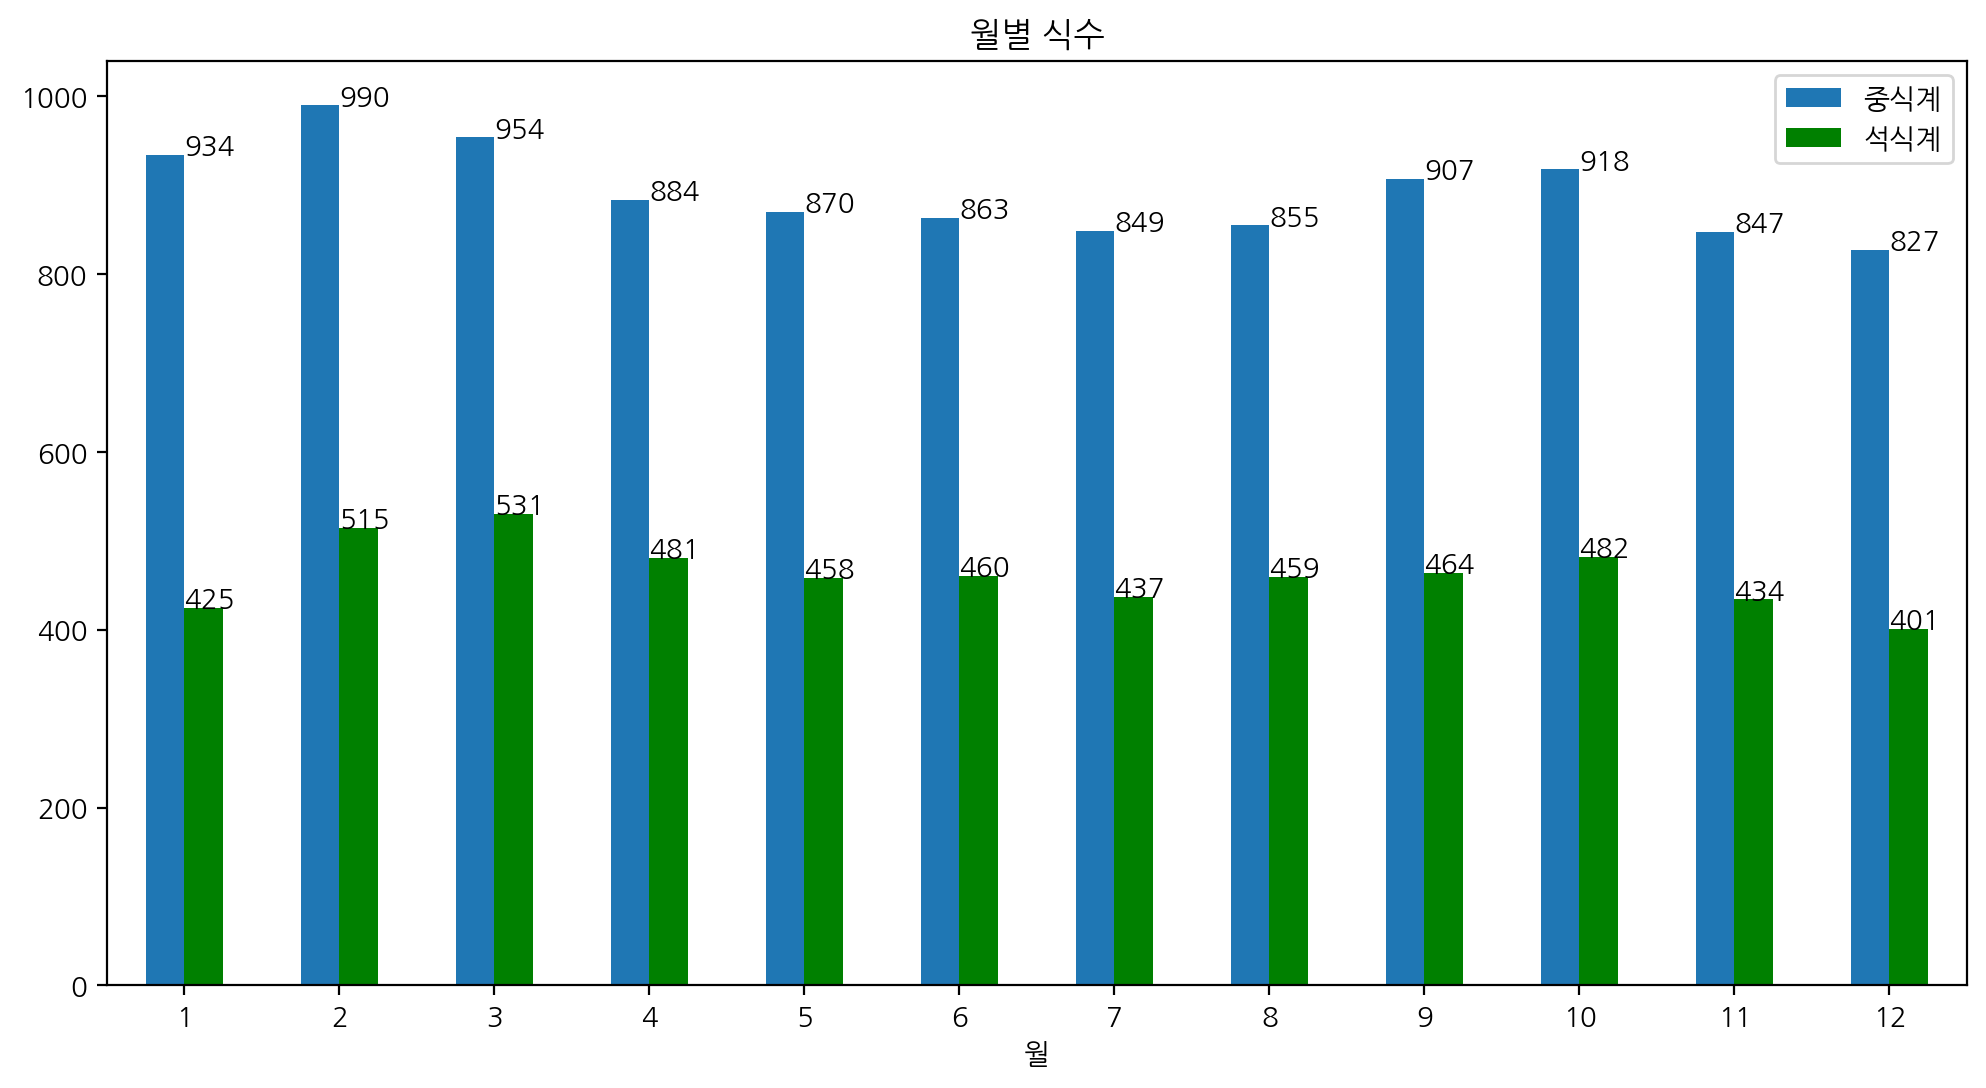

In [30]:
# 시각화
temp = train.groupby('월')[['중식계', '석식계']].mean()
a = temp.plot(kind='bar', rot=0, figsize=(12, 6), title='월별 식수', color={'중식계':'tab:blue', '석식계':'g'});
for i in range(temp.shape[0]):
    a.text(x=i, y=temp['중식계'].iloc[i], s=int(temp['중식계'].iloc[i].round(0)))
    a.text(x=i, y=temp['석식계'].iloc[i], s=int(temp['석식계'].iloc[i].round(0)))

## 요일별

In [31]:
# 중식계 비교
for i in range(1, 6):
    print(f'월: {train.loc[train["요일"]==i, ["중식계"]].mean().round(2)}')

월: 중식계    1146.4
dtype: float64
월: 중식계    925.62
dtype: float64
월: 중식계    905.21
dtype: float64
월: 중식계    823.99
dtype: float64
월: 중식계    653.59
dtype: float64


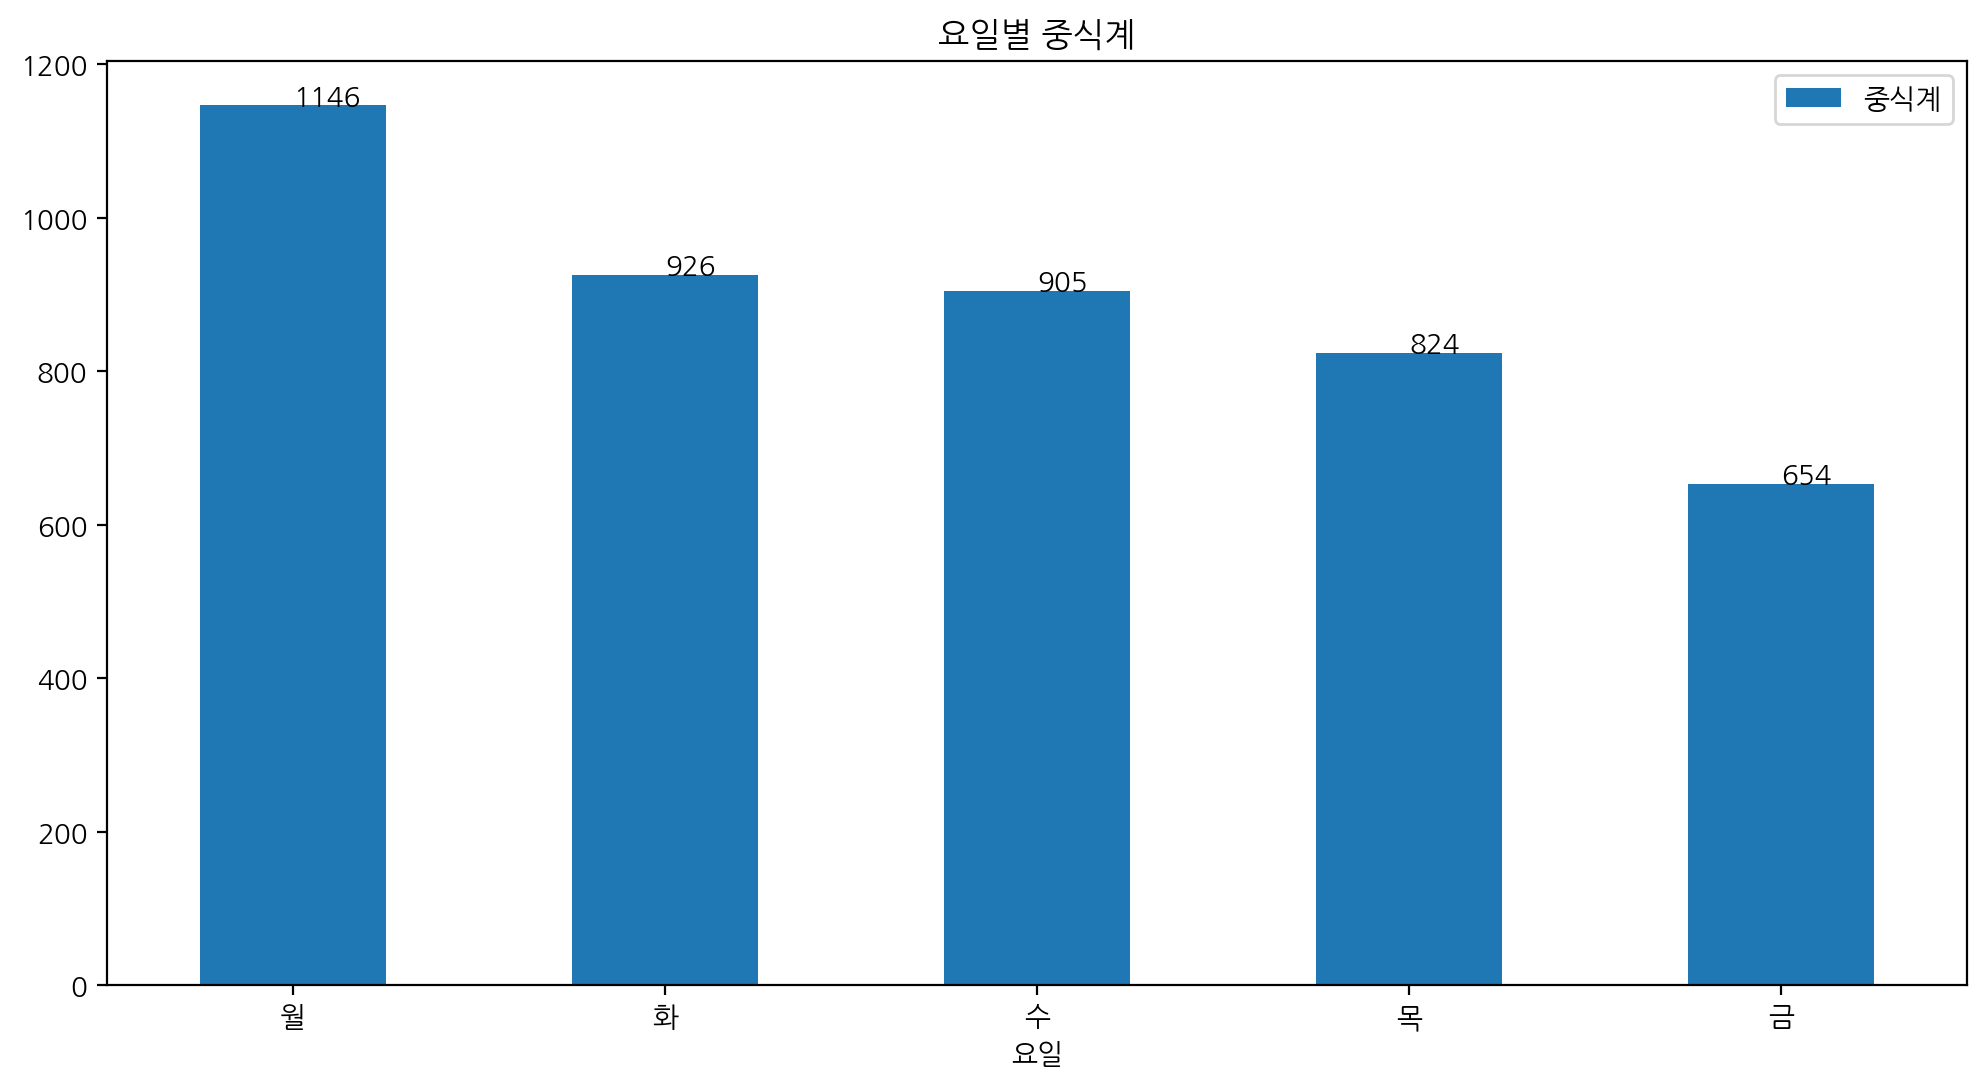

In [32]:
# 시각화
temp = train.groupby('요일').agg({'중식계':'mean'})
a = temp.plot(kind='bar', rot=0, title='요일별 중식계', figsize=(12, 6));
for i in range(temp.shape[0]):
    a.text(x=i, y=temp['중식계'].iloc[i], s=int(temp['중식계'].iloc[i].round(0)))
plt.xticks([0,1,2,3,4], ['월', '화', '수', '목', '금']);

In [33]:
# 금요일로 갈 수록 적게 먹는 이유가 뭘까?
for i in range(1, 6):
    print(f'월: {train.loc[train["요일"]==i, ["휴가자수", "출장자수", "식사가능인원", "재택근무자수"]].mean().round(2)}')

월: 휴가자수         4.92
출장자수       203.83
식사가능인원    2388.14
재택근무자수      45.71
dtype: float64
월: 휴가자수         4.53
출장자수       230.64
식사가능인원    2411.33
재택근무자수      46.74
dtype: float64
월: 휴가자수         4.51
출장자수       241.41
식사가능인원    2405.54
재택근무자수      45.65
dtype: float64
월: 휴가자수         4.68
출장자수       255.58
식사가능인원    2370.48
재택근무자수      42.39
dtype: float64
월: 휴가자수         5.40
출장자수       273.75
식사가능인원    2251.80
재택근무자수      37.12
dtype: float64


* 가장 직관적으로 출장자 수가 중식계 그래프와 비슷한 경향을 보일 듯

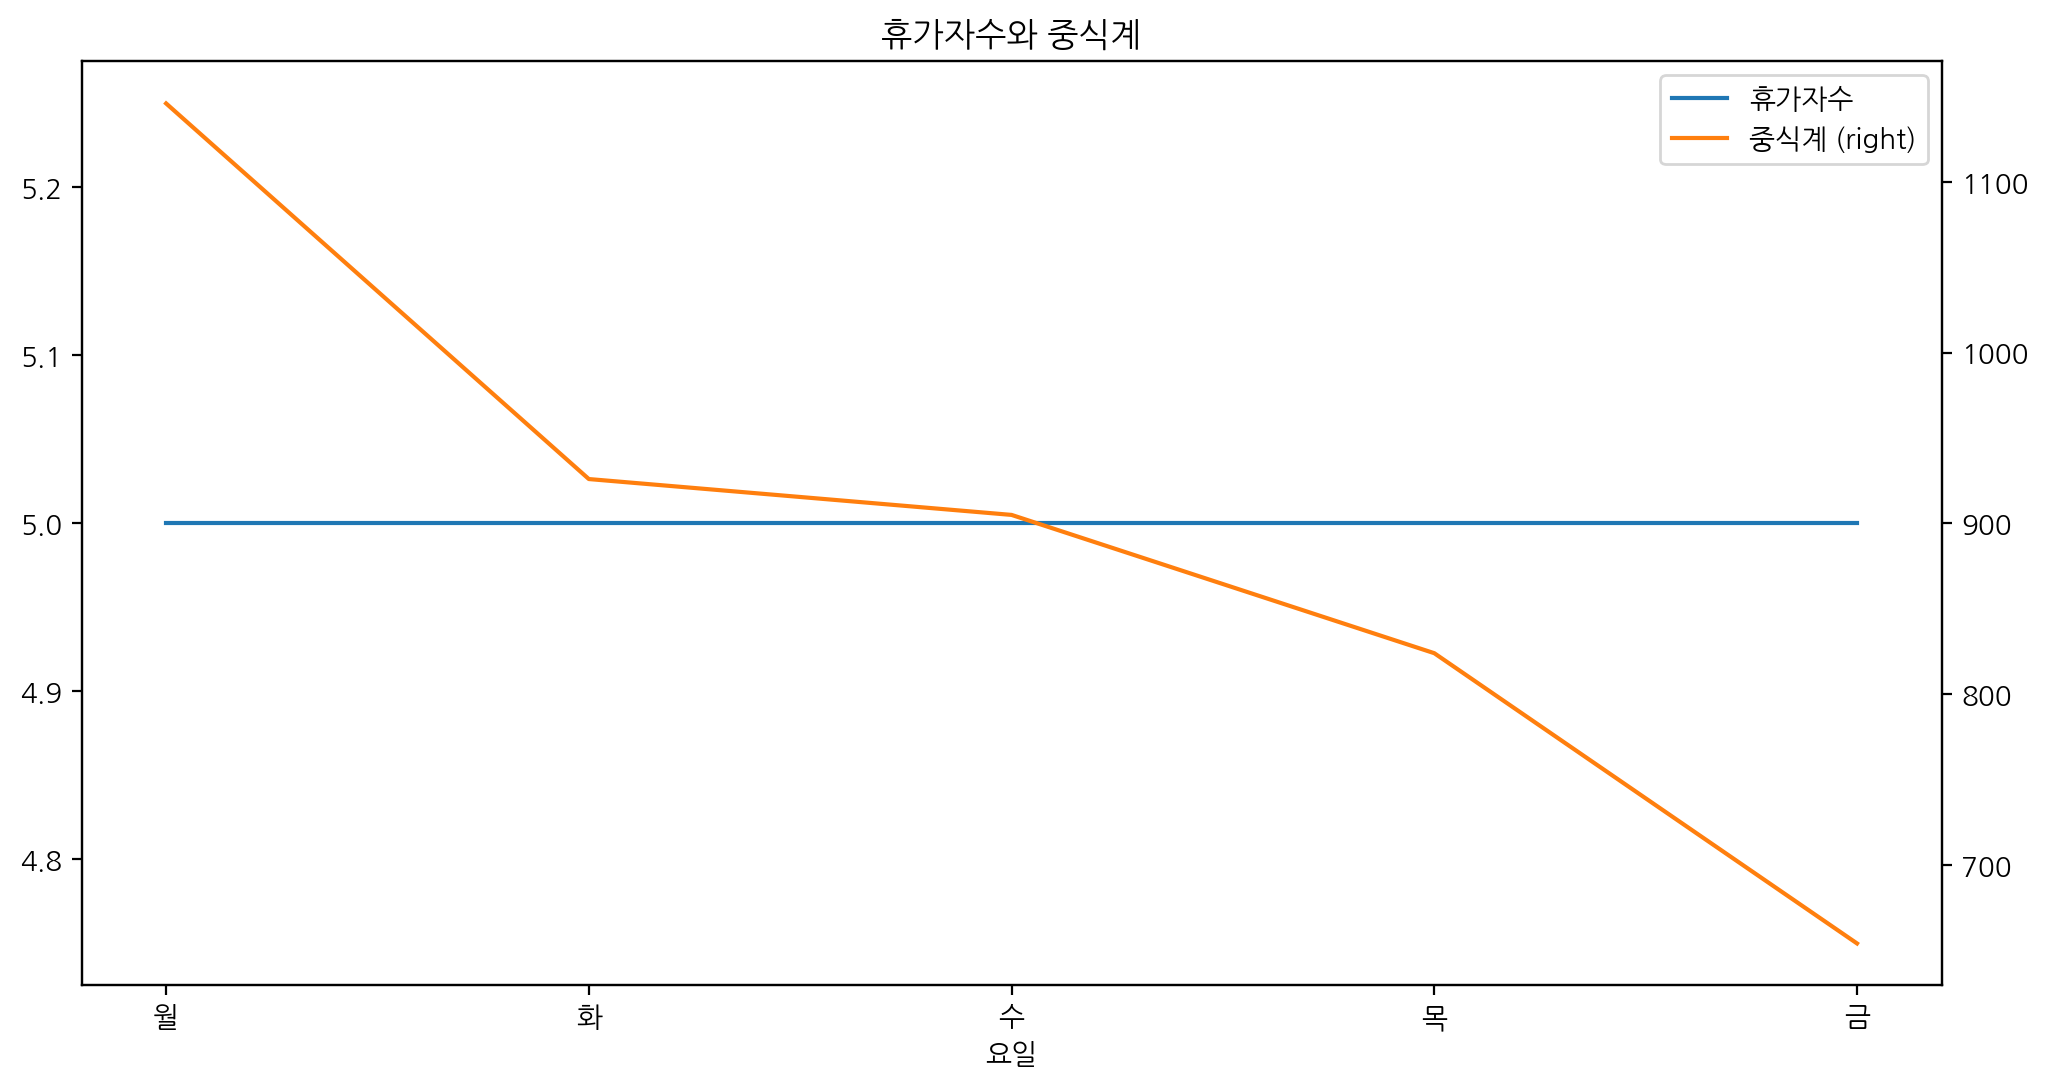

In [34]:
# 라인그래프로 비교하기...
temp = train.groupby('요일').agg({"휴가자수":'mean', '중식계':'mean'}).round(0)
a = temp.plot(rot=0, title='휴가자수와 중식계', figsize=(12, 6), secondary_y='중식계');
    
plt.xticks([1,2,3,4,5], ['월', '화', '수', '목', '금']);

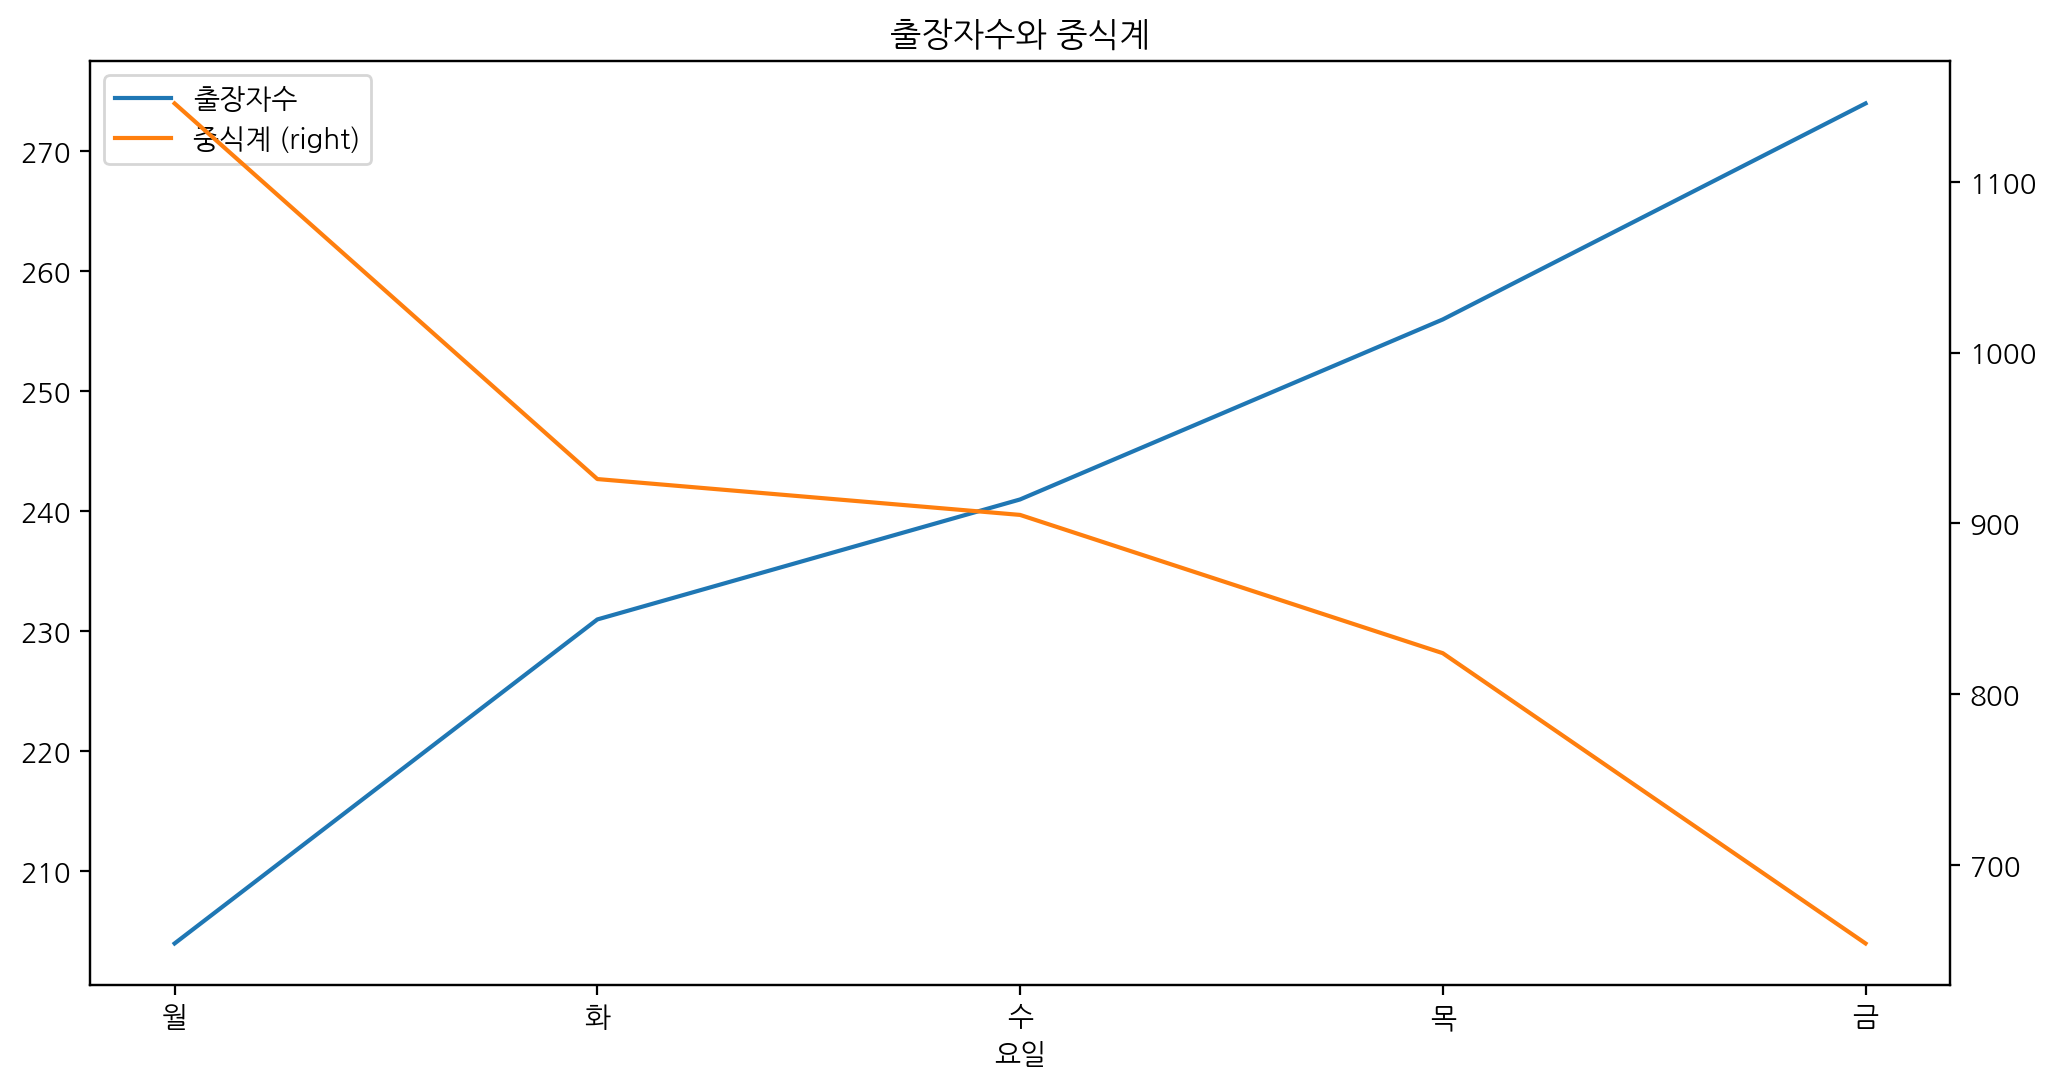

In [35]:
temp = train.groupby('요일').agg({"출장자수":'mean', '중식계':'mean'}).round(0)
a = temp.plot(rot=0, title='출장자수와 중식계', figsize=(12, 6), secondary_y='중식계');
    
plt.xticks([1,2,3,4,5], ['월', '화', '수', '목', '금']);

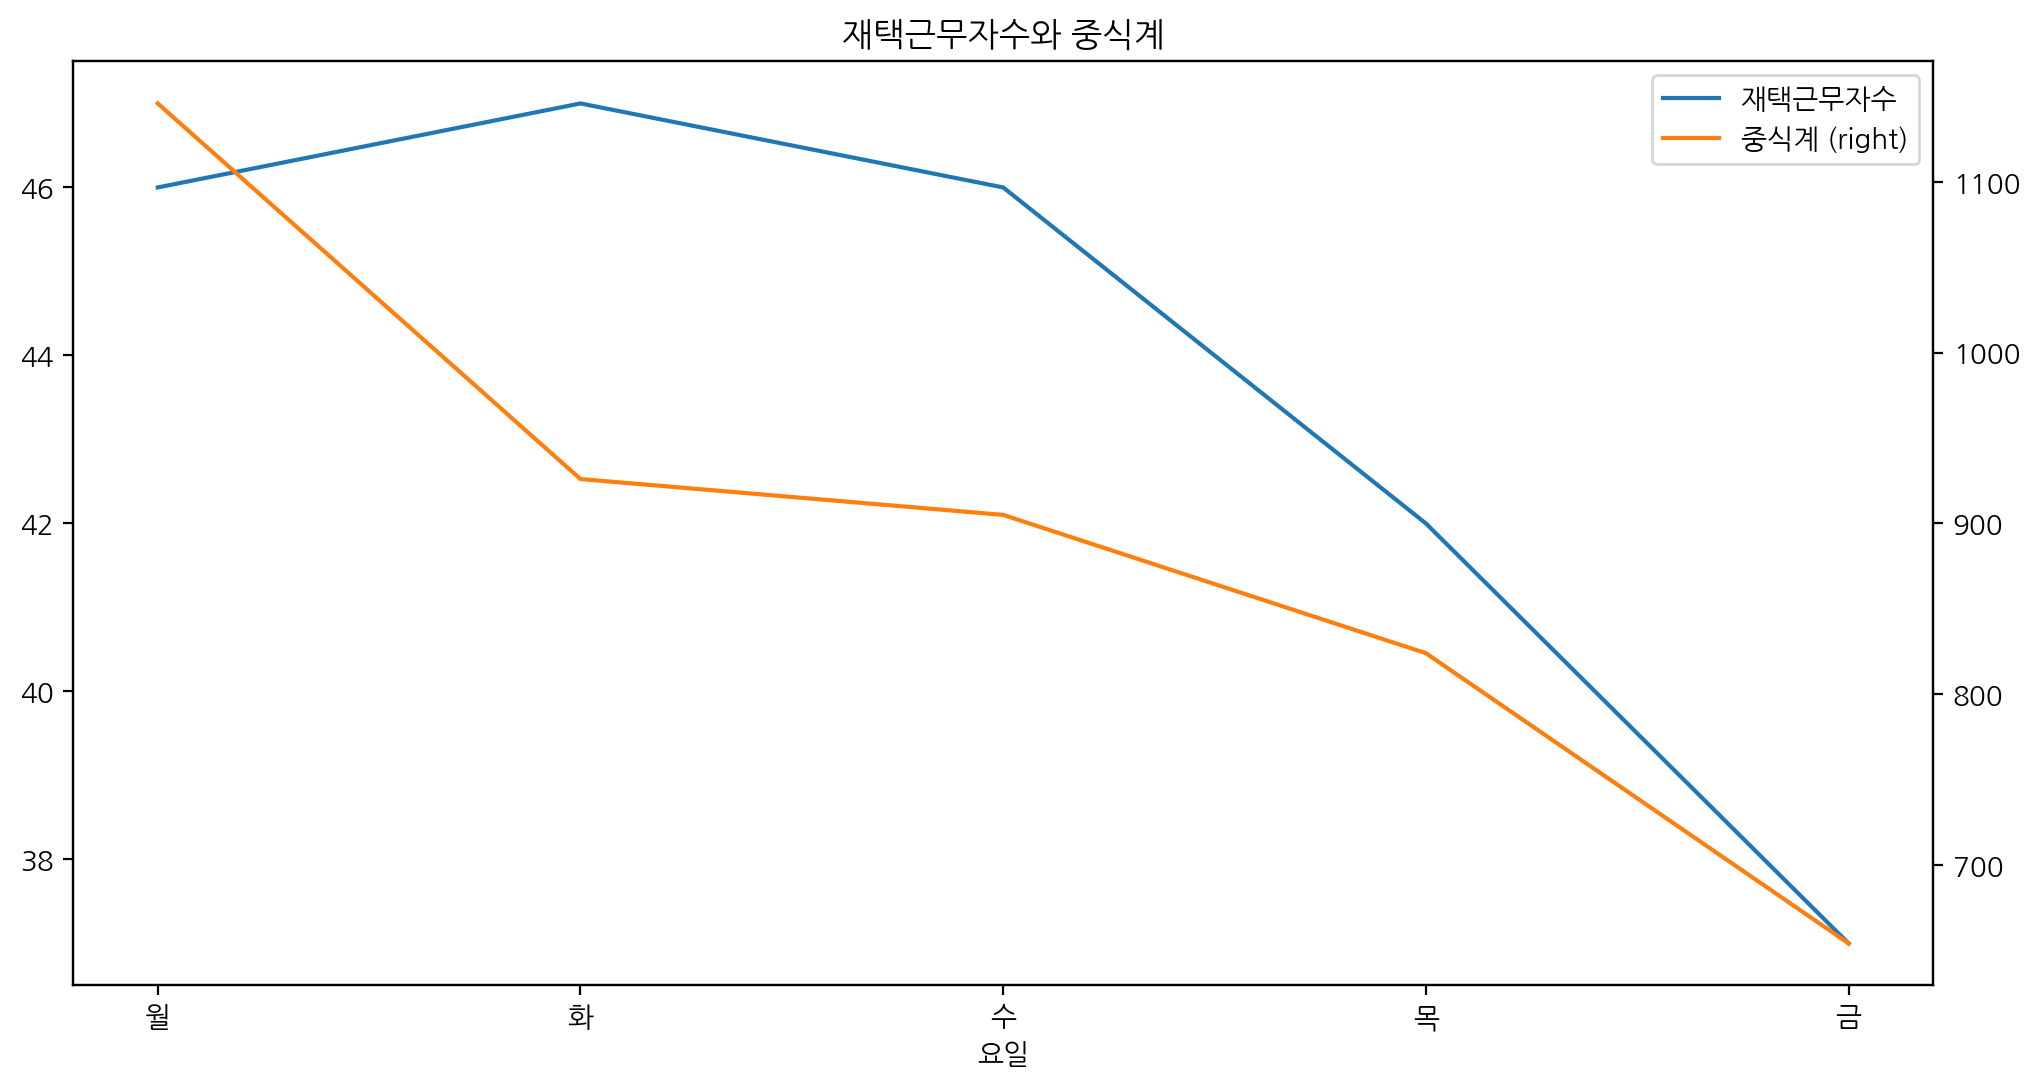

In [36]:
temp = train.groupby('요일').agg({"재택근무자수":'mean', '중식계':'mean'}).round(0)
a = temp.plot(rot=0, title='재택근무자수와 중식계', figsize=(12, 6), secondary_y='중식계');
    
plt.xticks([1,2,3,4,5], ['월', '화', '수', '목', '금']);

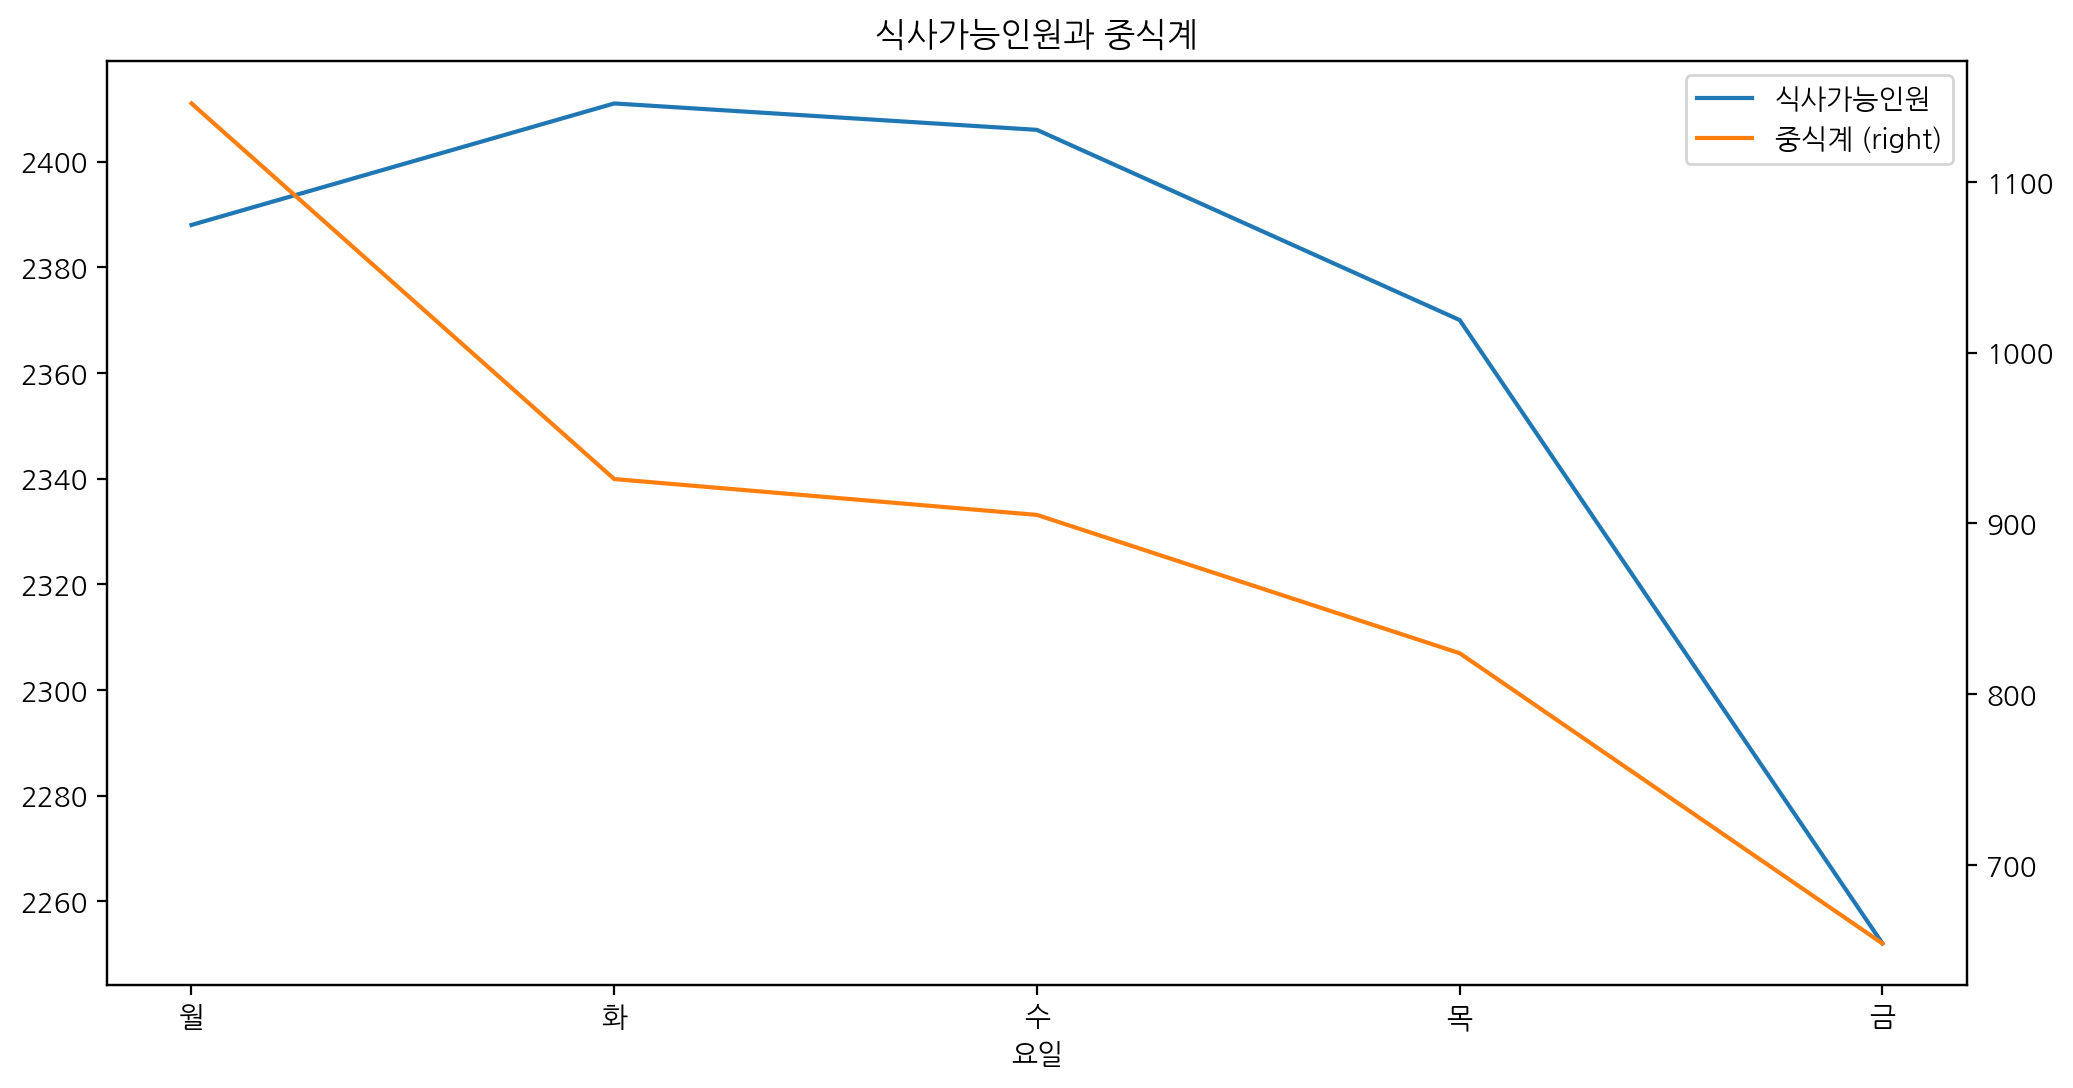

In [37]:
temp = train.groupby('요일').agg({"식사가능인원":'mean', '중식계':'mean'}).round(0)
a = temp.plot(rot=0, title='식사가능인원과 중식계', figsize=(12, 6), secondary_y='중식계');
    
plt.xticks([1,2,3,4,5], ['월', '화', '수', '목', '금']);

In [38]:
# 석식계 비교
print(f'월: {train.loc[train["요일"]==1, ["석식계"]].mean().round(2)}')
print(f'화: {train.loc[train["요일"]==2, ["석식계"]].mean().round(2)}')
print(f'수: {train.loc[train["요일"]==3, ["석식계"]].mean().round(2)}')
print(f'목: {train.loc[train["요일"]==4, ["석식계"]].mean().round(2)}')
print(f'금: {train.loc[train["요일"]==5, ["석식계"]].mean().round(2)}')

월: 석식계    539.53
dtype: float64
화: 석식계    520.13
dtype: float64
수: 석식계    363.62
dtype: float64
목: 석식계    480.4
dtype: float64
금: 석식계    404.94
dtype: float64


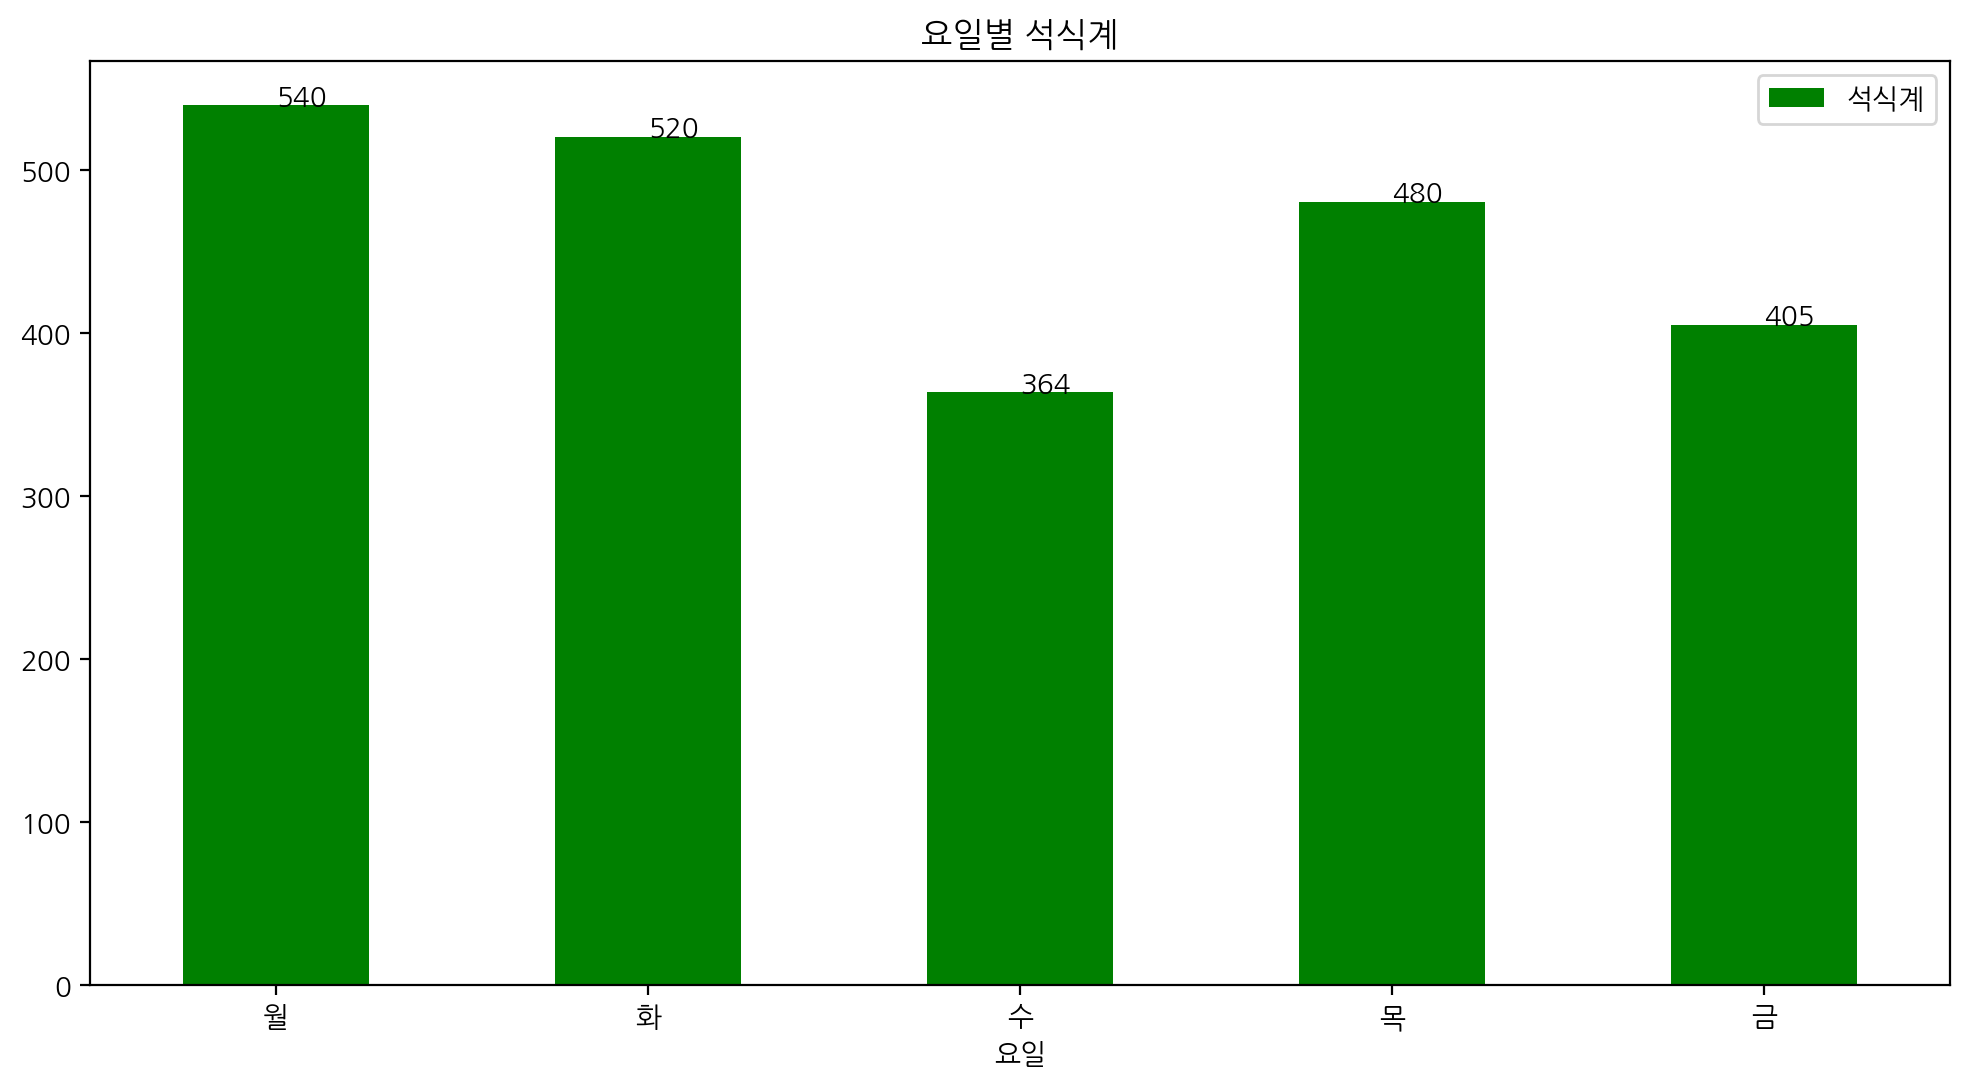

In [39]:
# 시각화
temp = train.groupby('요일').agg({'석식계':'mean'})
a = temp.plot(kind='bar', rot=0, title='요일별 석식계', figsize=(12, 6), color='g');
for i in range(temp.shape[0]):
    a.text(x=i, y=temp['석식계'].iloc[i], s=int(temp['석식계'].iloc[i].round(0)))
plt.xticks([0,1,2,3,4], ['월', '화', '수', '목', '금']);

* 수요일 석식계 평균이 낮은 이유는 매달 마지막 수요일이 운영을 안 하기 때문!
* 석식계를 예측할 train 은 운영 안 하는 날을 빼주자?

## 메뉴별

In [40]:
# 메뉴 형식 확인
menu = train[['중식메뉴', '석식메뉴']]
menu.iloc[0, 1]

'쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장  자반고등어구이  두부조림  건파래무침  포기김치 (김치:국내산) '

In [41]:
# 중식행이 1067 전후로 컬럼개수가 달라짐 
중식=[]
for i in menu.index:
    중식.append(menu.iloc[i, 0].split(' '))
    
lunch = pd.DataFrame(중식)

lunch_1 = lunch.iloc[:1067]
lunch_2 = lunch.iloc[1067:]

In [42]:
# 잘 나뉘었는지 확인
lunch_1.tail()

0              1       2  3        4         5         6  7   \
1062     쌀밥/잡곡밥  (쌀,현미,흑미:국내산)     대구탕       오삼불고기  (돈육:국내산)    해물동그랑땡      
1063     쌀밥/잡곡밥  (쌀,현미,흑미:국내산)  시금치된장국        닭볶음탕   (닭:국내산)  두부구이*양념장      
1064      나물비빔밥        (쌀:국내산)  오이사과냉국        치킨핑거   (닭:국내산)    맛살떡샐러드      
1065     쌀밥/잡곡밥  (쌀,현미,흑미:국내산)  매운소고기국        굴비구이             토마토프리타타      
1066  돈육버섯고추장덮밥     (쌀,돈육:국내산)    팽이무국     양파링카레튀김              모듬어묵볶음      

           8     9      10               11 12    13    14    15  
1062     오이무침  요구르트   포기김치  (배추국내,고추가루:중국산)     None  None  None  
1063   미역줄기볶음         포기김치  (배추국내,고추가루:중국산)     None  None  None  
1064    깻잎순무침  요구르트   포기김치         (김치:국내산)     None  None  None  
1065  도라지오이무침        배추겉절이  (배추국내,고추가루:중국산)     None  None  None  
1066    참나물생채  요구르트   포기김치         (김치:국내산)     None  None  None

In [43]:
# 컬럼15 확인
lunch_1[15].unique()

array([None, ''], dtype=object)

In [44]:
# 컬럼14 확인
lunch_1[14].unique()

array(['', None], dtype=object)

In [45]:
# 컬럼13 확인
lunch_1[13].unique()

array(['(배추,고추가루:국내산)', '(김치:국내산)', '', None], dtype=object)

In [46]:
# 13, 14, 15 컬럼은 다 필요없다
lunch_1 = lunch_1.drop(columns=15).copy()
lunch_1 = lunch_1.drop(columns=14).copy()
lunch_1 = lunch_1.drop(columns=13).copy()

In [47]:
# 컬럼별로 유일값 확인
for i in lunch_1.columns:
    print(f'\n{i}: {lunch_1[i].unique()}\n')


0: ['쌀밥/잡곡밥' '카레덮밥' '낙지비빔밥' '쌀밥/오곡밥' '비빔밥' '곤드레밥' '' '콩나물밥' '나물비빔밥' '단호박영양밥'
 '산채비빔밥' '낙지볶음밥' '열무비빔밥' '참치회덮밥' '연복풍덮밥' '열무보리비빔밥' '불고기덮밥' '산채비빔밥*강된장'
 '짜장밥' '버섯영양밥' '소불고기덮밥' '오곡밥' '곤드레밥*강된장' '봄나물비빔밥' '카레라이스' '짜장덮밥' '<초복특식>'
 '김치제육덮밥' '곤드레밥*간장양념' '단호박카레라이스' '곤드레밥*양념장' '삼계탕' '콩나물밥*양념장' '마파두부덮밥'
 '쌀밥/옛날돈까스' '야채볶음밥*짜장소스' '김치볶음밥' '오므라이스' '김치볶음밥/계란' '파인애플볶음밥' '김치필라프'
 '불고기비빔밥' '김밥볶음밥' '콩나물밥*달래장' '고기듬뿍카레라이스' '건강비빔밥*약고추장' '새우날치알볶음밥'
 '소고기콩나물밥*양념' '닭살카레라이스' '열무보리비빔밥/강된장' '베이컨김치볶음밥' '돈육버섯고추장덮밥']


1: ['(쌀,현미흑미:국내산)' '(쌀:국내산)' '(낙지:중국산,쌀:국내산)' '쌀밥/잡곡밥' '콩나물밥*달래장' '봄새싹비빔밥' ''
 '(쌀:국내산,돈육:국내산)' '(쌀:국내산,쇠고기:호주산)' '(쌀,돈육:국내산)' '(쌀:국내,쇠고기:호주)'
 '(쌀:국내,낙지:중국산)' '(쌀,돈육국내산)' '(쌀:국내,소고기:호주)' '(쌀:국내산,소고기:호주)'
 '(쌀,현미,흑미:국내산)' '(쌀:국내산,돈육:국내' '(쌀,돈민찌:국내산)' '(쌀,닭:국내산)']


2: ['오징어찌개' '김치찌개' '팽이장국' '쇠고기무국' '떡국' '시래기국' '꽃게탕' '시금치국' '냉이된장국' '유부장국'
 '대구찌개' '쇠고기느타리국' '콩나물국' '북어계란국' '수제비국' '얼갈이된장국' '쇠고기미역국' '근대된장국' '부대찌개'
 '차돌박이찌개' '북어국' '고추장찌개' '배추된장국' '어묵국' '쑥국' '콩나물김치국' '사골우거지국' '(쌀:국내산)'
 '순두부찌개' '올갱이아욱국' '' '냉이

In [48]:
# 원산지, '' 삭제
for i in lunch_1.columns:
    lunch_1.loc[lunch_1[i].str.contains('국산|국내산|호주산|호주|중국산|미국산|러시아산|칠레산|캐나다산|원양산|수입산|포클랜드|세네갈산|뉴질랜드산|뉴질랜드|세네갈|꾹내산|중국|베트남|스페인산|러시아'), i] = ''
    lunch_1.loc[lunch_1[i]=='', i] = 'x'
    
lunch_1

0  1       2  3        4  5         6  7        8     9      10  \
0        쌀밥/잡곡밥  x   오징어찌개  x     쇠불고기  x       계란찜  x    청포묵무침     x   요구르트   
1        쌀밥/잡곡밥  x    김치찌개  x    가자미튀김  x   모둠소세지구이  x    마늘쫑무침     x   요구르트   
2          카레덮밥  x    팽이장국  x     치킨핑거  x    쫄면야채무침  x    견과류조림     x   요구르트   
3        쌀밥/잡곡밥  x   쇠고기무국  x    주꾸미볶음  x       부추전  x    시금치나물     x   요구르트   
4        쌀밥/잡곡밥  x      떡국  x   돈육씨앗강정  x      우엉잡채  x    청경채무침     x   요구르트   
...         ... ..     ... ..      ... ..       ... ..      ...   ...    ...   
1062     쌀밥/잡곡밥  x     대구탕  x    오삼불고기  x    해물동그랑땡  x     오이무침  요구르트   포기김치   
1063     쌀밥/잡곡밥  x  시금치된장국  x     닭볶음탕  x  두부구이*양념장  x   미역줄기볶음     x   포기김치   
1064      나물비빔밥  x  오이사과냉국  x     치킨핑거  x    맛살떡샐러드  x    깻잎순무침  요구르트   포기김치   
1065     쌀밥/잡곡밥  x  매운소고기국  x     굴비구이  x   토마토프리타타  x  도라지오이무침     x  배추겉절이   
1066  돈육버섯고추장덮밥  x    팽이무국  x  양파링카레튀김  x    모듬어묵볶음  x    참나물생채  요구르트   포기김치   

     11     12  
0     x   포기김치  
1     x  배추겉절이  
2     x   포기김치  
3     x   포기김치  
4     x   포기김치  
...  ..    ...  
1062  x      x  
1063  x      x  
1064  x      x  
1065  x      x  
1066  x      x  

[1067 rows x 13 columns]

### train[:1066] 점심

#### 컬럼 0 정리

In [49]:
# 컬럼 0부터 차례로 봅시다~
lunch_1[0].unique()

array(['쌀밥/잡곡밥', '카레덮밥', '낙지비빔밥', '쌀밥/오곡밥', '비빔밥', '곤드레밥', 'x', '콩나물밥',
       '나물비빔밥', '단호박영양밥', '산채비빔밥', '낙지볶음밥', '열무비빔밥', '참치회덮밥', '연복풍덮밥',
       '열무보리비빔밥', '불고기덮밥', '산채비빔밥*강된장', '짜장밥', '버섯영양밥', '소불고기덮밥', '오곡밥',
       '곤드레밥*강된장', '봄나물비빔밥', '카레라이스', '짜장덮밥', '<초복특식>', '김치제육덮밥',
       '곤드레밥*간장양념', '단호박카레라이스', '곤드레밥*양념장', '삼계탕', '콩나물밥*양념장', '마파두부덮밥',
       '쌀밥/옛날돈까스', '야채볶음밥*짜장소스', '김치볶음밥', '오므라이스', '김치볶음밥/계란', '파인애플볶음밥',
       '김치필라프', '불고기비빔밥', '김밥볶음밥', '콩나물밥*달래장', '고기듬뿍카레라이스', '건강비빔밥*약고추장',
       '새우날치알볶음밥', '소고기콩나물밥*양념', '닭살카레라이스', '열무보리비빔밥/강된장', '베이컨김치볶음밥',
       '돈육버섯고추장덮밥'], dtype=object)

In [50]:
# 컬럼 0
# 초복특식?
lunch_1[lunch_1[0]=='<초복특식>']

0  1    2  3    4  5       6  7   8  9      10 11 12
356  <초복특식>  x  삼계탕  x  찹쌀밥  x  생야채&쌈장  x  수박  x    깍두기  x  x
840  <초복특식>  x  삼계탕  x  찹쌀밥  x  생야채&쌈장  x  수박  x  수제석박지  x  x

In [51]:
# 초복특식 제거
lunch_1.loc[lunch_1[0]=='<초복특식>', 0] = 'x'

In [52]:
# 'x' ?
lunch_1[lunch_1[0]=='x']

0         1    2       3    4          5       6        7   8         9   \
31   x    쌀밥/잡곡밥    x     꽃게탕    x      버섯불고기       x     계란말이   x    도토리묵무침   
32   x    쌀밥/잡곡밥    x  쇠고기샤브국    x      코다리강정       x  두부&김치볶음   x      유채나물   
33   x  콩나물밥*달래장    x     맑은국    x  치킨텐더*요거트D       x     땅콩조림   x    실곤약초무침   
34   x    쌀밥/잡곡밥    x   북어계란국    x     쇠고기장조림       x   오징어초무침   x     시래기나물   
35   x    쌀밥/잡곡밥    x     닭개장    x    자반고등어구이       x    비엔나볶음   x      열무나물   
36   x    쌀밥/잡곡밥    x  얼갈이된장국    x        닭갈비       x    해파리냉채   x       취나물   
37   x    쌀밥/잡곡밥    x  옹심이만두국    x      주꾸미볶음       x   새송이버섯전   x  치커리유자청생채   
38   x    봄새싹비빔밥    x     쪽파국    x      오징어튀김       x  알감자버터구이   x       오렌지   
39   x    쌀밥/잡곡밥    x  매운콩나물국    x    돈육굴소스볶음       x      동태전   x      봄동나물   
40   x    쌀밥/잡곡밥    x   버섯들깨탕    x       갈치조림       x     우엉잡채   x    아삭고추무침   
356  x         x  삼계탕       x  찹쌀밥          x  생야채&쌈장        x  수박         x   
840  x         x  삼계탕       x  찹쌀밥          x  생야채&쌈장        x  수박         x   

        10     11 12  
31       x   포기김치  x  
32       x    깍두기  x  
33       x   포기김치  x  
34       x   포기김치  x  
35       x  배추겉절이  x  
36       x   포기김치  x  
37       x   포기김치  x  
38       x   포기김치  x  
39       x   포기김치  x  
40       x   포기김치  x  
356    깍두기      x  x  
840  수제석박지      x  x

In [53]:
# 컬럼 1을 땡겨오자
idx = lunch_1[lunch_1[0]=='x'].index

for i in idx:
    lunch_1.loc[i, 0] = lunch_1.loc[i, 1]
    lunch_1.loc[i, 1] = 'x'

lunch_1.iloc[idx]

0  1    2       3    4          5       6        7   8         9   \
31     쌀밥/잡곡밥  x    x     꽃게탕    x      버섯불고기       x     계란말이   x    도토리묵무침   
32     쌀밥/잡곡밥  x    x  쇠고기샤브국    x      코다리강정       x  두부&김치볶음   x      유채나물   
33   콩나물밥*달래장  x    x     맑은국    x  치킨텐더*요거트D       x     땅콩조림   x    실곤약초무침   
34     쌀밥/잡곡밥  x    x   북어계란국    x     쇠고기장조림       x   오징어초무침   x     시래기나물   
35     쌀밥/잡곡밥  x    x     닭개장    x    자반고등어구이       x    비엔나볶음   x      열무나물   
36     쌀밥/잡곡밥  x    x  얼갈이된장국    x        닭갈비       x    해파리냉채   x       취나물   
37     쌀밥/잡곡밥  x    x  옹심이만두국    x      주꾸미볶음       x   새송이버섯전   x  치커리유자청생채   
38     봄새싹비빔밥  x    x     쪽파국    x      오징어튀김       x  알감자버터구이   x       오렌지   
39     쌀밥/잡곡밥  x    x  매운콩나물국    x    돈육굴소스볶음       x      동태전   x      봄동나물   
40     쌀밥/잡곡밥  x    x   버섯들깨탕    x       갈치조림       x     우엉잡채   x    아삭고추무침   
356         x  x  삼계탕       x  찹쌀밥          x  생야채&쌈장        x  수박         x   
840         x  x  삼계탕       x  찹쌀밥          x  생야채&쌈장        x  수박         x   

        10     11 12  
31       x   포기김치  x  
32       x    깍두기  x  
33       x   포기김치  x  
34       x   포기김치  x  
35       x  배추겉절이  x  
36       x   포기김치  x  
37       x   포기김치  x  
38       x   포기김치  x  
39       x   포기김치  x  
40       x   포기김치  x  
356    깍두기      x  x  
840  수제석박지      x  x

In [54]:
# 삼계탕은 컬럼 3에, 찹쌀밥은 컬럼 1에
lunch_1.loc[lunch_1[2]=='삼계탕', 3] = '삼계탕'
lunch_1.loc[lunch_1[2]=='삼계탕', 0] = '찹쌀밥'
lunch_1.loc[lunch_1[2]=='삼계탕', 4] = 'x'
lunch_1.loc[lunch_1[2]=='삼계탕', 2] = 'x'

lunch_1.iloc[[356, 840]]

0  1  2    3  4  5       6  7   8  9      10 11 12
356  찹쌀밥  x  x  삼계탕  x  x  생야채&쌈장  x  수박  x    깍두기  x  x
840  찹쌀밥  x  x  삼계탕  x  x  생야채&쌈장  x  수박  x  수제석박지  x  x

In [55]:
# 밥류가 아닌 것 확인
lunch_1[~lunch_1[0].str.contains('밥')]

0  1       2  3        4  5          6  7        8  9     10 11  \
341       카레라이스  x  유부주머니국  x   언양식불고기  x        떡볶이  x       수박  x  포기김치  x   
400       카레라이스  x    미소장국  x    떡갈비조림  x     모듬묵샐러드  x  요플레/오복지  x  포기김치  x   
459       카레라이스  x    미소장국  x    떡갈비조림  x    모듬묵*양념장  x  요플레/오복지  x  포기김치  x   
529    단호박카레라이스  x    유부장국  x      유린기  x      볼어묵볶음  x      오복지  x  포기김치  x   
603         삼계탕  x     찹쌀밥  x      생야채  x      참나물생채  x       수박  x   석박지  x   
786       카레라이스  x    미소장국  x   언양식불고기  x        떡볶이  x    방울토마토  x  포기김치  x   
848       카레라이스  x    가쯔오국  x   갈비통통만두  x     쫄면야채무침  x  호두견과류강정  x  포기김치  x   
907       카레라이스  x     우동국  x      유린기  x     메밀전병만두  x  단무지/바나나  x  포기김치  x   
934       오므라이스  x    미소장국  x     모듬튀김  x       콘샐러드  x  군고구마/과일  x  포기김치  x   
967       김치필라프  x    크림스프  x  토마토스파게티  x       콥샐러드  x     수제피클  x  열무김치  x   
1003      카레라이스  x    미소시루  x  감자만두*양념  x  애기새송이버섯볶음  x  골뱅이야채무침  x  포기김치  x   
1025  고기듬뿍카레라이스  x    미니우동  x   고구마고로케  x   오렌지자몽샐러드  x    실곤약무침  x  포기김치  x   
1049    닭살카레라이스  x  미역미소시루  x   후르츠탕수육  x      비빔메밀면  x  견과류멸치볶음  x  포기김치  x   

     12  
341   x  
400   x  
459   x  
529   x  
603   x  
786   x  
848   x  
907   x  
934   x  
967   x  
1003  x  
1025  x  
1049  x

In [56]:
# 삼계탕이 또 있네? => 정리
lunch_1.loc[603, 0] = '찹쌀밥'
lunch_1.loc[603, 2] = '삼계탕'

lunch_1[~lunch_1[0].str.contains('밥')]

0  1       2  3        4  5          6  7        8  9     10 11  \
341       카레라이스  x  유부주머니국  x   언양식불고기  x        떡볶이  x       수박  x  포기김치  x   
400       카레라이스  x    미소장국  x    떡갈비조림  x     모듬묵샐러드  x  요플레/오복지  x  포기김치  x   
459       카레라이스  x    미소장국  x    떡갈비조림  x    모듬묵*양념장  x  요플레/오복지  x  포기김치  x   
529    단호박카레라이스  x    유부장국  x      유린기  x      볼어묵볶음  x      오복지  x  포기김치  x   
786       카레라이스  x    미소장국  x   언양식불고기  x        떡볶이  x    방울토마토  x  포기김치  x   
848       카레라이스  x    가쯔오국  x   갈비통통만두  x     쫄면야채무침  x  호두견과류강정  x  포기김치  x   
907       카레라이스  x     우동국  x      유린기  x     메밀전병만두  x  단무지/바나나  x  포기김치  x   
934       오므라이스  x    미소장국  x     모듬튀김  x       콘샐러드  x  군고구마/과일  x  포기김치  x   
967       김치필라프  x    크림스프  x  토마토스파게티  x       콥샐러드  x     수제피클  x  열무김치  x   
1003      카레라이스  x    미소시루  x  감자만두*양념  x  애기새송이버섯볶음  x  골뱅이야채무침  x  포기김치  x   
1025  고기듬뿍카레라이스  x    미니우동  x   고구마고로케  x   오렌지자몽샐러드  x    실곤약무침  x  포기김치  x   
1049    닭살카레라이스  x  미역미소시루  x   후르츠탕수육  x      비빔메밀면  x  견과류멸치볶음  x  포기김치  x   

     12  
341   x  
400   x  
459   x  
529   x  
786   x  
848   x  
907   x  
934   x  
967   x  
1003  x  
1025  x  
1049  x

In [57]:
# 결측치 확인
lunch_1[lunch_1[0]=='x']

Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []

#### 컬럼 1 정리

In [58]:
# 컬럼 1 유일값 확인
lunch_1[1].unique()

array(['x'], dtype=object)

In [59]:
# 컬럼 1 은 drop 해도 될듯
lunch_1 = lunch_1.drop(columns=1).copy()

#### 컬럼 2 정리

In [60]:
# 컬럼 2 유일값 확인
lunch_1[2].unique()

array(['오징어찌개', '김치찌개', '팽이장국', '쇠고기무국', '떡국', '시래기국', '꽃게탕', '시금치국',
       '냉이된장국', '유부장국', '대구찌개', '쇠고기느타리국', '콩나물국', '북어계란국', '수제비국',
       '얼갈이된장국', '쇠고기미역국', '근대된장국', '부대찌개', '차돌박이찌개', '북어국', '고추장찌개',
       '배추된장국', '어묵국', '쑥국', '콩나물김치국', '사골우거지국', 'x', '순두부찌개', '올갱이아욱국',
       '냉이된장찌개', '육개장', '대구매운탕', '미소장국', '미역국', '돈육김치찌개', '무채국', '쇠고기샤브국',
       '매운어묵국', '시래기된장국', '오징어국', '된장찌개', '감자고추장찌개', '들깨버섯탕', '열무된장국',
       '북어콩나물국', '한방갈비탕', '미역장국', '쇠고기해장국', '강된장찌개', '오이미역냉국', '참치김치찌개',
       '매운콩나물국', '맑은국', '도토리묵냉국', '버섯들깨찌개', '가쯔오장국', '우무묵냉국', '호박잎찌개',
       '건새우아욱국', '오이냉국', '사골우거지탕', '우묵콩국', '청국장찌개', '부대찌개*라면사리', '버섯들깨탕',
       '복숭아미역냉국', '호박잎된장국', '사과오이냉국', '닭곰탕', '해물된장찌개', '버섯매운탕', '두부맑은국',
       '황태맑은국', '토란국', '아욱된장국', '느타리버섯국', '우거지해장국', '시금치된장국', '팽이버섯국',
       '건새우무국', '돈신탕(해장탕)', '계란국', '동태찌개', '알탕', '김치콩나물국', '김치국',
       '조랭이떡미역국', '설렁탕', '콩비지찌개', '순두부탕', '근대국', '홍합탕', '아욱국', '차돌박이된장찌개',
       '얼갈이국', '사골떡국', '황태국', '짬뽕국', '닭개장', '냉이콩나물국', '굴김치두부국', '배추국',

In [61]:
# 컬럼 2 정리
lunch_1[~lunch_1[2].str.contains('국|찌개|탕|장|스프|짬뽕|우동|시루|소바|수제비')]

0  2       3  4          5       6        7   8         9      10  \
31     쌀밥/잡곡밥  x     꽃게탕  x      버섯불고기       x     계란말이   x    도토리묵무침      x   
32     쌀밥/잡곡밥  x  쇠고기샤브국  x      코다리강정       x  두부&김치볶음   x      유채나물      x   
33   콩나물밥*달래장  x     맑은국  x  치킨텐더*요거트D       x     땅콩조림   x    실곤약초무침      x   
34     쌀밥/잡곡밥  x   북어계란국  x     쇠고기장조림       x   오징어초무침   x     시래기나물      x   
35     쌀밥/잡곡밥  x     닭개장  x    자반고등어구이       x    비엔나볶음   x      열무나물      x   
36     쌀밥/잡곡밥  x  얼갈이된장국  x        닭갈비       x    해파리냉채   x       취나물      x   
37     쌀밥/잡곡밥  x  옹심이만두국  x      주꾸미볶음       x   새송이버섯전   x  치커리유자청생채      x   
38     봄새싹비빔밥  x     쪽파국  x      오징어튀김       x  알감자버터구이   x       오렌지      x   
39     쌀밥/잡곡밥  x  매운콩나물국  x    돈육굴소스볶음       x      동태전   x      봄동나물      x   
40     쌀밥/잡곡밥  x   버섯들깨탕  x       갈치조림       x     우엉잡채   x    아삭고추무침      x   
48     쌀밥/잡곡밥  x    수제비국  x    돈육굴소스볶음       x     양배추쌈   x       무생채      x   
356       찹쌀밥  x     삼계탕  x          x  생야채&쌈장        x  수박         x    깍두기   
840       찹쌀밥  x     삼계탕  x          x  생야채&쌈장        x  수박         x  수제석박지   

        11 12  
31    포기김치  x  
32     깍두기  x  
33    포기김치  x  
34    포기김치  x  
35   배추겉절이  x  
36    포기김치  x  
37    포기김치  x  
38    포기김치  x  
39    포기김치  x  
40    포기김치  x  
48    포기김치  x  
356      x  x  
840      x  x

In [62]:
# 컬럼 3을 땡겨오자
idx = lunch_1[lunch_1[2]=='x'].index

for i in idx:
    lunch_1.loc[i, 2] = lunch_1.loc[i, 3]
    lunch_1.loc[i, 3] = 'x'

lunch_1.iloc[idx]

0       2  3  4          5       6        7   8         9      10  \
31     쌀밥/잡곡밥     꽃게탕  x  x      버섯불고기       x     계란말이   x    도토리묵무침      x   
32     쌀밥/잡곡밥  쇠고기샤브국  x  x      코다리강정       x  두부&김치볶음   x      유채나물      x   
33   콩나물밥*달래장     맑은국  x  x  치킨텐더*요거트D       x     땅콩조림   x    실곤약초무침      x   
34     쌀밥/잡곡밥   북어계란국  x  x     쇠고기장조림       x   오징어초무침   x     시래기나물      x   
35     쌀밥/잡곡밥     닭개장  x  x    자반고등어구이       x    비엔나볶음   x      열무나물      x   
36     쌀밥/잡곡밥  얼갈이된장국  x  x        닭갈비       x    해파리냉채   x       취나물      x   
37     쌀밥/잡곡밥  옹심이만두국  x  x      주꾸미볶음       x   새송이버섯전   x  치커리유자청생채      x   
38     봄새싹비빔밥     쪽파국  x  x      오징어튀김       x  알감자버터구이   x       오렌지      x   
39     쌀밥/잡곡밥  매운콩나물국  x  x    돈육굴소스볶음       x      동태전   x      봄동나물      x   
40     쌀밥/잡곡밥   버섯들깨탕  x  x       갈치조림       x     우엉잡채   x    아삭고추무침      x   
48     쌀밥/잡곡밥    수제비국  x  x    돈육굴소스볶음       x     양배추쌈   x       무생채      x   
356       찹쌀밥     삼계탕  x  x          x  생야채&쌈장        x  수박         x    깍두기   
840       찹쌀밥     삼계탕  x  x          x  생야채&쌈장        x  수박         x  수제석박지   

        11 12  
31    포기김치  x  
32     깍두기  x  
33    포기김치  x  
34    포기김치  x  
35   배추겉절이  x  
36    포기김치  x  
37    포기김치  x  
38    포기김치  x  
39    포기김치  x  
40    포기김치  x  
48    포기김치  x  
356      x  x  
840      x  x

In [63]:
# 결측치 확인
lunch_1[lunch_1[2]=='x']

Empty DataFrame
Columns: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []

#### 컬럼 3 정리

In [64]:
# 컬럼 3 확인
lunch_1[3].unique()

array(['x'], dtype=object)

In [65]:
# 드랍 ㄱㄱ~
lunch_1 = lunch_1.drop(columns=3).copy()

#### 컬럼 4 정리

In [66]:
# 컬럼 4 확인
lunch_1[4].unique()

array(['쇠불고기', '가자미튀김', '치킨핑거', '주꾸미볶음', '돈육씨앗강정', '훈제오리구이', '돈육굴소스볶음',
       '닭감자조림', '탕수어', '쇠고기장조림', '고구마치즈구이', '마늘간장치킨', '갈치구이', '돈육간장볶음',
       '소세지피망볶음', '닭갈비', '오징어볶음', '제육볶음', '탕수육', '고등어김치말이', '돈육장조림',
       '닭데리야끼조림', '수제돈가스', '돈육고추장볶음', '소불고기', '미니채소떡갈비', 'x', '오징어볶음*소면',
       '매운돼지갈비찜', '순살양념치킨', '쇠고기단호박조림', '돈육강정', '꽁치한마리구이', '매콤떡갈비조림',
       '쇠고기볶음', '등갈비김치찜', '돈간장불고기', '궁중떡찜', '양념파닭', '미트볼조림', '모둠장조림',
       '버섯불고기', '돈육칠리강정', '찜닭', '닭오븐구이', '쇠고기불고기', '꼬지삼색전', '닭양념조림',
       '누룽지탕수육', '오징어튀김', '순살깐풍기', '돼지갈비찜', '떡갈비조림', '가자미양념찜', '레몬탕수육',
       '간장치킨', '돈삼겹보쌈', '매콤낙지볶음', '목살데리야끼구이', '고등어구이', '간장돼지갈비찜',
       '유자청제육볶음', '꽁치김치말이찜', '닭강정', '갈치조림', '갈릭돈까스', '순살파닭', '사천식탕수육',
       '매운주꾸미볶음', '돈육떡강정', '목살데리야끼', '고추장불고기', '불닭볶음', '동파삼겹수육', '훈제오리냉채',
       '꽁치오븐구이', '꽃맛살볶음', '매콤돼지갈비찜', '미니함박조림', '장어강정', '삼겹살오븐구이',
       '새우까스&탈탈소스', '고등어조림', '갈릭돈가스', '소고기숙주볶음', '고추잡채*꽃빵', '칠리탕수육',
       '닭볶음', '동태무조림', '마늘치킨', '계란말이', '닭찜', '가자미카레튀김', '오리고추장볶음', '유린기',
       '오리훈

In [67]:
# 결측치 확인
lunch_1[lunch_1[4]=='x']

0       2  4          5       6        7   8         9      10  \
31     쌀밥/잡곡밥     꽃게탕  x      버섯불고기       x     계란말이   x    도토리묵무침      x   
32     쌀밥/잡곡밥  쇠고기샤브국  x      코다리강정       x  두부&김치볶음   x      유채나물      x   
33   콩나물밥*달래장     맑은국  x  치킨텐더*요거트D       x     땅콩조림   x    실곤약초무침      x   
34     쌀밥/잡곡밥   북어계란국  x     쇠고기장조림       x   오징어초무침   x     시래기나물      x   
35     쌀밥/잡곡밥     닭개장  x    자반고등어구이       x    비엔나볶음   x      열무나물      x   
36     쌀밥/잡곡밥  얼갈이된장국  x        닭갈비       x    해파리냉채   x       취나물      x   
37     쌀밥/잡곡밥  옹심이만두국  x      주꾸미볶음       x   새송이버섯전   x  치커리유자청생채      x   
38     봄새싹비빔밥     쪽파국  x      오징어튀김       x  알감자버터구이   x       오렌지      x   
39     쌀밥/잡곡밥  매운콩나물국  x    돈육굴소스볶음       x      동태전   x      봄동나물      x   
40     쌀밥/잡곡밥   버섯들깨탕  x       갈치조림       x     우엉잡채   x    아삭고추무침      x   
48     쌀밥/잡곡밥    수제비국  x    돈육굴소스볶음       x     양배추쌈   x       무생채      x   
356       찹쌀밥     삼계탕  x          x  생야채&쌈장        x  수박         x    깍두기   
840       찹쌀밥     삼계탕  x          x  생야채&쌈장        x  수박         x  수제석박지   

        11 12  
31    포기김치  x  
32     깍두기  x  
33    포기김치  x  
34    포기김치  x  
35   배추겉절이  x  
36    포기김치  x  
37    포기김치  x  
38    포기김치  x  
39    포기김치  x  
40    포기김치  x  
48    포기김치  x  
356      x  x  
840      x  x

In [68]:
# 컬럼 5을 땡겨오자
idx = lunch_1[lunch_1[4]=='x'].index

for i in idx:
    lunch_1.loc[i, 4] = lunch_1.loc[i, 5]
    lunch_1.loc[i, 5] = 'x'

lunch_1.iloc[idx]

0       2          4  5       6        7   8         9      10  \
31     쌀밥/잡곡밥     꽃게탕      버섯불고기  x       x     계란말이   x    도토리묵무침      x   
32     쌀밥/잡곡밥  쇠고기샤브국      코다리강정  x       x  두부&김치볶음   x      유채나물      x   
33   콩나물밥*달래장     맑은국  치킨텐더*요거트D  x       x     땅콩조림   x    실곤약초무침      x   
34     쌀밥/잡곡밥   북어계란국     쇠고기장조림  x       x   오징어초무침   x     시래기나물      x   
35     쌀밥/잡곡밥     닭개장    자반고등어구이  x       x    비엔나볶음   x      열무나물      x   
36     쌀밥/잡곡밥  얼갈이된장국        닭갈비  x       x    해파리냉채   x       취나물      x   
37     쌀밥/잡곡밥  옹심이만두국      주꾸미볶음  x       x   새송이버섯전   x  치커리유자청생채      x   
38     봄새싹비빔밥     쪽파국      오징어튀김  x       x  알감자버터구이   x       오렌지      x   
39     쌀밥/잡곡밥  매운콩나물국    돈육굴소스볶음  x       x      동태전   x      봄동나물      x   
40     쌀밥/잡곡밥   버섯들깨탕       갈치조림  x       x     우엉잡채   x    아삭고추무침      x   
48     쌀밥/잡곡밥    수제비국    돈육굴소스볶음  x       x     양배추쌈   x       무생채      x   
356       찹쌀밥     삼계탕          x  x  생야채&쌈장        x  수박         x    깍두기   
840       찹쌀밥     삼계탕          x  x  생야채&쌈장        x  수박         x  수제석박지   

        11 12  
31    포기김치  x  
32     깍두기  x  
33    포기김치  x  
34    포기김치  x  
35   배추겉절이  x  
36    포기김치  x  
37    포기김치  x  
38    포기김치  x  
39    포기김치  x  
40    포기김치  x  
48    포기김치  x  
356      x  x  
840      x  x

In [69]:
# 결측치 확인
lunch_1[lunch_1[4]=='x']

0    2  4  5       6  7   8  9      10 11 12
356  찹쌀밥  삼계탕  x  x  생야채&쌈장  x  수박  x    깍두기  x  x
840  찹쌀밥  삼계탕  x  x  생야채&쌈장  x  수박  x  수제석박지  x  x

#### 컬럼 5 정리

In [70]:
# 컬럼 5 확인
lunch_1[5].unique()

array(['x', '*타르타르소스', '해물볶음우동'], dtype=object)

In [71]:
# 유일값 확인
lunch_1[lunch_1[5].str.contains('\*타르타르소스|해물볶음우동')]

0      2         4        5        6         7      8      9   \
169   산채비빔밥*강된장  팽이버섯국     생선커틀릿  *타르타르소스        x     오복지무침      x  오렌지주스   
1033     쌀밥/잡곡밥  새우완자탕  고구마치즈돈까스   해물볶음우동  연어훈제샐러드  두릅새송이초무침  자몽에이드      x   

         10    11 12  
169       x  포기김치  x  
1033  알타리김치     x  x

In [72]:
# 컬럼 5 정리
lunch_1.loc[169, 4] = '생선커틀릿/*타르타르소스'
lunch_1.loc[169, 5] = 'x'
lunch_1.loc[1033, 2] = '새우완자탕/해물볶음우동'
lunch_1.loc[1033, 5] = 'x'

In [73]:
# 결측치 확인
lunch_1[lunch_1[5]!='x']

Empty DataFrame
Columns: [0, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Index: []

In [74]:
# drop ㄱㄱ~
lunch_1 = lunch_1.drop(columns=5).copy()

#### 컬럼 6 정리

In [75]:
# 컬럼 6 확인
lunch_1[6].unique()

array(['계란찜', '모둠소세지구이', '쫄면야채무침', '부추전', '우엉잡채', '도토리묵무침', '옥수수전',
       '연두부*양념장', '오징어숙회무침', '통도라지구이', '해초무침', '새송이버섯볶음', '호박꼬지&고사리&무나물',
       '버섯잡채', '맛탕', '새싹두부구이', '늙은호박전', '맛살계란말이', '새송이버섯조림', '메추리알조림',
       '모둠묵*양념장', '소세지구이', '홍어무침', '해물파전', '탕평채', '모둠양채쌈*쌈장', '골뱅이무침*소면',
       '두부계란부침', '파래김*양념장', '연근땅콩조림', 'x', '브로컬리맛살볶음', '모둠소시지구이', '두부조림',
       '무쌈/양파절임', '열무나물', '도라지초무침', '콩나물잡채', '고기전', '청포묵무침', '연근조림',
       '김치전', '치즈계란말이', '알감자버터구이', '동그랑땡부침', '고등어카레구이', '맛살겨자채', '온두부',
       '동태전', '오징어초무침', '멸치크랜베리볶음', '꽃맛살볶음', '새송이버섯전', '우엉조림', '비엔나감자볶음',
       '동그랑땡전', '명태조림', '잡채', '궁중떡볶이', '두부구이', '홍어채무침', '맛살콩나물냉채',
       '참치야채전', '쫄면무침', '명태엿장조림', '마늘쫑볶음', '골뱅이무침&소면', '실곤약초무침', '닭가슴살냉채',
       '계란말이', '두부새싹구이', '맛살겨자초무침', '돈육잡채', '감자볶음', '감자만두', '삼치구이', '춘권',
       '해파리겨자채', '감자채볶음', '마늘쫑무침', '닭살겨자냉채', '웨지감자오븐구이', '연근/오징어튀김',
       '오꼬노미계란말이', '오징어브로컬리숙회', '매운어묵볶음', '고구마범벅', '비엔나피망볶음', '땅콩조림',
       '꽁치와사비구이', '모듬소시지볶음', '과일샐러드', '모둠버섯볶음', '동그랑땡', '어묵볶음', '햄피망볶

In [76]:
# 결측치 확인
lunch_1[lunch_1[6]=='x']

0       2              4  6        7  8         9  10     11 12
31      쌀밥/잡곡밥     꽃게탕          버섯불고기  x     계란말이  x    도토리묵무침  x   포기김치  x
32      쌀밥/잡곡밥  쇠고기샤브국          코다리강정  x  두부&김치볶음  x      유채나물  x    깍두기  x
33    콩나물밥*달래장     맑은국      치킨텐더*요거트D  x     땅콩조림  x    실곤약초무침  x   포기김치  x
34      쌀밥/잡곡밥   북어계란국         쇠고기장조림  x   오징어초무침  x     시래기나물  x   포기김치  x
35      쌀밥/잡곡밥     닭개장        자반고등어구이  x    비엔나볶음  x      열무나물  x  배추겉절이  x
36      쌀밥/잡곡밥  얼갈이된장국            닭갈비  x    해파리냉채  x       취나물  x   포기김치  x
37      쌀밥/잡곡밥  옹심이만두국          주꾸미볶음  x   새송이버섯전  x  치커리유자청생채  x   포기김치  x
38      봄새싹비빔밥     쪽파국          오징어튀김  x  알감자버터구이  x       오렌지  x   포기김치  x
39      쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음  x      동태전  x      봄동나물  x   포기김치  x
40      쌀밥/잡곡밥   버섯들깨탕           갈치조림  x     우엉잡채  x    아삭고추무침  x   포기김치  x
48      쌀밥/잡곡밥    수제비국        돈육굴소스볶음  x     양배추쌈  x       무생채  x   포기김치  x
169  산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스  x    오복지무침  x     오렌지주스  x   포기김치  x

In [77]:
# 컬럼 7 땡겨오기
idx = lunch_1[lunch_1[6]=='x'].index
for i in idx:
    lunch_1.loc[i, 6] = lunch_1.loc[i, 7]
    lunch_1.loc[i, 7] = 'x'
    
lunch_1.iloc[idx]

0       2              4        6  7  8         9  10     11 12
31      쌀밥/잡곡밥     꽃게탕          버섯불고기     계란말이  x  x    도토리묵무침  x   포기김치  x
32      쌀밥/잡곡밥  쇠고기샤브국          코다리강정  두부&김치볶음  x  x      유채나물  x    깍두기  x
33    콩나물밥*달래장     맑은국      치킨텐더*요거트D     땅콩조림  x  x    실곤약초무침  x   포기김치  x
34      쌀밥/잡곡밥   북어계란국         쇠고기장조림   오징어초무침  x  x     시래기나물  x   포기김치  x
35      쌀밥/잡곡밥     닭개장        자반고등어구이    비엔나볶음  x  x      열무나물  x  배추겉절이  x
36      쌀밥/잡곡밥  얼갈이된장국            닭갈비    해파리냉채  x  x       취나물  x   포기김치  x
37      쌀밥/잡곡밥  옹심이만두국          주꾸미볶음   새송이버섯전  x  x  치커리유자청생채  x   포기김치  x
38      봄새싹비빔밥     쪽파국          오징어튀김  알감자버터구이  x  x       오렌지  x   포기김치  x
39      쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음      동태전  x  x      봄동나물  x   포기김치  x
40      쌀밥/잡곡밥   버섯들깨탕           갈치조림     우엉잡채  x  x    아삭고추무침  x   포기김치  x
48      쌀밥/잡곡밥    수제비국        돈육굴소스볶음     양배추쌈  x  x       무생채  x   포기김치  x
169  산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스    오복지무침  x  x     오렌지주스  x   포기김치  x

In [78]:
# 결측치 확인
lunch_1[lunch_1[6]=='x']

Empty DataFrame
Columns: [0, 2, 4, 6, 7, 8, 9, 10, 11, 12]
Index: []

#### 컬럼 7 정리

In [79]:
# 컬럼 7 확인
lunch_1[7].unique()

array(['x', '*발사믹소스', '새우튀김', '머위된장무침', '카프레제샐러드', '베리베리샐러드', '단호박견과류구이',
       '두릅새송이초무침', '그린샐러드'], dtype=object)

In [80]:
# 결측치가 아닌 행 확인
lunch_1[lunch_1[7]!='x']

0             2          4          6         7            8   \
589     카레덮밥         가쯔오장국        깐풍육       구운채소    *발사믹소스        오복지무침   
643   소불고기덮밥         가쯔오장국      오징어튀김       구운채소    *발사믹소스        오복지무침   
1027  쌀밥/잡곡밥        홍초콩나물국     LA갈비구이  주꾸미세비체샐러드      새우튀김    참나물땅콩가루무침   
1029  쌀밥/잡곡밥        소고기당면국  바질페스토스파게티     연어스테이크    머위된장무침        비트무피클   
1030  쌀밥/잡곡밥           황태국      우엉불고기     야채계란말이   카프레제샐러드       오이사과생채   
1031  쌀밥/잡곡밥          멸치국수       오향장육   꼬막미나리초무침   베리베리샐러드  양배추,케일*우렁쌈장   
1032  쌀밥/잡곡밥          나주곰탕      춘천닭갈비      황태포무침  단호박견과류구이       가지나물무침   
1033  쌀밥/잡곡밥  새우완자탕/해물볶음우동   고구마치즈돈까스    연어훈제샐러드  두릅새송이초무침        자몽에이드   
1034  쌀밥/잡곡밥         대구지리탕      카레닭볶음  모듬소세지버섯구이     그린샐러드    문어오이미역초무침   

          9      10 11 12  
589        x   포기김치  x  x  
643        x   포기김치  x  x  
1027     청포도   열무김치  x  x  
1029       x   포기김치  x  x  
1030       x   포기김치  x  x  
1031      식혜    깍두기  x  x  
1032   오미자주스  배추겉절이  x  x  
1033       x  알타리김치  x  x  
1034  요거트드링킹   포기김치  x  x

In [81]:
# 컬럼 7정리
lunch_1.loc[589, 4] = '깐풍육*발사믹소스'
lunch_1.loc[589, 7] = 'x'
lunch_1.loc[643, 4] = '오징어튀김*발사믹소스'
lunch_1.loc[643, 7] = 'x'
lunch_1.loc[1027, 6] = '주꾸미세비체샐러드/새우튀김'
lunch_1.loc[1027, 7] = 'x'
lunch_1.loc[1029, 8] = '비트무피클/머위된장무침'
lunch_1.loc[1029, 7] = 'x'
lunch_1.loc[1030, 8] = '오이사과생채/카프레제샐러드'
lunch_1.loc[1030, 7] = 'x'
lunch_1.loc[1031, 8] = '양배추,케일*우렁쌈장/베리베리샐러드'
lunch_1.loc[1031, 7] = 'x'
lunch_1.loc[1032, 8] = '가지나물무침/단호박견과류구이'
lunch_1.loc[1032, 7] = 'x'
lunch_1.loc[1033, 8] = '자몽에이드/두릅새송이초무침'
lunch_1.loc[1033, 7] = 'x'
lunch_1.loc[1034, 8] = '문어오이미역초무침/그린샐러드'
lunch_1.loc[1034, 7] = 'x'

In [82]:
# 결측치 확인
lunch_1[lunch_1[7]!='x']

Empty DataFrame
Columns: [0, 2, 4, 6, 7, 8, 9, 10, 11, 12]
Index: []

In [83]:
# drop ㄱㄱ~
lunch_1 = lunch_1.drop(columns=7).copy()

#### 컬럼 8 정리

In [84]:
# 컬럼 8 확인
lunch_1[8].unique()

array(['청포묵무침', '마늘쫑무침', '견과류조림', '시금치나물', '청경채무침', '쌈무/양파절임', '유채나물',
       '콩나물무침', '취나물', '치커리무침', '요구르트', '돌나물무침/치킨무', '파래김*양념장', '꽃상추무침',
       '귤', '곰피초장', '도라지초무침', '치커리생채', '아삭고추무침', '무생채', '열무된장나물', '톳두부무침',
       '풋마늘초무침', '쫄면무침', '콩나물파채무침', '마늘쫑볶음', '무나물', '깻순나물', '쌈무/부추생채',
       'x', '모둠쌈*쌈장', '브로컬리두부무침', '해초무침', '부추생채', '청경채생채', '깻잎양념지',
       '버섯볶음', '풋마늘대무침', '유기농식혜', '콩자반/치킨무', '치커리사과무침', '비름나물', '실곤약초무침',
       '도토리묵무침', '가지나물', '통도라지구이', '치커리유자생채', '요플레', '숙주나물', '불미나리무침',
       '오이무침', '매실주스', '고구마순나물', '오이도라지생채', '음료', '머위대나물', '브로컬리초장',
       '모둠쌈', '어묵볶음', '김구이', '오이무침/치킨무', '간장깻잎지', '쌈무/야채스틱', '상추겉절이',
       '양배추쌈*쌈장', '노각무침', '오이생채', '영양부추', '모듬쌈*쌈장', '도라지나물', '수박',
       '치커리들깨무침', '깻잎지', '토마토/락교', '쌈무/참나물생채', '연근조림', '오이도라지무침/수박',
       '콩자반', '양배추피클', '꽈리고추찜', '시금치무침', '상추&마늘', '쑥갓두부무침', '치커리유자청무침',
       '올방개묵무침', '꽃맛살오리엔탈샐러드', '호박잎쌈*양념', '단무지무침', '연두부*양념', '참나물땅콩무침',
       '애호박나물', '참나물생채', '핫도그/음료', '단배추나물', '양배추쌈&쌈장', '마늘쫑건새우볶음',
       '동태/

In [85]:
# 결측치 확인
lunch_1[lunch_1[8]=='x']

0       2              4        6  8         9  10     11 12
31      쌀밥/잡곡밥     꽃게탕          버섯불고기     계란말이  x    도토리묵무침  x   포기김치  x
32      쌀밥/잡곡밥  쇠고기샤브국          코다리강정  두부&김치볶음  x      유채나물  x    깍두기  x
33    콩나물밥*달래장     맑은국      치킨텐더*요거트D     땅콩조림  x    실곤약초무침  x   포기김치  x
34      쌀밥/잡곡밥   북어계란국         쇠고기장조림   오징어초무침  x     시래기나물  x   포기김치  x
35      쌀밥/잡곡밥     닭개장        자반고등어구이    비엔나볶음  x      열무나물  x  배추겉절이  x
36      쌀밥/잡곡밥  얼갈이된장국            닭갈비    해파리냉채  x       취나물  x   포기김치  x
37      쌀밥/잡곡밥  옹심이만두국          주꾸미볶음   새송이버섯전  x  치커리유자청생채  x   포기김치  x
38      봄새싹비빔밥     쪽파국          오징어튀김  알감자버터구이  x       오렌지  x   포기김치  x
39      쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음      동태전  x      봄동나물  x   포기김치  x
40      쌀밥/잡곡밥   버섯들깨탕           갈치조림     우엉잡채  x    아삭고추무침  x   포기김치  x
48      쌀밥/잡곡밥    수제비국        돈육굴소스볶음     양배추쌈  x       무생채  x   포기김치  x
169  산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스    오복지무침  x     오렌지주스  x   포기김치  x
223     쌀밥/잡곡밥   열무된장국            닭갈비     우엉잡채  x         x  x   포기김치  x

In [86]:
# 컬럼 9 땡겨오기
idx = lunch_1[lunch_1[8]=='x'].index
for i in idx:
    lunch_1.loc[i, 8] = lunch_1.loc[i, 9]
    lunch_1.loc[i, 9] = 'x'
    
lunch_1.iloc[idx]

0       2              4        6         8  9  10     11 12
31      쌀밥/잡곡밥     꽃게탕          버섯불고기     계란말이    도토리묵무침  x  x   포기김치  x
32      쌀밥/잡곡밥  쇠고기샤브국          코다리강정  두부&김치볶음      유채나물  x  x    깍두기  x
33    콩나물밥*달래장     맑은국      치킨텐더*요거트D     땅콩조림    실곤약초무침  x  x   포기김치  x
34      쌀밥/잡곡밥   북어계란국         쇠고기장조림   오징어초무침     시래기나물  x  x   포기김치  x
35      쌀밥/잡곡밥     닭개장        자반고등어구이    비엔나볶음      열무나물  x  x  배추겉절이  x
36      쌀밥/잡곡밥  얼갈이된장국            닭갈비    해파리냉채       취나물  x  x   포기김치  x
37      쌀밥/잡곡밥  옹심이만두국          주꾸미볶음   새송이버섯전  치커리유자청생채  x  x   포기김치  x
38      봄새싹비빔밥     쪽파국          오징어튀김  알감자버터구이       오렌지  x  x   포기김치  x
39      쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음      동태전      봄동나물  x  x   포기김치  x
40      쌀밥/잡곡밥   버섯들깨탕           갈치조림     우엉잡채    아삭고추무침  x  x   포기김치  x
48      쌀밥/잡곡밥    수제비국        돈육굴소스볶음     양배추쌈       무생채  x  x   포기김치  x
169  산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스    오복지무침     오렌지주스  x  x   포기김치  x
223     쌀밥/잡곡밥   열무된장국            닭갈비     우엉잡채         x  x  x   포기김치  x

In [87]:
# 결측치 확인
lunch_1[lunch_1[8]=='x']

0      2    4     6  8  9  10    11 12
223  쌀밥/잡곡밥  열무된장국  닭갈비  우엉잡채  x  x  x  포기김치  x

#### 컬럼 9 정리

In [88]:
# 컬럼 9 확인
lunch_1[9].unique()

array(['x', '*쌈장', '샐러드바:과일', '크리스마스케익', '식혜,오렌지,바나나', '부추겉절이', '/오렌지주스',
       '조각케익', '식혜', '고구마치즈빵,오렌지', '청포도', '오미자주스', '요거트드링킹', '홍삼,크란치바',
       '망고,복숭아아이스티', '청,적포도,오렌지주스', '황도샐러드,포도주스', '과일,프로바이오틱',
       '치커리유자샐러드,알로에주스', '사과,마시는요거트', '꽃맛살과일샐러드', '인절미츄러스맛탕,배즙',
       '파인애플,요플레', '해초샐러드,사과즙', '요구르트'], dtype=object)

In [89]:
# 결측치 아닌 행 확인
lunch_1[lunch_1[9]!='x']

0           2            4               6   \
373       쌀밥/잡곡밥        콩나물국         제육볶음          메추리알조림   
378       쌀밥/잡곡밥       고추장찌개         돈육보쌈          쌈&야채스틱   
705       쌀밥/잡곡밥       열무된장국       훈제오리구이          매운어묵볶음   
762       쌀밥/잡곡밥         미역국       한방소갈비찜        동태전/새송이전   
835       쌀밥/잡곡밥       김치두부국       훈제오리구이           동그랑땡전   
873       쌀밥/잡곡밥       배추된장국       훈제오리구이          매운어묵볶음   
885       쌀밥/잡곡밥      소고기미역국        탄두리치킨         오징어숙회무침   
951       쌀밥/잡곡밥        오징어국         치킨핑거            애호박전   
956       쌀밥/잡곡밥          떡국         제육볶음         시금치프리타타   
1026      쌀밥/잡곡밥         아욱국        치즈닭갈비         참치야채샐러드   
1027      쌀밥/잡곡밥      홍초콩나물국       LA갈비구이  주꾸미세비체샐러드/새우튀김   
1031      쌀밥/잡곡밥        멸치국수         오향장육        꼬막미나리초무침   
1032      쌀밥/잡곡밥        나주곰탕        춘천닭갈비           황태포무침   
1034      쌀밥/잡곡밥       대구지리탕        카레닭볶음       모듬소세지버섯구이   
1035      쌀밥/잡곡밥         육개장        수원왕갈비   브로콜리새송이메추리알조림   
1037    새우날치알볶음밥  쌀국수(숙주들어감)      장어구이*소스      춘권튀김*칠리드레질   
1038      쌀밥/잡곡밥       버섯들깨국   삼겹살더덕고추장구이     곰취,명이나물-장아찌   
1039      쌀밥/잡곡밥        왕갈비탕          해물전          쫄면야채무침   
1040      쌀밥/잡곡밥       냉메밀소바      히레카츠*소스         견과류연근조림   
1041      쌀밥/잡곡밥      아욱수제비국        해물섞어찜         크레미계란말이   
1042      쌀밥/잡곡밥      돈육김치찌개      냉족발야채무침          두부참치조림   
1043      쌀밥/잡곡밥       열무물국수         소갈비찜       오징어링,새우튀김   
1044      쌀밥/잡곡밥         닭개장          떡갈비         골뱅이야채무침   
1045  소고기콩나물밥*양념       들깨미역국  바싹불고기*양파초절임       야채스틱*견과쌈장   
1046      쌀밥/잡곡밥    유부주머니된장국      생선까스*타르         블랙페퍼쉬림프   
1062      쌀밥/잡곡밥         대구탕        오삼불고기          해물동그랑땡   
1064       나물비빔밥      오이사과냉국         치킨핑거          맛살떡샐러드   
1066   돈육버섯고추장덮밥        팽이무국      양파링카레튀김          모듬어묵볶음   

                       8               9      10        11 12  
373              호박잎/양배추쌈             *쌈장   열무김치         x  x  
378                  어묵볶음         샐러드바:과일   포기김치         x  x  
705               쌈무/부추생채         크리스마스케익   포기김치         x  x  
762                 봄동겉절이      식혜,오렌지,바나나    깍두기         x  x  
835               쌈무/양파절임           부추겉절이   열무김치         x  x  
873               쌈무/양파절임           부추겉절이   포기김치         x  x  
885                파스타샐러드          /오렌지주스      x  배추겉절이/과일  x  
951                 콩나물무침            조각케익   포기김치         x  x  
956                  유채나물              식혜   포기김치         x  x  
1026                 숙주나물      고구마치즈빵,오렌지   포기김치         x  x  
1027            참나물땅콩가루무침             청포도   열무김치         x  x  
1031  양배추,케일*우렁쌈장/베리베리샐러드              식혜    깍두기         x  x  
1032      가지나물무침/단호박견과류구이           오미자주스  배추겉절이         x  x  
1034      문어오이미역초무침/그린샐러드          요거트드링킹   포기김치         x  x  
1035              양파호박채나물         홍삼,크란치바   열무김치         x  x  
1037               오이무초무침      망고,복숭아아이스티   배추김치         x  x  
1038              콩나물부추무침     청,적포도,오렌지주스   배추김치         x  x  
1039             꼬시래기무초무침      황도샐러드,포도주스    석박지         x  x  
1040               양배추채무침       과일,프로바이오틱   포기김치         x  x  
1041              통오이고추무침  치커리유자샐러드,알로에주스    깍두기         x  x  
1042          새송이*가지구이/양념       사과,마시는요거트    백김치         x  x  
1043              호박숙*양념장        꽃맛살과일샐러드   포기김치         x  x  
1044                감자채볶음     인절미츄러스맛탕,배즙   포기김치         x  x  
1045             고추장누들떡볶이        파인애플,요플레   포기김치         x  x  
1046             꽈리고추찹쌀무침       해초샐러드,사과즙   포기김치         x  x  
1062                 오이무침            요구르트   포기김치         x  x  
1064                깻잎순무침            요구르트   포기김치         x  x  
1066                참나물생채            요구르트   포기김치         x  x

In [90]:
# 컬럼 9 정리
idx = lunch_1[lunch_1[9]!='x'].index
for i in idx:
    lunch_1.loc[i, 8] = lunch_1.loc[i, 8] + '/' + lunch_1.loc[i, 9]
    lunch_1.loc[i, 9] = 'x'

lunch_1.loc[373, 8] = '호박잎/양배추쌈*쌈장'
lunch_1.loc[885, 8] = '파스타샐러드/오렌지주스'
    
lunch_1.iloc[idx]

0           2            4               6   \
373       쌀밥/잡곡밥        콩나물국         제육볶음          메추리알조림   
378       쌀밥/잡곡밥       고추장찌개         돈육보쌈          쌈&야채스틱   
705       쌀밥/잡곡밥       열무된장국       훈제오리구이          매운어묵볶음   
762       쌀밥/잡곡밥         미역국       한방소갈비찜        동태전/새송이전   
835       쌀밥/잡곡밥       김치두부국       훈제오리구이           동그랑땡전   
873       쌀밥/잡곡밥       배추된장국       훈제오리구이          매운어묵볶음   
885       쌀밥/잡곡밥      소고기미역국        탄두리치킨         오징어숙회무침   
951       쌀밥/잡곡밥        오징어국         치킨핑거            애호박전   
956       쌀밥/잡곡밥          떡국         제육볶음         시금치프리타타   
1026      쌀밥/잡곡밥         아욱국        치즈닭갈비         참치야채샐러드   
1027      쌀밥/잡곡밥      홍초콩나물국       LA갈비구이  주꾸미세비체샐러드/새우튀김   
1031      쌀밥/잡곡밥        멸치국수         오향장육        꼬막미나리초무침   
1032      쌀밥/잡곡밥        나주곰탕        춘천닭갈비           황태포무침   
1034      쌀밥/잡곡밥       대구지리탕        카레닭볶음       모듬소세지버섯구이   
1035      쌀밥/잡곡밥         육개장        수원왕갈비   브로콜리새송이메추리알조림   
1037    새우날치알볶음밥  쌀국수(숙주들어감)      장어구이*소스      춘권튀김*칠리드레질   
1038      쌀밥/잡곡밥       버섯들깨국   삼겹살더덕고추장구이     곰취,명이나물-장아찌   
1039      쌀밥/잡곡밥        왕갈비탕          해물전          쫄면야채무침   
1040      쌀밥/잡곡밥       냉메밀소바      히레카츠*소스         견과류연근조림   
1041      쌀밥/잡곡밥      아욱수제비국        해물섞어찜         크레미계란말이   
1042      쌀밥/잡곡밥      돈육김치찌개      냉족발야채무침          두부참치조림   
1043      쌀밥/잡곡밥       열무물국수         소갈비찜       오징어링,새우튀김   
1044      쌀밥/잡곡밥         닭개장          떡갈비         골뱅이야채무침   
1045  소고기콩나물밥*양념       들깨미역국  바싹불고기*양파초절임       야채스틱*견과쌈장   
1046      쌀밥/잡곡밥    유부주머니된장국      생선까스*타르         블랙페퍼쉬림프   
1062      쌀밥/잡곡밥         대구탕        오삼불고기          해물동그랑땡   
1064       나물비빔밥      오이사과냉국         치킨핑거          맛살떡샐러드   
1066   돈육버섯고추장덮밥        팽이무국      양파링카레튀김          모듬어묵볶음   

                          8  9      10        11 12  
373              호박잎/양배추쌈*쌈장  x   열무김치         x  x  
378             어묵볶음/샐러드바:과일  x   포기김치         x  x  
705          쌈무/부추생채/크리스마스케익  x   포기김치         x  x  
762         봄동겉절이/식혜,오렌지,바나나  x    깍두기         x  x  
835            쌈무/양파절임/부추겉절이  x   열무김치         x  x  
873            쌈무/양파절임/부추겉절이  x   포기김치         x  x  
885             파스타샐러드/오렌지주스  x      x  배추겉절이/과일  x  
951               콩나물무침/조각케익  x   포기김치         x  x  
956                  유채나물/식혜  x   포기김치         x  x  
1026         숙주나물/고구마치즈빵,오렌지  x   포기김치         x  x  
1027           참나물땅콩가루무침/청포도  x   열무김치         x  x  
1031  양배추,케일*우렁쌈장/베리베리샐러드/식혜  x    깍두기         x  x  
1032   가지나물무침/단호박견과류구이/오미자주스  x  배추겉절이         x  x  
1034  문어오이미역초무침/그린샐러드/요거트드링킹  x   포기김치         x  x  
1035         양파호박채나물/홍삼,크란치바  x   열무김치         x  x  
1037       오이무초무침/망고,복숭아아이스티  x   배추김치         x  x  
1038     콩나물부추무침/청,적포도,오렌지주스  x   배추김치         x  x  
1039     꼬시래기무초무침/황도샐러드,포도주스  x    석박지         x  x  
1040        양배추채무침/과일,프로바이오틱  x   포기김치         x  x  
1041  통오이고추무침/치커리유자샐러드,알로에주스  x    깍두기         x  x  
1042   새송이*가지구이/양념/사과,마시는요거트  x    백김치         x  x  
1043        호박숙*양념장/꽃맛살과일샐러드  x   포기김치         x  x  
1044       감자채볶음/인절미츄러스맛탕,배즙  x   포기김치         x  x  
1045       고추장누들떡볶이/파인애플,요플레  x   포기김치         x  x  
1046      꽈리고추찹쌀무침/해초샐러드,사과즙  x   포기김치         x  x  
1062               오이무침/요구르트  x   포기김치         x  x  
1064              깻잎순무침/요구르트  x   포기김치         x  x  
1066              참나물생채/요구르트  x   포기김치         x  x

In [91]:
# 결측치 확인
lunch_1[lunch_1[9]!='x']

Empty DataFrame
Columns: [0, 2, 4, 6, 8, 9, 10, 11, 12]
Index: []

In [92]:
# drop ㄱㄱ~
lunch_1 = lunch_1.drop(columns=9).copy()

#### 컬럼 10 정리

In [93]:
# 컬럼 10 확인
lunch_1[10].unique()

array(['요구르트', '부럼/요구르트', '포기김치', '깍두기', 'x', '열무김치', '배추겉절이', '볶은김치',
       '석박지', '포기김치/상추쌈', '알타리김치', '파김치', '갓김치', '베추겉절이', '얼갈이겉절이',
       '오이소박이', '부럼/포기김치', '볶음김치', '수제석박지', '김치볶음', '참치김치볶음', '*잔반없는날*',
       '배추김치', '백김치'], dtype=object)

In [94]:
# 컬럼 10 정리
lunch_1.loc[lunch_1[10]=='*잔반없는날*', 10] = 'x'

In [95]:
# 결측치 확인
lunch_1[lunch_1[10]=='x']

0       2              4         6             8  10        11  \
26        쌀밥/잡곡밥     어묵국        돈육고추장볶음  모둠양채쌈*쌈장       콩나물파채무침  x      포기김치   
27        쌀밥/잡곡밥      쑥국           소불고기  골뱅이무침*소면         마늘쫑볶음  x      포기김치   
28          곤드레밥  콩나물김치국        미니채소떡갈비    두부계란부침           무나물  x      포기김치   
29        쌀밥/잡곡밥  사골우거지국            탕수어   파래김*양념장          깻순나물  x       깍두기   
30        쌀밥/잡곡밥    시금치국         훈제오리구이    연근땅콩조림       쌈무/부추생채  x      포기김치   
31        쌀밥/잡곡밥     꽃게탕          버섯불고기      계란말이        도토리묵무침  x      포기김치   
32        쌀밥/잡곡밥  쇠고기샤브국          코다리강정   두부&김치볶음          유채나물  x       깍두기   
33      콩나물밥*달래장     맑은국      치킨텐더*요거트D      땅콩조림        실곤약초무침  x      포기김치   
34        쌀밥/잡곡밥   북어계란국         쇠고기장조림    오징어초무침         시래기나물  x      포기김치   
35        쌀밥/잡곡밥     닭개장        자반고등어구이     비엔나볶음          열무나물  x     배추겉절이   
36        쌀밥/잡곡밥  얼갈이된장국            닭갈비     해파리냉채           취나물  x      포기김치   
37        쌀밥/잡곡밥  옹심이만두국          주꾸미볶음    새송이버섯전      치커리유자청생채  x      포기김치   
38        봄새싹비빔밥     쪽파국          오징어튀김   알감자버터구이           오렌지  x      포기김치   
39        쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음       동태전          봄동나물  x      포기김치   
40        쌀밥/잡곡밥   버섯들깨탕           갈치조림      우엉잡채        아삭고추무침  x      포기김치   
48        쌀밥/잡곡밥    수제비국        돈육굴소스볶음      양배추쌈           무생채  x      포기김치   
169    산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스     오복지무침         오렌지주스  x      포기김치   
223       쌀밥/잡곡밥   열무된장국            닭갈비      우엉잡채             x  x      포기김치   
885       쌀밥/잡곡밥  소고기미역국          탄두리치킨   오징어숙회무침  파스타샐러드/오렌지주스  x  배추겉절이/과일   
1036  건강비빔밥*약고추장   제첩두부국            깻잎전  황태채마늘쫑무침         배추겉절이  x     이벤트행사   

     12  
26    x  
27    x  
28    x  
29    x  
30    x  
31    x  
32    x  
33    x  
34    x  
35    x  
36    x  
37    x  
38    x  
39    x  
40    x  
48    x  
169   x  
223   x  
885   x  
1036  x

In [96]:
# 컬럼 11 땡겨오기
idx = lunch_1[lunch_1[10]=='x'].index
for i in idx:
    lunch_1.loc[i, 10] = lunch_1.loc[i, 11]
    lunch_1.loc[i, 11] = 'x'
    
lunch_1.iloc[idx]

0       2              4         6             8         10 11  \
26        쌀밥/잡곡밥     어묵국        돈육고추장볶음  모둠양채쌈*쌈장       콩나물파채무침      포기김치  x   
27        쌀밥/잡곡밥      쑥국           소불고기  골뱅이무침*소면         마늘쫑볶음      포기김치  x   
28          곤드레밥  콩나물김치국        미니채소떡갈비    두부계란부침           무나물      포기김치  x   
29        쌀밥/잡곡밥  사골우거지국            탕수어   파래김*양념장          깻순나물       깍두기  x   
30        쌀밥/잡곡밥    시금치국         훈제오리구이    연근땅콩조림       쌈무/부추생채      포기김치  x   
31        쌀밥/잡곡밥     꽃게탕          버섯불고기      계란말이        도토리묵무침      포기김치  x   
32        쌀밥/잡곡밥  쇠고기샤브국          코다리강정   두부&김치볶음          유채나물       깍두기  x   
33      콩나물밥*달래장     맑은국      치킨텐더*요거트D      땅콩조림        실곤약초무침      포기김치  x   
34        쌀밥/잡곡밥   북어계란국         쇠고기장조림    오징어초무침         시래기나물      포기김치  x   
35        쌀밥/잡곡밥     닭개장        자반고등어구이     비엔나볶음          열무나물     배추겉절이  x   
36        쌀밥/잡곡밥  얼갈이된장국            닭갈비     해파리냉채           취나물      포기김치  x   
37        쌀밥/잡곡밥  옹심이만두국          주꾸미볶음    새송이버섯전      치커리유자청생채      포기김치  x   
38        봄새싹비빔밥     쪽파국          오징어튀김   알감자버터구이           오렌지      포기김치  x   
39        쌀밥/잡곡밥  매운콩나물국        돈육굴소스볶음       동태전          봄동나물      포기김치  x   
40        쌀밥/잡곡밥   버섯들깨탕           갈치조림      우엉잡채        아삭고추무침      포기김치  x   
48        쌀밥/잡곡밥    수제비국        돈육굴소스볶음      양배추쌈           무생채      포기김치  x   
169    산채비빔밥*강된장   팽이버섯국  생선커틀릿/*타르타르소스     오복지무침         오렌지주스      포기김치  x   
223       쌀밥/잡곡밥   열무된장국            닭갈비      우엉잡채             x      포기김치  x   
885       쌀밥/잡곡밥  소고기미역국          탄두리치킨   오징어숙회무침  파스타샐러드/오렌지주스  배추겉절이/과일  x   
1036  건강비빔밥*약고추장   제첩두부국            깻잎전  황태채마늘쫑무침         배추겉절이     이벤트행사  x   

     12  
26    x  
27    x  
28    x  
29    x  
30    x  
31    x  
32    x  
33    x  
34    x  
35    x  
36    x  
37    x  
38    x  
39    x  
40    x  
48    x  
169   x  
223   x  
885   x  
1036  x

In [97]:
# 컬럼 10 정리
lunch_1.loc[1036, 10] = 'x'

In [98]:
# 결측치 확인
lunch_1[lunch_1[10]=='x']

0      2    4         6      8  10 11 12
1036  건강비빔밥*약고추장  제첩두부국  깻잎전  황태채마늘쫑무침  배추겉절이  x  x  x

#### 컬럼 11 정리

In [99]:
# 컬럼 11 확인
lunch_1[11].unique()

array(['x'], dtype=object)

In [100]:
# 바로 drop ㄱㄱ~
lunch_1 = lunch_1.drop(columns=11).copy()

#### 컬럼 12 정리

In [101]:
# 컬럼 12 확인
lunch_1[12].unique()

array(['포기김치', '배추겉절이', 'x'], dtype=object)

In [102]:
# 결측치가 아닌 행 확인
lunch_1[lunch_1[12]!='x']

0        2        4             6          8        10     12
0   쌀밥/잡곡밥    오징어찌개     쇠불고기           계란찜      청포묵무침     요구르트   포기김치
1   쌀밥/잡곡밥     김치찌개    가자미튀김       모둠소세지구이      마늘쫑무침     요구르트  배추겉절이
2     카레덮밥     팽이장국     치킨핑거        쫄면야채무침      견과류조림     요구르트   포기김치
3   쌀밥/잡곡밥    쇠고기무국    주꾸미볶음           부추전      시금치나물     요구르트   포기김치
4   쌀밥/잡곡밥       떡국   돈육씨앗강정          우엉잡채      청경채무침     요구르트   포기김치
5   쌀밥/잡곡밥     시래기국   훈제오리구이        도토리묵무침    쌈무/양파절임     요구르트   포기김치
6   쌀밥/잡곡밥      꽃게탕  돈육굴소스볶음          옥수수전       유채나물     요구르트   포기김치
7   쌀밥/잡곡밥     시금치국    닭감자조림       연두부*양념장      콩나물무침     요구르트   포기김치
8   쌀밥/잡곡밥    쇠고기무국      탕수어       오징어숙회무침        취나물     요구르트   포기김치
9   쌀밥/잡곡밥    냉이된장국   쇠고기장조림        통도라지구이      치커리무침     요구르트   포기김치
10   낙지비빔밥     유부장국  고구마치즈구이          해초무침       요구르트     요구르트   포기김치
11  쌀밥/잡곡밥     대구찌개   마늘간장치킨       새송이버섯볶음  돌나물무침/치킨무     요구르트   포기김치
12  쌀밥/오곡밥  쇠고기느타리국     갈치구이  호박꼬지&고사리&무나물    파래김*양념장  부럼/요구르트   포기김치
13  쌀밥/잡곡밥     콩나물국   돈육간장볶음          버섯잡채      꽃상추무침     요구르트   포기김치
14     비빔밥     팽이장국  소세지피망볶음            맛탕          귤     요구르트   포기김치
15  쌀밥/잡곡밥    북어계란국      닭갈비        새싹두부구이       곰피초장     요구르트   포기김치
16  쌀밥/잡곡밥     수제비국    오징어볶음           계란찜     도라지초무침     요구르트   포기김치
17  쌀밥/잡곡밥   얼갈이된장국     제육볶음         늙은호박전      치커리생채     요구르트   포기김치
19  쌀밥/잡곡밥    근대된장국      탕수육       새송이버섯조림        무생채     요구르트   포기김치

In [103]:
# 컬럼 12 정리
idx = lunch_1[lunch_1[12]!='x'].index
for i in idx:
    lunch_1.loc[i, 10] = lunch_1.loc[i, 10] + '/' + lunch_1.loc[i, 12]
    lunch_1.loc[i, 12] = 'x'
    
lunch_1[lunch_1[12]!='x']

Empty DataFrame
Columns: [0, 2, 4, 6, 8, 10, 12]
Index: []

In [104]:
# drop ㄱㄱ~ 
lunch_1 = lunch_1.drop(columns=12).copy()

#### 컬럼 정리 및 확인

In [105]:
# 컬럼명 변경
lunch_1 = lunch_1.rename(columns={0:'밥', 2:'국', 4:'반찬1', 6:'반찬2', 8:'반찬3', 10:'반찬4'}).copy()

In [106]:
# 컬럼별로 유일값 확인
for i in lunch_1.columns:
    print(f'\n{i}: {lunch_1[i].unique()}\n')


밥: ['쌀밥/잡곡밥' '카레덮밥' '낙지비빔밥' '쌀밥/오곡밥' '비빔밥' '곤드레밥' '콩나물밥*달래장' '봄새싹비빔밥' '콩나물밥'
 '나물비빔밥' '단호박영양밥' '산채비빔밥' '낙지볶음밥' '열무비빔밥' '참치회덮밥' '연복풍덮밥' '열무보리비빔밥'
 '불고기덮밥' '산채비빔밥*강된장' '짜장밥' '버섯영양밥' '소불고기덮밥' '오곡밥' '곤드레밥*강된장' '봄나물비빔밥'
 '카레라이스' '짜장덮밥' '찹쌀밥' '김치제육덮밥' '곤드레밥*간장양념' '단호박카레라이스' '곤드레밥*양념장'
 '콩나물밥*양념장' '마파두부덮밥' '쌀밥/옛날돈까스' '야채볶음밥*짜장소스' '김치볶음밥' '오므라이스' '김치볶음밥/계란'
 '파인애플볶음밥' '김치필라프' '불고기비빔밥' '김밥볶음밥' '고기듬뿍카레라이스' '건강비빔밥*약고추장' '새우날치알볶음밥'
 '소고기콩나물밥*양념' '닭살카레라이스' '열무보리비빔밥/강된장' '베이컨김치볶음밥' '돈육버섯고추장덮밥']


국: ['오징어찌개' '김치찌개' '팽이장국' '쇠고기무국' '떡국' '시래기국' '꽃게탕' '시금치국' '냉이된장국' '유부장국'
 '대구찌개' '쇠고기느타리국' '콩나물국' '북어계란국' '수제비국' '얼갈이된장국' '쇠고기미역국' '근대된장국' '부대찌개'
 '차돌박이찌개' '북어국' '고추장찌개' '배추된장국' '어묵국' '쑥국' '콩나물김치국' '사골우거지국' '쇠고기샤브국'
 '맑은국' '닭개장' '옹심이만두국' '쪽파국' '매운콩나물국' '버섯들깨탕' '순두부찌개' '올갱이아욱국' '냉이된장찌개'
 '육개장' '대구매운탕' '미소장국' '미역국' '돈육김치찌개' '무채국' '매운어묵국' '시래기된장국' '오징어국' '된장찌개'
 '감자고추장찌개' '들깨버섯탕' '열무된장국' '북어콩나물국' '한방갈비탕' '미역장국' '쇠고기해장국' '강된장찌개'
 '오이미역냉국' '참치김치찌개' '도토리묵냉국' '버섯들깨찌개' '가쯔오장국' '우무묵냉국' '호박잎찌개' '건새우아욱국'
 '오이냉국' '사골

### train[1067:] 점심

In [107]:
# 확인
lunch_2

0          1         2          3            4          5   \
1067       쌀밥/잡곡밥      냉모밀국수    매운돈갈비찜    메밀전병*간장       고구마순볶음       포기김치   
1068       쌀밥/잡곡밥      대파육개장  홍어미나리초무침       어묵잡채          콩자반      배추겉절이   
1069        카레라이스       동태알탕  부추고추전*간장     쫄면야채무침     과일요거트샐러드       포기김치   
1070       쌀밥/잡곡밥    매운소고기무국     춘천닭갈비     옥수수계란찜    감자채파프리카볶음       포기김치   
1071       쌀밥/잡곡밥       물만두국     오리불고기    콩나물맛살냉채     양배추숙쌈&쌈장       포기김치   
...           ...        ...       ...        ...          ...        ...   
1200  쌀밥/흑미밥/찰현미밥        아욱국  수제함박스테이크  견과류마카로니범벅         생깻잎지     단호박물김치   
1201  쌀밥/수수밥/찰현미밥      냉이된장국       동파육        봄동전  청경채/버섯숙회*초장        무생채   
1202   전주비빔밥*약고추장       계란파국       요거닭     올방개묵무침     파프리카해초무침       포기김치   
1203  쌀밥/흑미밥/찰현미밥  전주식콩나물해장국   돈육간장불고기       깐풍연근    연두부*달래양념장  봄동겉절이/양념김   
1204  쌀밥/귀리밥/찰현미밥      들깨미역국    교촌간장치킨   옥수수콘치즈구이      가지고추장무침  포기김치/요구르트   

                    6  7     8     9     10    11    12    13    14    15  
1067      양상추샐러드*딸기요거트     None  None  None  None  None  None  None  None  
1068       양상추샐러드*오리엔탈     None  None  None  None  None  None  None  None  
1069              요구르트     None  None  None  None  None  None  None  None  
1070     양상추샐러드*흑임자드레싱     None  None  None  None  None  None  None  None  
1071  그린샐러드*오렌지드레싱/핫도그     None  None  None  None  None  None  None  None  
...                ... ..   ...   ...   ...   ...   ...   ...   ...   ...  
1200      양상추샐러드*오리엔탈D     None  None  None  None  None  None  None  None  
1201        양상추샐러드*파인D     None  None  None  None  None  None  None  None  
1202        양상추샐러드*자몽D     None  None  None  None  None  None  None  None  
1203       양상추샐러드*오렌지D     None  None  None  None  None  None  None  None  
1204       양배추샐러드*사우전D     None  None  None  None  None  None  None  None  

[138 rows x 16 columns]

In [108]:
# 컬럼 7 결측치 아닌 행 확인
idx = lunch_2.loc[lunch_2[7]!=''].index
lunch_2.loc[idx]

0          1      2         3        4        5          6   \
1142          쌀밥/  곤드레밥/찰현미밥   된장찌개  돼지고추장불고기     버섯잡채  삼색물만두무침  겉절이김치/양념장   
1161  쌀밥/흑미밥/찰현미밥      순두부찌개      (   New)요거닭  비엔나채소볶음   오이쑥갓생채   포기김치/라면땅   
1168  쌀밥/흑미밥/찰현미밥      팽이된장국  오징어볶음  고기완자전*케찹     이연복의     청경채찜       포기김치   

               7  8     9     10    11    12    13    14    15  
1142  견과류샐러드*요거트D     None  None  None  None  None  None  None  
1161   양상추샐러드*매실D     None  None  None  None  None  None  None  
1168   양상추샐러드*키위D     None  None  None  None  None  None  None

In [109]:
# 1142 행 정리
lunch_2.loc[1142, 0] = lunch_2.loc[1142, 0] + lunch_2.loc[1142, 1]
lunch_2.loc[1142, 1] = lunch_2.loc[1142, 2]
lunch_2.loc[1142, 2] = lunch_2.loc[1142, 3]
lunch_2.loc[1142, 3] = lunch_2.loc[1142, 4]
lunch_2.loc[1142, 4] = lunch_2.loc[1142, 5]
lunch_2.loc[1142, 5] = lunch_2.loc[1142, 6]
lunch_2.loc[1142, 6] = lunch_2.loc[1142, 7]

C:\Users\mook\AppData\Local\Temp\ipykernel_7364\1016053281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1142, 0] = lunch_2.loc[1142, 0] + lunch_2.loc[1142, 1]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\1016053281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1142, 1] = lunch_2.loc[1142, 2]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\1016053281.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [110]:
# 1161 행 정리
lunch_2.loc[1161, 2] = lunch_2.loc[1161, 2] + lunch_2.loc[1161, 3]
lunch_2.loc[1161, 3] = lunch_2.loc[1161, 4]
lunch_2.loc[1161, 4] = lunch_2.loc[1161, 5]
lunch_2.loc[1161, 5] = lunch_2.loc[1161, 6]
lunch_2.loc[1161, 6] = lunch_2.loc[1161, 7]

C:\Users\mook\AppData\Local\Temp\ipykernel_7364\2287517221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1161, 2] = lunch_2.loc[1161, 2] + lunch_2.loc[1161, 3]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\2287517221.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1161, 3] = lunch_2.loc[1161, 4]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\2287517221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [111]:
# 1168 행 정리
lunch_2.loc[1168, 4] = lunch_2.loc[1168, 5]
lunch_2.loc[1168, 5] = lunch_2.loc[1168, 6]
lunch_2.loc[1168, 6] = lunch_2.loc[1168, 7]

C:\Users\mook\AppData\Local\Temp\ipykernel_7364\606230381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1168, 4] = lunch_2.loc[1168, 5]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\606230381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1168, 5] = lunch_2.loc[1168, 6]
C:\Users\mook\AppData\Local\Temp\ipykernel_7364\606230381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lunch_2.loc[1168, 6] 

In [112]:
# 확인
lunch_2.loc[idx]

0      1         2         3        4          5   \
1142  쌀밥/곤드레밥/찰현미밥   된장찌개  돼지고추장불고기      버섯잡채  삼색물만두무침  겉절이김치/양념장   
1161   쌀밥/흑미밥/찰현미밥  순두부찌개  (New)요거닭   비엔나채소볶음   오이쑥갓생채   포기김치/라면땅   
1168   쌀밥/흑미밥/찰현미밥  팽이된장국     오징어볶음  고기완자전*케찹     청경채찜       포기김치   

               6            7  8     9     10    11    12    13    14    15  
1142  견과류샐러드*요거트D  견과류샐러드*요거트D     None  None  None  None  None  None  None  
1161   양상추샐러드*매실D   양상추샐러드*매실D     None  None  None  None  None  None  None  
1168   양상추샐러드*키위D   양상추샐러드*키위D     None  None  None  None  None  None  None

In [113]:
# 7 ~ 15 컬럼 제거
for i in range(7, 16):
    lunch_2 = lunch_2.drop(columns=i).copy()

In [114]:
# 확인
lunch_2

0          1         2          3            4          5  \
1067       쌀밥/잡곡밥      냉모밀국수    매운돈갈비찜    메밀전병*간장       고구마순볶음       포기김치   
1068       쌀밥/잡곡밥      대파육개장  홍어미나리초무침       어묵잡채          콩자반      배추겉절이   
1069        카레라이스       동태알탕  부추고추전*간장     쫄면야채무침     과일요거트샐러드       포기김치   
1070       쌀밥/잡곡밥    매운소고기무국     춘천닭갈비     옥수수계란찜    감자채파프리카볶음       포기김치   
1071       쌀밥/잡곡밥       물만두국     오리불고기    콩나물맛살냉채     양배추숙쌈&쌈장       포기김치   
...           ...        ...       ...        ...          ...        ...   
1200  쌀밥/흑미밥/찰현미밥        아욱국  수제함박스테이크  견과류마카로니범벅         생깻잎지     단호박물김치   
1201  쌀밥/수수밥/찰현미밥      냉이된장국       동파육        봄동전  청경채/버섯숙회*초장        무생채   
1202   전주비빔밥*약고추장       계란파국       요거닭     올방개묵무침     파프리카해초무침       포기김치   
1203  쌀밥/흑미밥/찰현미밥  전주식콩나물해장국   돈육간장불고기       깐풍연근    연두부*달래양념장  봄동겉절이/양념김   
1204  쌀밥/귀리밥/찰현미밥      들깨미역국    교촌간장치킨   옥수수콘치즈구이      가지고추장무침  포기김치/요구르트   

                     6  
1067      양상추샐러드*딸기요거트  
1068       양상추샐러드*오리엔탈  
1069              요구르트  
1070     양상추샐러드*흑임자드레싱  
1071  그린샐러드*오렌지드레싱/핫도그  
...                ...  
1200      양상추샐러드*오리엔탈D  
1201        양상추샐러드*파인D  
1202        양상추샐러드*자몽D  
1203       양상추샐러드*오렌지D  
1204       양배추샐러드*사우전D  

[138 rows x 7 columns]

In [115]:
# 컬럼명 변경
lunch_2 = lunch_2.rename(columns={0:'밥', 1:'국', 2:'반찬1', 3:'반찬2', 4:'반찬3', 5:'반찬4'}).copy()

In [116]:
# 결측치 확인
lunch_1.loc[lunch_1['반찬1']=='x']

밥    국 반찬1     반찬2 반찬3    반찬4
356  찹쌀밥  삼계탕   x  생야채&쌈장  수박    깍두기
840  찹쌀밥  삼계탕   x  생야채&쌈장  수박  수제석박지

In [117]:
# 반찬1 컬럼 결측치 정리
lunch_1.loc[lunch_1['반찬1']=='x', '반찬1'] = '삼계탕'

### 최종 lunch 와 범주화

In [118]:
# lunch_1 과 lunch_2 합치기
lunch = pd.concat([lunch_1[['국', '반찬1']], lunch_2[['국', '반찬1']]], axis=0)
lunch

국       반찬1
0         오징어찌개      쇠불고기
1          김치찌개     가자미튀김
2          팽이장국      치킨핑거
3         쇠고기무국     주꾸미볶음
4            떡국    돈육씨앗강정
...         ...       ...
1200        아욱국  수제함박스테이크
1201      냉이된장국       동파육
1202       계란파국       요거닭
1203  전주식콩나물해장국   돈육간장불고기
1204      들깨미역국    교촌간장치킨

[1205 rows x 2 columns]

In [119]:
# 반찬1 유일값 확인
lunch['반찬1'].unique()

array(['쇠불고기', '가자미튀김', '치킨핑거', '주꾸미볶음', '돈육씨앗강정', '훈제오리구이', '돈육굴소스볶음',
       '닭감자조림', '탕수어', '쇠고기장조림', '고구마치즈구이', '마늘간장치킨', '갈치구이', '돈육간장볶음',
       '소세지피망볶음', '닭갈비', '오징어볶음', '제육볶음', '탕수육', '고등어김치말이', '돈육장조림',
       '닭데리야끼조림', '수제돈가스', '돈육고추장볶음', '소불고기', '미니채소떡갈비', '버섯불고기', '코다리강정',
       '치킨텐더*요거트D', '자반고등어구이', '오징어튀김', '갈치조림', '오징어볶음*소면', '매운돼지갈비찜',
       '순살양념치킨', '쇠고기단호박조림', '돈육강정', '꽁치한마리구이', '매콤떡갈비조림', '쇠고기볶음',
       '등갈비김치찜', '돈간장불고기', '궁중떡찜', '양념파닭', '미트볼조림', '모둠장조림', '돈육칠리강정',
       '찜닭', '닭오븐구이', '쇠고기불고기', '꼬지삼색전', '닭양념조림', '누룽지탕수육', '순살깐풍기',
       '돼지갈비찜', '떡갈비조림', '가자미양념찜', '레몬탕수육', '간장치킨', '돈삼겹보쌈', '매콤낙지볶음',
       '목살데리야끼구이', '고등어구이', '간장돼지갈비찜', '유자청제육볶음', '꽁치김치말이찜', '닭강정',
       '갈릭돈까스', '순살파닭', '사천식탕수육', '매운주꾸미볶음', '돈육떡강정', '목살데리야끼', '고추장불고기',
       '불닭볶음', '동파삼겹수육', '훈제오리냉채', '꽁치오븐구이', '꽃맛살볶음', '매콤돼지갈비찜', '미니함박조림',
       '장어강정', '삼겹살오븐구이', '새우까스&탈탈소스', '고등어조림', '갈릭돈가스', '소고기숙주볶음',
       '고추잡채*꽃빵', '칠리탕수육', '닭볶음', '동태무조림', '마늘치킨', '계란말이', '닭찜',
       '가자미카

In [120]:
# 조리방법별로 분류
구이 = '구이|함박|또띠아|버거|피자|퀘사디아|너비아니|훈제|허니버터옥수수|소떡|타코야끼|그라탕|통닭|떡갈비|대패삼겹|숯불|스테이크|어떡햄|계란말이|미트볼|수원왕갈비|폭립|전|오징어순대'
조림 = '조림|유산슬|류산슬|데리야끼|오향장육'
볶음 = '볶음|닭갈비|불고기|두루치기|볶이|프리타타|마파두부|주물럭|불닭|알리올리오|잡채|스파게티|파스타|알리오올리오|자장|짜장'
튀김 = '튀김|치킨|파닭|군만두|까스|고로케|교자만두|탕수|강정|깐풍|돈가스|춘권|핫도그|유린기|웨지감자|비빔야채만두|칩|크림새우|커틀릿|멘보샤|맛탕|깐쇼|꿔바로우|비빔채소만두|커틀렛|생선가스|갈비통통만두|칠리새우|카츠|궁보계정|요거닭|교촌윙'
찜 = '찜|고등어김치말이|감자만두|부추만두|꽁치김치말이|찐만두|딤섬|동파육|수육|보쌈|순대|코코뱅|등갈비김치말이'
샐러드 = '샐러드|탕평채|무침|냉채|단무지|야채|사라다|양장피'
국물 = '국|탕|스프|우동|누룽지|나베|국수|우동'

In [121]:
# 분류 적용
lunch.loc[lunch['반찬1'].str.contains(구이), '메인메뉴범주'] = '구이'
lunch.loc[lunch['반찬1'].str.contains(조림), '메인메뉴범주'] = '조림'
lunch.loc[lunch['반찬1'].str.contains(볶음), '메인메뉴범주'] = '볶음'
lunch.loc[lunch['반찬1'].str.contains(튀김), '메인메뉴범주'] = '튀김'
lunch.loc[lunch['반찬1'].str.contains(찜), '메인메뉴범주'] = '찜'
lunch.loc[lunch['반찬1'].str.contains(샐러드), '메인메뉴범주'] = '샐러드'
lunch.loc[lunch['반찬1'].str.contains(국물), '메인메뉴범주'] = '국물'

In [122]:
# 결측치 확인
lunch.loc[lunch['메인메뉴범주'].isna(), '반찬1'].tolist()

[]

In [123]:
# 확인
lunch

국       반찬1 메인메뉴범주
0         오징어찌개      쇠불고기     볶음
1          김치찌개     가자미튀김     튀김
2          팽이장국      치킨핑거     튀김
3         쇠고기무국     주꾸미볶음     볶음
4            떡국    돈육씨앗강정     튀김
...         ...       ...    ...
1200        아욱국  수제함박스테이크     구이
1201      냉이된장국       동파육      찜
1202       계란파국       요거닭     튀김
1203  전주식콩나물해장국   돈육간장불고기     볶음
1204      들깨미역국    교촌간장치킨     튀김

[1205 rows x 3 columns]

### train 저녁

In [124]:
# 석식=[]
# for i in menu.index:
#     석식.append(menu.iloc[i, 1].split(' '))
    
# dinner = pd.DataFrame(석식)

# idx = train.loc[train['석식계']==0].index
# dinner = dinner.drop(index=idx).copy()

# dinner_1 = dinner.iloc[:1067]
# dinner_2 = dinner.iloc[1067:]

In [125]:
# # 컬럼14 확인
# dinner_1[14].unique()

In [126]:
# # 컬럼13 확인
# dinner_1[13].unique()

In [127]:
# # 컬럼12 확인
# dinner_1[12].unique()

In [128]:
# # 14, 13 drop ㄱㄱ~
# dinner_1 = dinner_1.drop(columns=14).copy()
# dinner_1 = dinner_1.drop(columns=13).copy()

In [129]:
# # 원산지, '' 삭제
# for i in dinner_1.columns:
#     dinner_1.loc[dinner_1[i].isna(), i] = 'x'
#     dinner_1.loc[dinner_1[i].str.contains('국산|국내산|호주산|호주|중국산|미국산|러시아산|칠레산|캐나다산|원양산|수입산|포클랜드|세네갈산|뉴질랜드산|뉴질랜드|세네갈|꾹내산|중국|베트남|스페인산|러시아|독일산|감비아산|국내'), i] = 'x'
#     dinner_1.loc[dinner_1[i]=='', i] = 'x'
    
# dinner_1

In [130]:
# # 원산지 있는지 확인
# for i in dinner_1.columns:
#     print(dinner_1.loc[dinner_1[i].str.contains('\(')])

In [131]:
# # 무식하게 하지말고 그냥 합쳐버리자
# for i in dinner_1.columns:
#     print(f'\n{i}: {dinner_1[i].unique()}\n')

In [132]:
# # 11에 12합치기
# idx = dinner_1.loc[dinner_1[12]!='x'].index
# dinner_1.loc[idx, 11] = dinner_1.loc[idx, 11] + '&' + dinner_1.loc[idx, 12]

In [133]:
# # 10에 11합치기
# for i in dinner_1.loc[dinner_1[11]!='x'].index:
#     dinner_1.loc[i, 10] = dinner_1.loc[i, 10] + '&' + dinner_1.loc[i, 11]

In [134]:
# # 11, 12 drop~
# dinner_1 = dinner_1.drop(columns=12).copy()
# dinner_1 = dinner_1.drop(columns=11).copy()

In [135]:
# # 8에다가 9합치기
# for i in dinner_1.loc[dinner_1[9]!='x'].index:
#     dinner_1.loc[i, 8] = dinner_1.loc[i, 8] + '&' + dinner_1.loc[i, 9]

In [136]:
# # 9는 drop~
# dinner_1 = dinner_1.drop(columns=9).copy()

In [137]:
# # 확인
# for i in dinner_1.columns:
#     print(f'\n{i}: {dinner_1[i].unique()}\n')

In [138]:
# dinner_1.loc[dinner_1[4]=='x']

In [139]:
# dinner_1.loc[21, 4] = dinner_1.loc[21, 3]
# dinner_1.loc[21, 3] = 'x'

# dinner_1.loc[22, 4] = dinner_1.loc[22, 3]
# dinner_1.loc[22, 3] = 'x'

# dinner_1.loc[23, 4] = dinner_1.loc[23, 3]
# dinner_1.loc[23, 3] = 'x'

# dinner_1.loc[24, 4] = dinner_1.loc[24, 3]
# dinner_1.loc[24, 3] = 'x'

# dinner_1.loc[25, 4] = dinner_1.loc[25, 3]
# dinner_1.loc[25, 3] = 'x'

# dinner_1 = dinner_1.drop(index=586).copy()

# dinner_1.loc[903, 2] = dinner_1.loc[903, 3]
# dinner_1.loc[903, 4] = dinner_1.loc[903, 5]
# dinner_1.loc[903, 3] = 'x'
# dinner_1.loc[903, 5] = 'x'

# dinner_1.loc[1027, 4] = dinner_1.loc[1027, 3]
# dinner_1.loc[1027, 3] = 'x'
# dinner_1.loc[1027, 2] = dinner_1.loc[1027, 5]
# dinner_1.loc[1027, 5] = 'x'

In [140]:
# dinner_1.loc[dinner_1[4]=='x']

In [141]:
# dinner_1.loc[dinner_1[5]!='x']

In [142]:
# dinner

In [143]:
# 성우님 파일 받아서 진행
dinner = pd.read_csv('data/dinnerseperated.csv')
dinner

밥           국          반찬1       반찬2       반찬3        반찬4  \
0             쌀밥/잡곡밥         육개장      자반고등어구이      두부조림     건파래무침       포기김치   
1           콩나물밥*양념장         어묵국          유산슬    아삭고추무침       바나나       포기김치   
2             쌀밥/잡곡밥       청국장찌개       황태양념구이       고기전   새송이버섯볶음       포기김치   
3           미니김밥*겨자장          우동       멕시칸샐러드      군고구마       무피클       포기김치   
4             쌀밥/잡곡밥      차돌박이찌개          닭갈비   감자소세지볶음     콩나물무침       포기김치   
...              ...         ...          ...       ...       ...        ...   
1156           김치볶음밥  미니쫄우동*맛살튀김    브로콜리깨소스무침     계란후라이    고들빼기무침      겉절이김치   
1157             흑미밥       쇠고기무국       삼치양념구이   비엔나채소볶음  숙주나물당근무침       포기김치   
1158             흑미밥        수제비국     수제맛쵸킹탕수육  유부채소겨자냉채     참나물무침  갓김치/겉절이김치   
1159             흑미밥       열무된장국  장어강정*데리야끼소스   깻잎쌈*생강채       오이선       포기김치   
1160  (New)할라피뇨멸치주먹밥        잔치국수       수제고기육전      쑥갓나물     양파초절임        깍두기   

      반찬5  반찬6 메인메뉴범주  국범주  반찬1_범주값  국_범주값  
0     NaN  NaN     해물  고기국      2.0    3.0  
1     NaN  NaN    특해물  해산물      6.0    5.0  
2     NaN  NaN     해물   노멀      2.0    4.0  
3     NaN  NaN     기타   국수      3.0    2.0  
4     NaN  NaN      닭  고기국      5.0    3.0  
...   ...  ...    ...  ...      ...    ...  
1156  NaN  NaN     기타   국수      3.0    2.0  
1157  NaN  NaN     해물  고기국      2.0    3.0  
1158  NaN  NaN    돈까스   노멀      1.0    4.0  
1159  NaN  NaN    특해물   노멀      6.0    4.0  
1160  NaN  NaN    돈까스   국수      1.0    2.0  

[1161 rows x 12 columns]

In [144]:
# 반찬1 유일값 확인
dinner['반찬1'].unique()

array(['자반고등어구이', '유산슬', '황태양념구이', '멕시칸샐러드', '닭갈비', '군만두', '미니함박',
       '등갈비김치찜', '쇠불고기', '새우또띠아', '명태조림', '김치전', '떡갈비조림', '해물까스&타르타르소스',
       '매운돼지갈비찜', '교자만두', '삼치구이', '꽁치한마리구이', '버섯불고기', '떡볶이', '미트볼조림',
       '돈육굴소스볶음', '수제고로케*케찹', '생선까스*탈탈소스', '개성감자만두', '코다리무조림', '간장찜닭',
       '참치야채전', '해물청경채볶음', '미니햄버거', '임연수찜', '아귀콩나물찜', '찹쌀순대볶음', '동그랑땡전',
       '누룽지탕수육', '돈육씨앗강정', '또띠아피자', '순살깐풍기', '고등어조림', '감자치즈구이', '찜닭',
       '야채튀김', '가자미찜', '수제돈가스', '새싹피자', '닭볶음탕', '해물까스*탈탈소스', '탕수어',
       '쇠고기퀘사디아', '가쯔오장국', '고추잡채*꽃빵', '고추장불고기', '탕수육', '수제미니햄버거', '가자미튀김',
       '해물누룽지탕', '코다리강정', '주꾸미볶음', '사천식탕수육', '꽁치허브구이', '데리야끼파닭',
       '고구마치즈구이', '춘권*칠리소스', '돈육청경채볶음', '미니함박조림', '수제돈까스', '미트볼케찹조림',
       '오징어무침', '삼치데리야끼구이', '훈제오리냉채', '치킨핑거*요거트D', '콘샐러드', '양송이스프',
       '모둠장조림', '탕수만두', '감자버터구이', '깐풍기', '오징어볶음', '단호박스프', '수제핫도그',
       '과일샐러드', '쇠고기장조림', '고등어카레구이', '너비아니*부추생채', '치킨핑거', '돈까스', '순대야채볶음',
       '등뼈묵은지찜', '소불고기', '소고기퀘사디아', '쭈꾸미볶음', '치킨텐더', '삼치된장구이', '왕새우튀김',
       '훈제오리/무쌈

In [145]:
# 범주화
dinner.loc[dinner['반찬1'].str.contains(구이), '메인메뉴범주'] = '구이'
dinner.loc[dinner['반찬1'].str.contains(조림), '메인메뉴범주'] = '조림'
dinner.loc[dinner['반찬1'].str.contains(볶음), '메인메뉴범주'] = '볶음'
dinner.loc[dinner['반찬1'].str.contains(튀김), '메인메뉴범주'] = '튀김'
dinner.loc[dinner['반찬1'].str.contains(찜), '메인메뉴범주'] = '찜'
dinner.loc[dinner['반찬1'].str.contains(샐러드), '메인메뉴범주'] = '샐러드'
dinner.loc[dinner['반찬1'].str.contains(국물), '메인메뉴범주'] = '국물'

In [146]:
# 결측치 확인
dinner['메인메뉴범주'].isna().sum()

0

In [147]:
# 확인
dinner

밥           국          반찬1       반찬2       반찬3        반찬4  \
0             쌀밥/잡곡밥         육개장      자반고등어구이      두부조림     건파래무침       포기김치   
1           콩나물밥*양념장         어묵국          유산슬    아삭고추무침       바나나       포기김치   
2             쌀밥/잡곡밥       청국장찌개       황태양념구이       고기전   새송이버섯볶음       포기김치   
3           미니김밥*겨자장          우동       멕시칸샐러드      군고구마       무피클       포기김치   
4             쌀밥/잡곡밥      차돌박이찌개          닭갈비   감자소세지볶음     콩나물무침       포기김치   
...              ...         ...          ...       ...       ...        ...   
1156           김치볶음밥  미니쫄우동*맛살튀김    브로콜리깨소스무침     계란후라이    고들빼기무침      겉절이김치   
1157             흑미밥       쇠고기무국       삼치양념구이   비엔나채소볶음  숙주나물당근무침       포기김치   
1158             흑미밥        수제비국     수제맛쵸킹탕수육  유부채소겨자냉채     참나물무침  갓김치/겉절이김치   
1159             흑미밥       열무된장국  장어강정*데리야끼소스   깻잎쌈*생강채       오이선       포기김치   
1160  (New)할라피뇨멸치주먹밥        잔치국수       수제고기육전      쑥갓나물     양파초절임        깍두기   

      반찬5  반찬6 메인메뉴범주  국범주  반찬1_범주값  국_범주값  
0     NaN  NaN     구이  고기국      2.0    3.0  
1     NaN  NaN     조림  해산물      6.0    5.0  
2     NaN  NaN     구이   노멀      2.0    4.0  
3     NaN  NaN    샐러드   국수      3.0    2.0  
4     NaN  NaN     볶음  고기국      5.0    3.0  
...   ...  ...    ...  ...      ...    ...  
1156  NaN  NaN    샐러드   국수      3.0    2.0  
1157  NaN  NaN     구이  고기국      2.0    3.0  
1158  NaN  NaN     국물   노멀      1.0    4.0  
1159  NaN  NaN     튀김   노멀      6.0    4.0  
1160  NaN  NaN     구이   국수      1.0    2.0  

[1161 rows x 12 columns]

### 테스트 점심 저녁

In [148]:
# 테스트셋 중식, 석식
t_menu = test[['중식메뉴', '석식메뉴']]

t_중식=[]
t_석식=[]
for i in t_menu.index:
    t_중식.append(t_menu.iloc[i, 0].split(' '))
    t_석식.append(t_menu.iloc[i, 1].split(' '))
    
t_lunch = pd.DataFrame(t_중식)
t_dinner = pd.DataFrame(t_석식)

In [149]:
# 중식 7컬럼 제거
t_lunch = t_lunch.drop(columns=7).copy()

In [150]:
# 석식 정리
t_dinner.loc[37, 3] = t_dinner.loc[37, 3] + t_dinner.loc[37, 4]
t_dinner.loc[37, 4] = t_dinner.loc[37, 5]
t_dinner.loc[37, 5] = t_dinner.loc[37, 6]

t_dinner = t_dinner.drop(columns=6).copy()
t_dinner = t_dinner.drop(columns=7).copy()

In [151]:
# 컬럼명 변경
t_lunch = t_lunch.rename(columns={0:'밥', 1:'국', 2:'반찬1', 3:'반찬2', 4:'반찬3', 5:'반찬4'}).copy()
t_dinner = t_dinner.rename(columns={0:'밥', 1:'국', 2:'반찬1', 3:'반찬2', 4:'반찬3', 5:'반찬4'}).copy()

In [152]:
# 범주화
t_lunch.loc[t_lunch['반찬1'].str.contains(구이), '메인메뉴범주'] = '구이'
t_lunch.loc[t_lunch['반찬1'].str.contains(조림), '메인메뉴범주'] = '조림'
t_lunch.loc[t_lunch['반찬1'].str.contains(볶음), '메인메뉴범주'] = '볶음'
t_lunch.loc[t_lunch['반찬1'].str.contains(튀김), '메인메뉴범주'] = '튀김'
t_lunch.loc[t_lunch['반찬1'].str.contains(찜), '메인메뉴범주'] = '찜'
t_lunch.loc[t_lunch['반찬1'].str.contains(샐러드), '메인메뉴범주'] = '샐러드'
t_lunch.loc[t_lunch['반찬1'].str.contains(국물), '메인메뉴범주'] = '국물'

In [153]:
# 확인
t_lunch

밥           국              반찬1          반찬2              반찬3  \
0    쌀밥/흑미밥/찰현미밥        대구지리           매운돈갈비찜     오꼬노미계란말이             상추무침   
1    쌀밥/보리밥/찰현미밥      우렁된장찌개            오리주물럭        청양부추전           수제삼색무쌈   
2    쌀밥/흑미밥/찰현미밥        팽이장국         수제돈까스*소스        가자미조림           동초나물무침   
3    쌀밥/흑미밥/찰현미밥       배추들깨국          오리대패불고기      시금치프리타타          부추고추장무침   
4     쌀밥/팥밥/찰현미밥        부대찌개         닭살데리야끼조림         버섯탕수           세발나물무침   
5    쌀밥/흑미밥/찰현미밥         아욱국           매콤해물볶음         감자조림            미나리나물   
6    쌀밥/차조밥/찰현미밥         설렁탕         고등어김치말이찜     볼어묵굴소스볶음        브로콜리숙회*초장   
7    쌀밥/흑미밥/찰현미밥         북엇국             닭볶음탕        채소전*장         솎음열무나물무침   
8    쌀밥/흑미밥/찰현미밥       감자양파국         돈수육*씨앗쌈장       매콤어묵볶음          콩나물파채무침   
9    쌀밥/기장밥/찰현미밥        장각백숙          적어양념장구이      채소스틱*쌈장         도라지오이초무침   
10         유니짜장밥         짬뽕국         수제찹쌀꿔바로우        계란후라이          단무지락교무침   
11   쌀밥/흑미밥/찰현미밥          떡국             소갈비찜         한식잡채           참나물겉절이   
12   쌀밥/수수밥/찰현미밥         육개장           닭살겨자냉채      오이스틱*쌈장              탕평채   
13   쌀밥/흑미밥/찰현미밥       미니쌀국수         삼겹살고추장구이   스프링롤*타르타르D           동초나물무침   
14  쌀밥/완두콩밥/찰현미밥       김치어묵탕          수원왕갈비통닭       두부양념조림          연근깨소스무침   
15   쌀밥/흑미밥/찰현미밥        유부장국           해물누룽지탕          김치전          마약계란장조림   
16   쌀밥/흑미밥/찰현미밥     호박고추장찌개             안동찜닭     마카로니치즈범벅           세발나물무침   
17   쌀밥/보리밥/찰현미밥         근대국           등갈비김치찜       감자채전*장            치커리무침   
18   쌀밥/흑미밥/찰현미밥         해물탕          쇠고기숙주볶음       맛살계란말이        물미역초고추장무침   
19   쌀밥/흑미밥/찰현미밥        나주곰탕       생선까스*타르타르D       더덕양념구이           방풍나물무침   
20   쌀밥/오곡밥/찰현미밥        옹심이국           목살스테이크      베이비크랩강정  이색나물(호박고지,건취나물)   
21   쌀밥/흑미밥/찰현미밥         아욱국             치즈불닭      베이컨감자볶음          매운콩나물무침   
22   쌀밥/흑미밥/찰현미밥       황태미역국              동파육      느타리버섯볶음         참나물상추겉절이   
23  쌀밥/옥수수밥/찰현미밥  매운쇠고기샤브샤브국             갈치조림        수수부꾸미           쑥갓두부무침   
24   쌀밥/흑미밥/찰현미밥          쑥국            닭다리튀김      골뱅이채소무침            미나리나물   
25   쌀밥/흑미밥/찰현미밥      얼갈이된장국            오리불고기    (New)순대탕수             깻잎무쌈   
26   쌀밥/차조밥/찰현미밥         갈비탕            순살닭강정         매생이전          도라지오이생채   
27        봄나물비빔밥       냉이된장국           수제고기육전     도토리묵*양념장              쥬시쿨   
28   쌀밥/귀리밥/찰현미밥      콩가루배추국         타워함박스테이크     문어꽈리고추조림       시금치고추장나물무침   
29   쌀밥/흑미밥/찰현미밥       어묵매운탕             목살구이       쌈채소*쌈장             부추무침   
30   쌀밥/흑미밥/찰현미밥       근대된장국            묵은지닭찜    비엔나브로콜리볶음         유부채소겨자냉채   
31   쌀밥/수수밥/찰현미밥       대파육개장       고등어구이*와사비장         어묵잡채           건다래순볶음   
32   쌀밥/흑미밥/찰현미밥        물만둣국          제육미나리볶음      두부까스*소스        아삭이고추된장무침   
33   쌀밥/기장밥/찰현미밥       열무된장국  장각허브오븐구이*청양마요소스       수제오미산적             머위나물   
34   쌀밥/흑미밥/찰현미밥       버섯매운탕             돈갈비찜  (New)단호박계란찜             오이생채   
35   쌀밥/흑미밥/찰현미밥         황태국           콩나물불고기    쇠고기납작당면볶음          삼색유자청무침   
36  쌀밥/검정콩밥/찰현미밥      순남시래기국      장어강정*데리야끼소스      깻잎쌈*생강채         유채나물된장무침   
37   쌀밥/흑미밥/찰현미밥         미역국            바베큐폭립      건새우호박채전             비름나물   
38   쌀밥/차조밥/찰현미밥         아욱국             짜파치킨       쫄면채소무침            취나물무침   
39   쌀밥/흑미밥/찰현미밥      돈육김치찌개             소불고기         가지나물           풋마늘대무침   
40   쌀밥/흑미밥/찰현미밥       동태매운탕      차돌박이구이&청경채찜      메추리알떡볶이           세발나물무침   
41  쌀밥/완두콩밥/찰현미밥        유부장국              돈수육   브로콜리땅콩소스무침          모듬채소*쌈장   
42   쌀밥/흑미밥/찰현미밥      콩가루배추국           허니순살치킨       버섯초장무침             방풍나물   
43   쌀밥/보리밥/찰현미밥    순대국밥*다대기       해물동그랑땡채소볶음      통들깨부추무침             채소스틱   
44   쌀밥/흑미밥/찰현미밥         닭개장           돈육춘장볶음        김말이강정           꼬시래기무침   
45   쌀밥/흑미밥/찰현미밥      쇠고기미역국            춘천닭갈비      오지치즈후라이          가지두반장볶음   
46   쌀밥/귀리밥/찰현미밥       순두부백탕           매콤소갈비찜        깻잎완자전          돌나물초장무침   
47   쌀밥/흑미밥/찰현미밥         냉이국          돈육간장불고기         비빔냉면           오이나물볶음   
48  쌀밥/옥수수밥/찰현미밥        맑은떡국        (New)로제찜닭      가자미구이*장           유채나물무침   
49   쌀밥/흑미밥/찰현미밥      사골우거지국           해물누룽지탕     청포묵*양념간장       

In [154]:
t_dinner.loc[t_dinner['반찬1'].str.contains(구이), '메인메뉴범주'] = '구이'
t_dinner.loc[t_dinner['반찬1'].str.contains(조림), '메인메뉴범주'] = '조림'
t_dinner.loc[t_dinner['반찬1'].str.contains(볶음), '메인메뉴범주'] = '볶음'
t_dinner.loc[t_dinner['반찬1'].str.contains(튀김), '메인메뉴범주'] = '튀김'
t_dinner.loc[t_dinner['반찬1'].str.contains(찜), '메인메뉴범주'] = '찜'
t_dinner.loc[t_dinner['반찬1'].str.contains(샐러드), '메인메뉴범주'] = '샐러드'
t_dinner.loc[t_dinner['반찬1'].str.contains(국물), '메인메뉴범주'] = '국물'

In [155]:
# 확인
t_dinner

밥           국          반찬1             반찬2            반찬3  \
0          흑미밥     얼큰순두부찌개      쇠고기우엉볶음           버섯햄볶음  (New)아삭이고추무절임   
1         충무김밥        우동국물        오징어무침          꽃맛살샐러드        얼갈이쌈장무침   
2          흑미밥        물만둣국         카레찜닭        숯불양념꼬지어묵         꼬시래기무침   
3          흑미밥         동태탕    돈육꽈리고추장조림          당면채소무침          모자반무침   
4          흑미밥       바지락살국     쇠고기청경채볶음       두부구이*볶은김치         머위된장무침   
5        오므라이스       가쓰오장국  빌소세지구이*구운채소         단감치커리무침          양념고추지   
6          흑미밥        계란파국       돈육두루치기       감자채파프리카볶음     세발나물오리엔탈무침   
7     유부초밥/추가밥       온메밀소바        국물떡볶이          순대찜*소금         청경채겉절이   
8          흑미밥         냉이국         반반치킨          꼬막채소무침           청경채찜   
9          흑미밥         미역국       매운소불고기         단호박두부탕수        메추리알장조림   
10         흑미밥      참치김치찌개     오징어굴소스볶음          차돌비빔국수         건새우무나물   
11         흑미밥       순두부백탕       수제치킨까스          쫄면채소무침          얼갈이나물   
12         흑미밥       손수제비국      쇠고기낙지볶음           카레홍합찜           쑥갓나물   
13        곤드레밥         황태국      찰떡떡갈비조림           계란후라이      재래김*달래양념장   
14         흑미밥     바지락된장찌개         제육볶음         양배추숙*쌈장        노가리고추조림   
15         흑미밥       버섯들깨탕       아귀콩나물찜         콤비네이션피자       돌나물&된장소스   
16         흑미밥        동태알탕          깐풍육           고사리볶음           오이무침   
17         흑미밥       쇠고기무국        춘전닭갈비           뉴욕핫도그       유채나물된장무침   
18     애플카레라이스        팽이장국         가지탕수            소떡소떡          오복지무침   
19         흑미밥        계란파국       쭈꾸미불고기         모둠채소전*장          씨앗콩자반   
20         흑미밥      스팸김치찌개    삼치구이*와사비장       브로콜리깨소스무침           연근조림   
21         흑미밥       냉이김칫국       해물우동볶음          날치알계란찜         솎음열무나물   
22         흑미밥  (New)수제오떡탕       매운족발볶음      크래미오이보트샐러드          청경채나물   
23         흑미밥         짬뽕국        쇠고기탕수         고추잡채*꽃빵          해초배무침   
24       샐러드김밥        미소시루          라볶이  상추튀김(모둠튀김*양념장)         단무지채무침   
25         흑미밥      달래된장찌개          코코뱅         고구마치즈구이          치커리무침   
26         흑미밥      맑은콩나물국       돈육김치볶음        수제두부동그랑땡         유채나물무침   
27         흑미밥       순두부백탕         낙지볶음       쇠고기들깨소스무침           쪽파무침   
28  꽁보리밥*볶음고추장        닭칼국수     왕만두찜*양념장          버섯맛살볶음          양파장아찌   
29         흑미밥        뼈해장국       가자미유린기          매운감자조림        배추흑임자무침   
30       해물짜장면        계란파국        사천탕수육          세발나물무침          짜사이볶음   
31         흑미밥   사골파국*소면사리  매콤돈육메추리알장조림           명엽채볶음        참나물초장무침   
32         흑미밥         김칫국    닭살채소굴소스볶음           애호박나물    알배기,케일숙쌈*쌈장   
33     쇠고기규동덮밥       가쓰오장국   (New)피자핫도그          연근땅콩조림         청경채겉절이   
34         흑미밥        부대찌개       삼치엿장구이             부추전        치커리사과무침   
35         흑미밥       순두부찌개        닭간장조림          매콤어묵볶음        미나리숙주나물   
36    베이컨김치볶음밥        우동국물       알리오올리오           계란후라이         수제오이피클   
37         흑미밥       맑은버섯국        오삼불고기    양상추,쇠미역쌈*강된장         고들빼기무침   
38         흑미밥       짬뽕수제비   생선까스*타르타르D            더덕무침           쑥갓무침   
39  흑미밥/미니팥칼국수      차돌된장찌개       적어양념구이         미트볼채소볶음          오복지무침   
40      셀프충무김밥        미소시루      오징어어묵무침         콩나물간장볶음         꽃맛살샐러드   
41   오므라이스/추가밥     애호박새우젓국  빌소세지구이*구운채소        도토리묵채소무침       수제연근유자피클   
42         흑미밥       쇠고기무국       마파두부소스         납작군만두*장        참나물생채무침   
43         흑미밥        미니우동     치킨까스김치나베            미나리전          양념고추지   
44         흑미밥         근대국       코다리무조림        오꼬노미계란말이           상추무침   
45         흑미밥     돈육고추장찌개         갈치구이             김치전          취나물무침   
46         추가밥       짬뽕*생면     수제찹쌀꿔바로우       메추리알곤약장조림          단무지무침   
47    단호박카레라이스      시금치된장국         소떡소떡        파프리카해초무침           감귤쥬스   
48         흑미밥       어묵매운탕      쇠고기숙주볶음           채소계란찜          쑥갓생무침   
49         흑미밥       맑은버섯국       매운사태조림        춘권*타르타르D         열무나물무침   

         반찬4 메인메뉴범주  
0       포기김치     볶음  
1        석박지    샐러드  
2       포기김치      찜  
3       포기김치     조림  
4        백김치     볶음  
5      겉절이김치     구이  
6       포기김치     볶음  
7       포기김치     국물  
8       포기김치     튀김  
9        석박지     볶

# 머신러닝

## 중식계 트레인, 중식계 테스트 / 석식계 트레인, 석식계 테스트 나누기

In [156]:
# 중식 train 셋
train_lunch_temp = train.drop(columns=['중식메뉴', '석식메뉴', '중식계', '석식계'])
train_lunch = pd.concat([train_lunch_temp, lunch], axis=1)
train_lunch = train_lunch.drop(columns='국').set_index('일자').copy()
train_lunch

연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
일자                                                                       
2016-02-01  2016  2   1   1  2601  3.931826   150       0    2401  238   
2016-02-02  2016  2   2   2  2601  3.931826   173       0    2378  319   
2016-02-03  2016  2   3   3  2601  4.043051   180       0    2365  111   
2016-02-04  2016  2   4   4  2601  4.653960   220       0    2277  355   
2016-02-05  2016  2   5   5  2601  5.631212   181       0    2142   34   
...          ... ..  ..  ..   ...       ...   ...     ...     ...  ...   
2021-01-20  2021  1  20   3  2983  4.330733   198     391    2319    4   
2021-01-21  2021  1  21   4  2983  4.532599   231     351    2309  462   
2021-01-22  2021  1  22   5  2983  5.545177   248     303    2177    1   
2021-01-25  2021  1  25   1  2983  4.682131   153     327    2396  616   
2021-01-26  2021  1  26   2  2983  4.248495   183     362    2369  551   

                 반찬1 메인메뉴범주  
일자                           
2016-02-01      쇠불고기     볶음  
2016-02-02     가자미튀김     튀김  
2016-02-03      치킨핑거     튀김  
2016-02-04     주꾸미볶음     볶음  
2016-02-05    돈육씨앗강정     튀김  
...              ...    ...  
2021-01-20  수제함박스테이크     구이  
2021-01-21       동파육      찜  
2021-01-22       요거닭     튀김  
2021-01-25   돈육간장불고기     볶음  
2021-01-26    교촌간장치킨     튀김  

[1205 rows x 12 columns]

In [157]:
# 컬럼명 순서 통일 시키기 위해
cols= train_lunch.columns
cols

Index(['연도', '월', '일', '요일', '정원수', '휴가자수', '출장자수', '재택근무자수', '식사가능인원', '야근수',
       '반찬1', '메인메뉴범주'],
      dtype='object')

In [158]:
# 중식 test 셋
test_lunch_temp = test.drop(columns=['조식메뉴', '중식메뉴', '석식메뉴'])
test_lunch = pd.concat([test_lunch_temp, t_lunch], axis=1)
test_lunch = test_lunch.drop(columns=['밥', '국', '반찬2', '반찬3', '반찬4', 6]).set_index('일자').copy()
test_lunch = test_lunch[cols].copy()
test_lunch

연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원   야근수  \
일자                                                                        
2021-01-27  2021  1  27   3  2983  4.488636   182     358    2355     5   
2021-01-28  2021  1  28   4  2983  4.653960   212     348    2319   409   
2021-01-29  2021  1  29   5  2983  5.602119   249     294    2170     0   
2021-02-01  2021  2   1   1  2924  4.691348   154     322    2340   538   
2021-02-02  2021  2   2   2  2924  4.143135   186     314    2362   455   
2021-02-03  2021  2   3   3  2924  4.094345   199     286    2380     5   
2021-02-04  2021  2   4   4  2924  4.127134   211     288    2364   476   
2021-02-05  2021  2   5   5  2924  5.135798   252     256    2247     0   
2021-02-08  2021  2   8   1  2924  4.488636   174     329    2333   690   
2021-02-09  2021  2   9   2  2924  4.553877   183     329    2318   542   
2021-02-10  2021  2  10   3  2924  6.194405   134     233    2068     0   
2021-02-15  2021  2  15   1  2924  5.187386   131     355    2260   795   
2021-02-16  2021  2  16   2  2924  4.262680   175     413    2266   815   
2021-02-17  2021  2  17   3  2924  4.356709   181     379    2287     3   
2021-02-18  2021  2  18   4  2924  4.430817   247     338    2256   594   
2021-02-19  2021  2  19   5  2924  5.176150   268     280    2200     1   
2021-02-22  2021  2  22   1  2924  4.663439   197     247    2375   814   
2021-02-23  2021  2  23   2  2924  4.330733   200     233    2416   783   
2021-02-24  2021  2  24   3  2924  4.356709   235     234    2378     3   
2021-02-25  2021  2  25   4  2924  4.521789   252     235    2346   585   
2021-02-26  2021  2  26   5  2924  5.568345   279     179    2205     1   
2021-03-02  2021  3   2   2  2975  4.941642   166     248    2422   781   
2021-03-03  2021  3   3   3  2975  3.931826   195     292    2438     1   
2021-03-04  2021  3   4   4  2975  4.290459   236     263    2404   746   
2021-03-05  2021  3   5   5  2975  5.068904   257     226    2334     2   
2021-03-08  2021  3   8   1  2975  4.584967   170     264    2444   939   
2021-03-09  2021  3   9   2  2975  4.343805   170     282    2447  1003   
2021-03-10  2021  3  10   3  2975  4.276666   185     271    2448     1   
2021-03-11  2021  3  11   4  2975  4.543295   223     261    2398   609   
2021-03-12  2021  3  12   5  2975  5.488938   240     251    2243     0   
2021-03-15  2021  3  15   1  2975  4.844187   148     314    2387   864   
2021-03-16  2021  3  16   2  2975  4.317488   176     401    2324   658   
2021-03-17  2021  3  17   3  2975  4.510860   192     371    2322     4   
2021-03-18  2021  3  18   4  2975  4.672829   231     351    2287   520   
2021-03-19  2021  3  19   5  2975  5.537334   255     266    2201     0   
2021-03-22  2021  3  22   1  2975  4.897840   166     350    2326   707   
2021-03-23  2021  3  23   2  2975  4.418841   205     349    2339   688   
2021-03-24  2021  3  24   3  2975  4.477337   234     314    2340     0   
2021-03-25  2021  3  25   4  2975  4.779123   260     297    2300   441   
2021-03-26  2021  3  26   5  2975  5.743003   266     229    2169     0   
2021-03-29  2021  3  29   1  2975  4.804021   178     318    2358   660   
2021-03-30  2021  3  30   2  2975  4.430817   198     313    2381   625   
2021-03-31  2021  3  31   3  2975  4.465908   217     317    2355     0   
2021-04-01  2021  4   1   4  2973  4.488636   256     303    2326   394   
2021-04-02  2021  4   2   5  2973  5.620401   272     224    2202     0   
2021-04-05  2021  4   5   1  2973  4.836282   174     331    2343   704   
2021-04-06  2021  4   6   2  2973  4.343805   170     364    2363   636   
2021-04-07  2021  4   7   3  2973  4.574711   214     334    2329     1   
2021-04-08  2021  4   8   4  2973  4.663439   238     324    2306   509   
2021-04-09  2021  4   9   5  2973  5.560682   268     229    2217     0   

                        반찬1 메인메뉴범주  
일자                                  
2021-01-27           매운돈갈비찜      찜  
20

In [159]:
# 중식계 정답값
y_lunch = train['중식계']

In [160]:
# 석식계 train 셋
train_temp = train[(train['석식계'] > 0) & (train['일자'] != '2018-06-22')].reset_index().drop(columns='index').copy()
train_temp['일자'].value_counts().sum()

1161

In [161]:
# 행 개수가 맞는지 확인
dinner.count().max()

1161

In [162]:
# 필요없는 컬럼 드랍
train_dinner = train_temp.drop(columns=['중식메뉴', '석식메뉴', '중식계', '석식계'])

In [163]:
# 석식 train 셋
train_dinner = pd.concat([train_dinner, dinner], axis=1)
train_dinner = train_dinner.drop(columns='국').set_index('일자').copy()
train_dinner = train_dinner[cols]
train_dinner

연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수  \
일자                                                                       
2016-02-01  2016  2   1   1  2601  3.931826   150       0    2401  238   
2016-02-02  2016  2   2   2  2601  3.931826   173       0    2378  319   
2016-02-03  2016  2   3   3  2601  4.043051   180       0    2365  111   
2016-02-04  2016  2   4   4  2601  4.653960   220       0    2277  355   
2016-02-05  2016  2   5   5  2601  5.631212   181       0    2142   34   
...          ... ..  ..  ..   ...       ...   ...     ...     ...  ...   
2021-01-20  2021  1  20   3  2983  4.330733   198     391    2319    4   
2021-01-21  2021  1  21   4  2983  4.532599   231     351    2309  462   
2021-01-22  2021  1  22   5  2983  5.545177   248     303    2177    1   
2021-01-25  2021  1  25   1  2983  4.682131   153     327    2396  616   
2021-01-26  2021  1  26   2  2983  4.248495   183     362    2369  551   

                    반찬1 메인메뉴범주  
일자                              
2016-02-01      자반고등어구이     구이  
2016-02-02          유산슬     조림  
2016-02-03       황태양념구이     구이  
2016-02-04       멕시칸샐러드    샐러드  
2016-02-05          닭갈비     볶음  
...                 ...    ...  
2021-01-20    브로콜리깨소스무침    샐러드  
2021-01-21       삼치양념구이     구이  
2021-01-22     수제맛쵸킹탕수육     국물  
2021-01-25  장어강정*데리야끼소스     튀김  
2021-01-26       수제고기육전     구이  

[1161 rows x 12 columns]

In [164]:
# 석식 test 셋
test_dinner_temp = test.drop(columns=['조식메뉴', '중식메뉴', '석식메뉴'])
test_dinner = pd.concat([test_dinner_temp, t_dinner], axis=1)
test_dinner = test_dinner.drop(columns=['밥', '국', '반찬2', '반찬3', '반찬4']).set_index('일자').copy()
test_dinner = test_dinner[cols].copy()
test_dinner

연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원   야근수  \
일자                                                                        
2021-01-27  2021  1  27   3  2983  4.488636   182     358    2355     5   
2021-01-28  2021  1  28   4  2983  4.653960   212     348    2319   409   
2021-01-29  2021  1  29   5  2983  5.602119   249     294    2170     0   
2021-02-01  2021  2   1   1  2924  4.691348   154     322    2340   538   
2021-02-02  2021  2   2   2  2924  4.143135   186     314    2362   455   
2021-02-03  2021  2   3   3  2924  4.094345   199     286    2380     5   
2021-02-04  2021  2   4   4  2924  4.127134   211     288    2364   476   
2021-02-05  2021  2   5   5  2924  5.135798   252     256    2247     0   
2021-02-08  2021  2   8   1  2924  4.488636   174     329    2333   690   
2021-02-09  2021  2   9   2  2924  4.553877   183     329    2318   542   
2021-02-10  2021  2  10   3  2924  6.194405   134     233    2068     0   
2021-02-15  2021  2  15   1  2924  5.187386   131     355    2260   795   
2021-02-16  2021  2  16   2  2924  4.262680   175     413    2266   815   
2021-02-17  2021  2  17   3  2924  4.356709   181     379    2287     3   
2021-02-18  2021  2  18   4  2924  4.430817   247     338    2256   594   
2021-02-19  2021  2  19   5  2924  5.176150   268     280    2200     1   
2021-02-22  2021  2  22   1  2924  4.663439   197     247    2375   814   
2021-02-23  2021  2  23   2  2924  4.330733   200     233    2416   783   
2021-02-24  2021  2  24   3  2924  4.356709   235     234    2378     3   
2021-02-25  2021  2  25   4  2924  4.521789   252     235    2346   585   
2021-02-26  2021  2  26   5  2924  5.568345   279     179    2205     1   
2021-03-02  2021  3   2   2  2975  4.941642   166     248    2422   781   
2021-03-03  2021  3   3   3  2975  3.931826   195     292    2438     1   
2021-03-04  2021  3   4   4  2975  4.290459   236     263    2404   746   
2021-03-05  2021  3   5   5  2975  5.068904   257     226    2334     2   
2021-03-08  2021  3   8   1  2975  4.584967   170     264    2444   939   
2021-03-09  2021  3   9   2  2975  4.343805   170     282    2447  1003   
2021-03-10  2021  3  10   3  2975  4.276666   185     271    2448     1   
2021-03-11  2021  3  11   4  2975  4.543295   223     261    2398   609   
2021-03-12  2021  3  12   5  2975  5.488938   240     251    2243     0   
2021-03-15  2021  3  15   1  2975  4.844187   148     314    2387   864   
2021-03-16  2021  3  16   2  2975  4.317488   176     401    2324   658   
2021-03-17  2021  3  17   3  2975  4.510860   192     371    2322     4   
2021-03-18  2021  3  18   4  2975  4.672829   231     351    2287   520   
2021-03-19  2021  3  19   5  2975  5.537334   255     266    2201     0   
2021-03-22  2021  3  22   1  2975  4.897840   166     350    2326   707   
2021-03-23  2021  3  23   2  2975  4.418841   205     349    2339   688   
2021-03-24  2021  3  24   3  2975  4.477337   234     314    2340     0   
2021-03-25  2021  3  25   4  2975  4.779123   260     297    2300   441   
2021-03-26  2021  3  26   5  2975  5.743003   266     229    2169     0   
2021-03-29  2021  3  29   1  2975  4.804021   178     318    2358   660   
2021-03-30  2021  3  30   2  2975  4.430817   198     313    2381   625   
2021-03-31  2021  3  31   3  2975  4.465908   217     317    2355     0   
2021-04-01  2021  4   1   4  2973  4.488636   256     303    2326   394   
2021-04-02  2021  4   2   5  2973  5.620401   272     224    2202     0   
2021-04-05  2021  4   5   1  2973  4.836282   174     331    2343   704   
2021-04-06  2021  4   6   2  2973  4.343805   170     364    2363   636   
2021-04-07  2021  4   7   3  2973  4.574711   214     334    2329     1   
2021-04-08  2021  4   8   4  2973  4.663439   238     324    2306   509   
2021-04-09  2021  4   9   5  2973  5.560682   268     229    2217     0   

                    반찬1 메인메뉴범주  
일자                              
2021-01-27      쇠고기우엉볶음     볶음  
2021-01-28    

In [165]:
# 석식계 정답값
y_dinner = train_temp['석식계']

In [166]:
# 메인메뉴범주 카테고리 타입으로 변환
train_lunch['메인메뉴범주'] = train_lunch['메인메뉴범주'].astype('category')
test_lunch['메인메뉴범주'] = test_lunch['메인메뉴범주'].astype('category')
train_dinner['메인메뉴범주'] = train_dinner['메인메뉴범주'].astype('category')
test_dinner['메인메뉴범주'] = test_dinner['메인메뉴범주'].astype('category')

In [167]:
# 반찬 1 컬럼 드랍
train_lunch = train_lunch.drop(columns='반찬1').copy()
test_lunch = test_lunch.drop(columns='반찬1').copy()
train_dinner = train_dinner.drop(columns='반찬1').copy()
test_dinner = test_dinner.drop(columns='반찬1').copy()

### 메뉴별 빈도수 및 선호도 시각화

In [168]:
lunch= pd.concat([train_lunch.reset_index(drop=True), y_lunch], axis=1)
lunch.sample()

연도  월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수 메인메뉴범주  중식계
355  2017  7  11   2  2839  4.143135   232       0    2545  380     볶음  866

In [169]:
dinner= pd.concat([train_dinner.reset_index(drop=True), y_dinner], axis=1)
dinner.sample()

연도   월   일  요일   정원수      휴가자수  출장자수  재택근무자수  식사가능인원  야근수 메인메뉴범주  석식계
1143  2020  12  24   4  2990  6.656727   160     273    1780   24     튀김  131

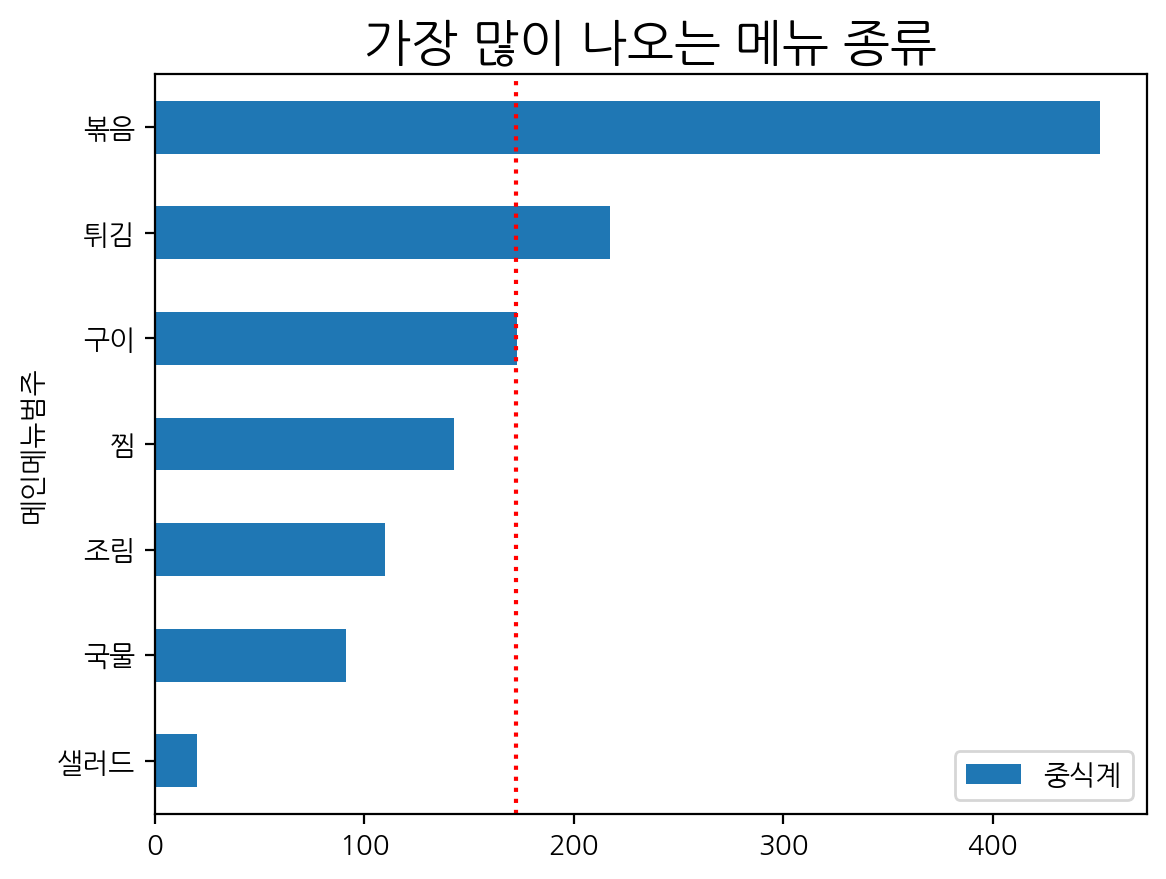

In [170]:
lunch.groupby('메인메뉴범주').agg({'중식계':'count'}).sort_values(by='중식계').plot.barh()
plt.axvline(lunch.groupby('메인메뉴범주').agg('count')['중식계'].mean(), c='red', ls=':')
plt.title("가장 많이 나오는 메뉴 종류", fontsize=18);

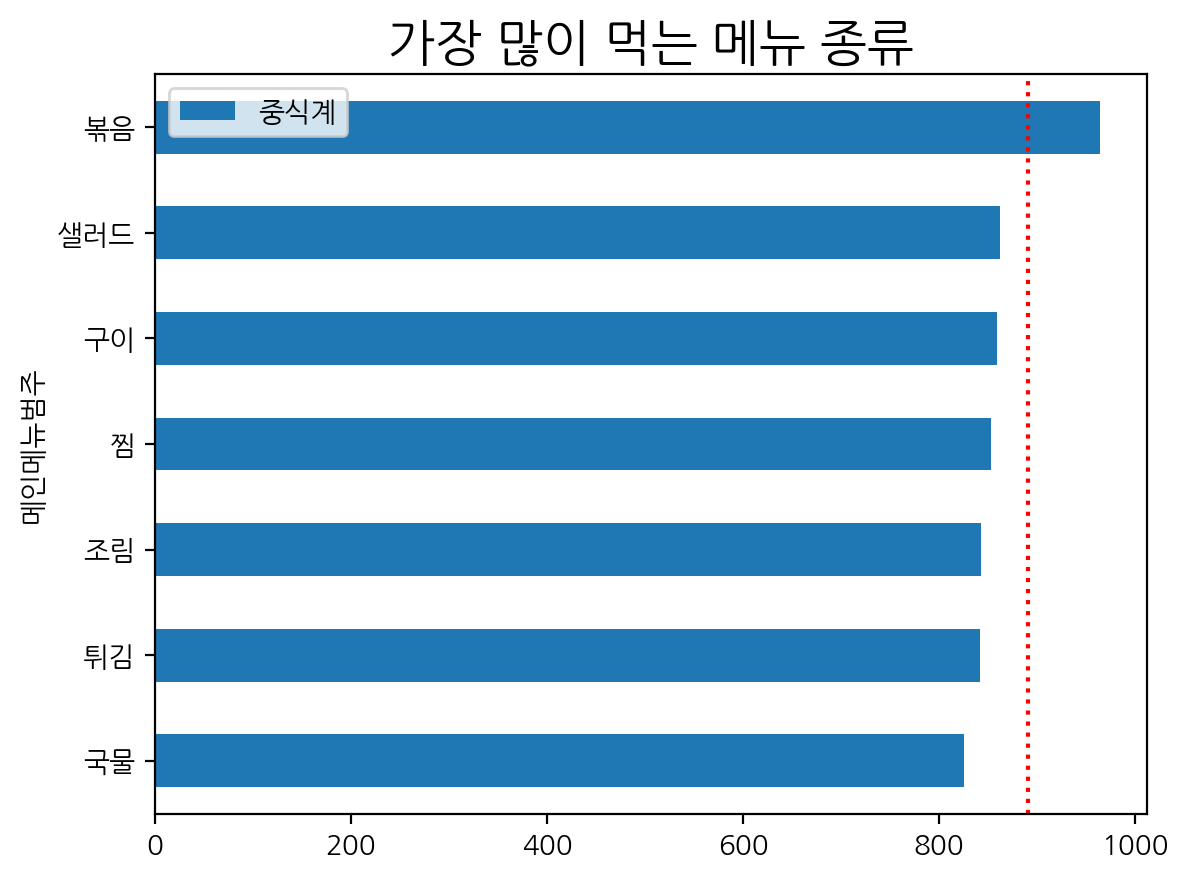

In [171]:
lunch.groupby('메인메뉴범주').agg({'중식계':'mean'}).sort_values(by='중식계').plot.barh()
plt.axvline(lunch['중식계'].mean(), c='red', ls=':')
plt.title("가장 많이 먹는 메뉴 종류", fontsize=18);

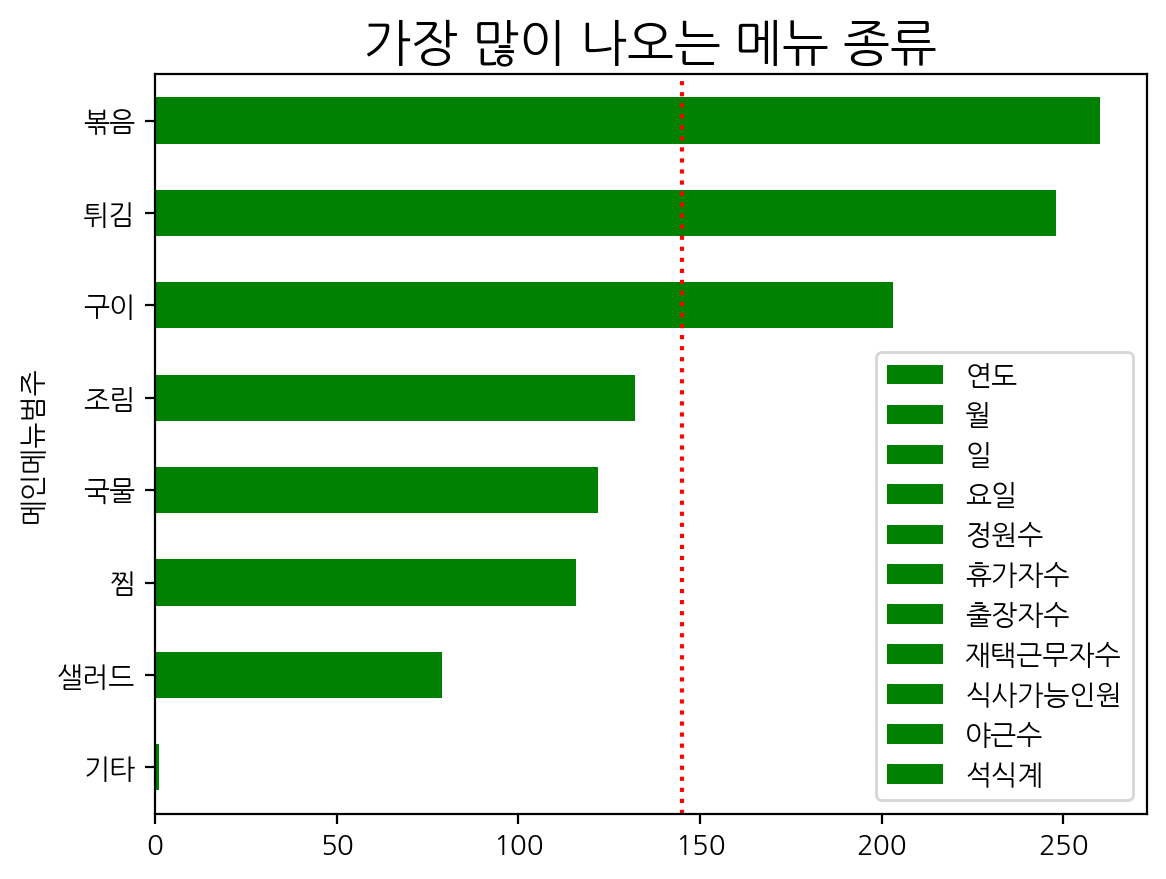

In [172]:
dinner.groupby('메인메뉴범주').agg('count').sort_values(by='석식계').plot.barh(color='g')
plt.axvline(dinner.groupby('메인메뉴범주').agg('count')['석식계'].mean(), c='red', ls=':')
plt.title("가장 많이 나오는 메뉴 종류", fontsize=18);

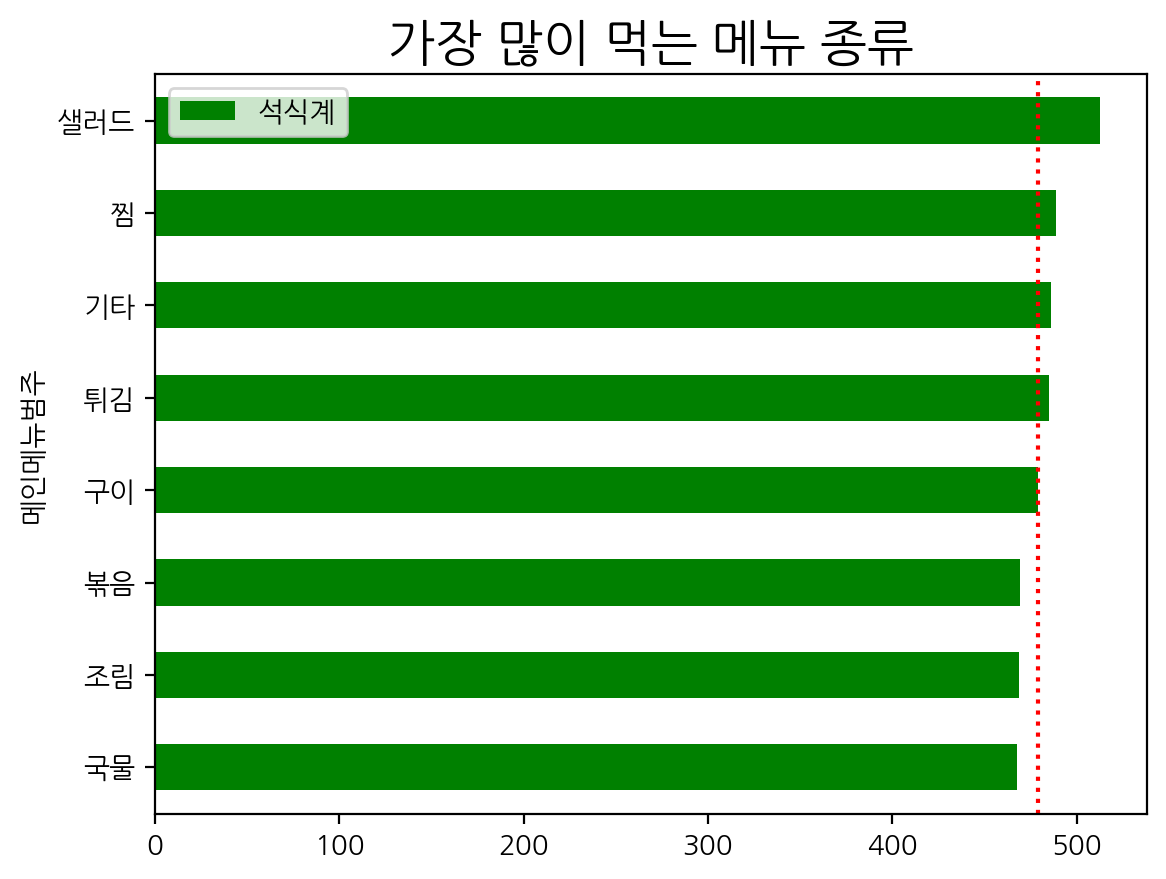

In [173]:
dinner.groupby('메인메뉴범주').agg({'석식계':'mean'}).sort_values(by='석식계').plot.barh(color='g')
plt.axvline(dinner['석식계'].mean(), c='red', ls=':')
plt.title("가장 많이 먹는 메뉴 종류", fontsize=18);

In [174]:
train_dinner.loc[(train_dinner['연도']==2020) & (train_dinner['월']==5) & (train_dinner['일']==12), '메인메뉴범주'] = '찜'

In [175]:
# 메인메뉴범주 인코딩
train_lunch = pd.get_dummies(train_lunch).copy()
test_lunch = pd.get_dummies(test_lunch).copy()
train_dinner = pd.get_dummies(train_dinner).copy()
test_dinner = pd.get_dummies(test_dinner).copy()

In [176]:
# 범주에서 기타 제거
train_dinner = train_dinner.drop(columns='메인메뉴범주_기타').copy()

In [177]:
# train_dinner.loc[train_dinner['메인메뉴범주_기타']==1, '메인메뉴범주_찜'] = 1
# train_dinner.loc[train_dinner['메인메뉴범주_기타']==1, '메인메뉴범주_기타'] = 0

In [178]:
# train_dinner = train_dinner.drop(columns='메인메뉴범주_기타')

In [179]:
# train_dinner.columns

In [180]:
# train_dinner = train_dinner[['메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]

## 검증 점수

In [181]:
# 제출 파일
submission = pd.read_csv(file_name[1])
submission

일자  중식계  석식계
0   2021-01-27    0    0
1   2021-01-28    0    0
2   2021-01-29    0    0
3   2021-02-01    0    0
4   2021-02-02    0    0
5   2021-02-03    0    0
6   2021-02-04    0    0
7   2021-02-05    0    0
8   2021-02-08    0    0
9   2021-02-09    0    0
10  2021-02-10    0    0
11  2021-02-15    0    0
12  2021-02-16    0    0
13  2021-02-17    0    0
14  2021-02-18    0    0
15  2021-02-19    0    0
16  2021-02-22    0    0
17  2021-02-23    0    0
18  2021-02-24    0    0
19  2021-02-25    0    0
20  2021-02-26    0    0
21  2021-03-02    0    0
22  2021-03-03    0    0
23  2021-03-04    0    0
24  2021-03-05    0    0
25  2021-03-08    0    0
26  2021-03-09    0    0
27  2021-03-10    0    0
28  2021-03-11    0    0
29  2021-03-12    0    0
30  2021-03-15    0    0
31  2021-03-16    0    0
32  2021-03-17    0    0
33  2021-03-18    0    0
34  2021-03-19    0    0
35  2021-03-22    0    0
36  2021-03-23    0    0
37  2021-03-24    0    0
38  2021-03-25    0    0
39  2021-03-26    0    0
40  2021-03-29    0    0
41  2021-03-30    0    0
42  2021-03-31    0    0
43  2021-04-01    0    0
44  2021-04-02    0    0
45  2021-04-05    0    0
46  2021-04-06    0    0
47  2021-04-07    0    0
48  2021-04-08    0    0
49  2021-04-09    0    0

In [182]:
# 중식계 스플릿
from sklearn.model_selection import train_test_split

# train_test_split?
X_lunch_train, X_lunch_valid, y_lunch_train, y_lunch_valid = train_test_split(train_lunch, y_lunch, test_size=0.2, random_state=42)
X_dinner_train, X_dinner_valid, y_dinner_train, y_dinner_valid = train_test_split(train_dinner, y_dinner, test_size=0.2, random_state=42)

print(X_lunch_train.shape, X_lunch_valid.shape, y_lunch_train.shape, y_lunch_valid.shape)
print(X_dinner_train.shape, X_dinner_valid.shape, y_dinner_train.shape, y_dinner_valid.shape)

(964, 17) (241, 17) (964,) (241,)
(928, 17) (233, 17) (928,) (233,)


MAE: 74.65298755186723
Index(['메인메뉴범주_조림', '메인메뉴범주_국물', '메인메뉴범주_찜', '메인메뉴범주_구이', '메인메뉴범주_샐러드',
       '메인메뉴범주_튀김', '메인메뉴범주_볶음', '재택근무자수', '연도', '정원수', '일', '월', '식사가능인원',
       '야근수', '출장자수', '휴가자수', '요일'],
      dtype='object')


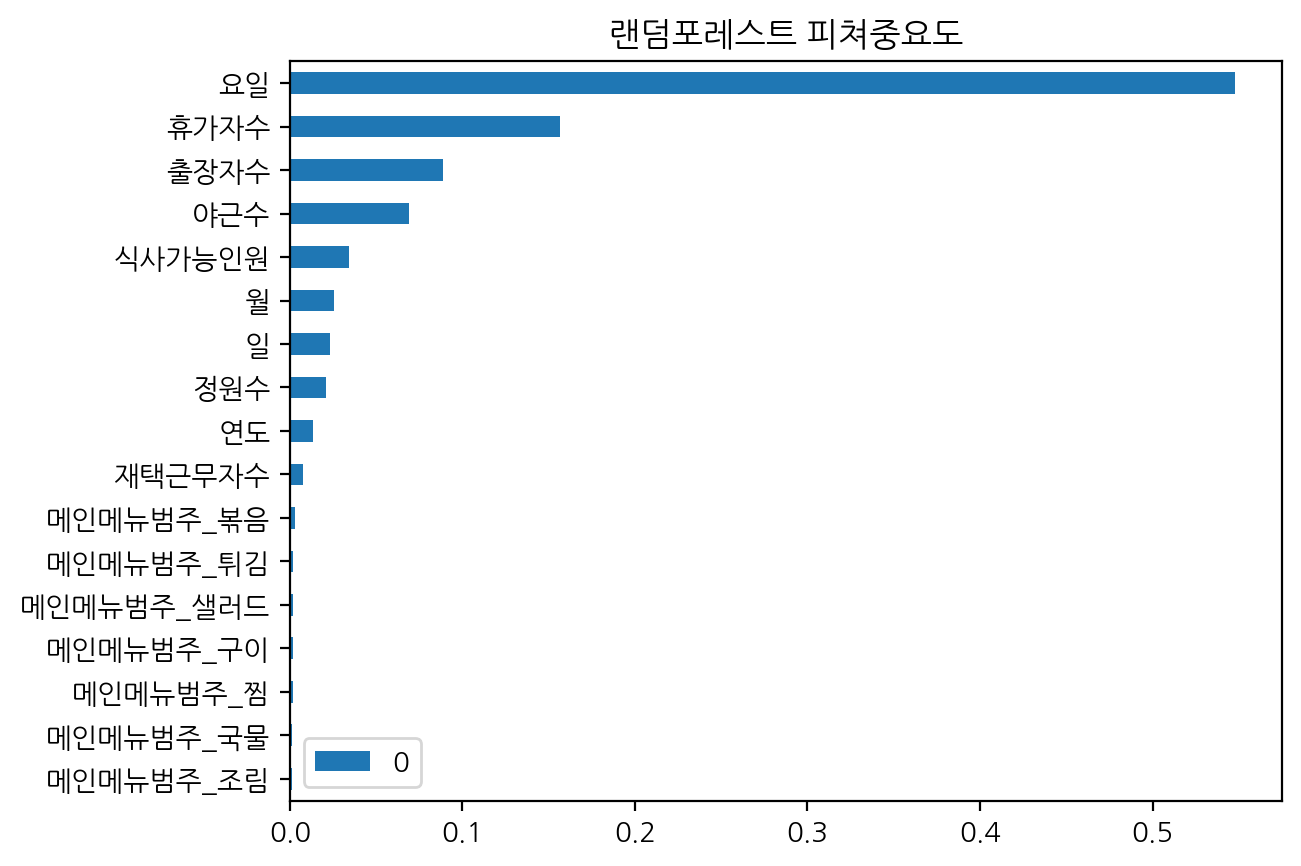

In [183]:
# 중식계 랜덤포레스트 예측
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_lunch_train, y_lunch_train)
y_val_pred = model_rf.predict(X_lunch_valid)

from sklearn.metrics import mean_absolute_error
print(f'MAE: {mean_absolute_error(y_lunch_valid, y_val_pred)}')

fi = pd.DataFrame(model_rf.feature_importances_)
fi.index = model_rf.feature_names_in_
fi = fi.sort_values(by=0)
print(fi.index)
fi.plot(kind='barh', title='랜덤포레스트 피쳐중요도');

MAE: 44.437768240343345
Index(['메인메뉴범주_샐러드', '메인메뉴범주_찜', '메인메뉴범주_튀김', '메인메뉴범주_조림', '메인메뉴범주_국물',
       '메인메뉴범주_볶음', '메인메뉴범주_구이', '요일', '재택근무자수', '일', '식사가능인원', '정원수', '월',
       '연도', '출장자수', '휴가자수', '야근수'],
      dtype='object')


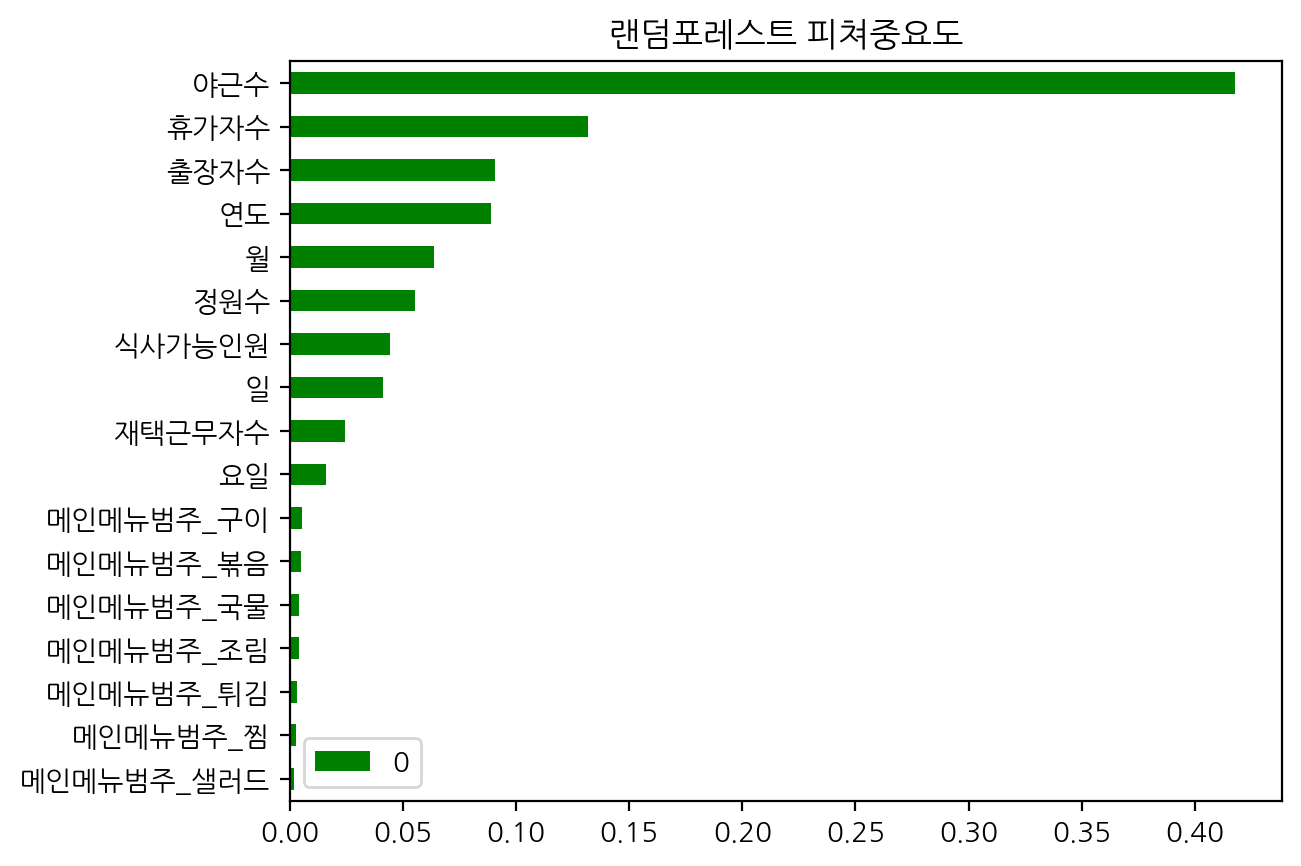

In [184]:
# 석식계 예측
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_dinner_train, y_dinner_train)
y_val_pred = model_rf.predict(X_dinner_valid)

from sklearn.metrics import mean_absolute_error
print(f'MAE: {mean_absolute_error(y_dinner_valid, y_val_pred)}')

fi = pd.DataFrame(model_rf.feature_importances_)
fi.index = model_rf.feature_names_in_
fi = fi.sort_values(by=0)
print(fi.index)
fi.plot(kind='barh', title='랜덤포레스트 피쳐중요도', color='g');

## 제출

### 랜덤포레스트

In [185]:
# # 모든 피쳐 사용
# from sklearn.ensemble import RandomForestRegressor

# model_lunch = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)
# model_lunch.fit(train_lunch, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch)

# model_dinner = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)

# model_dinner.fit(train_dinner, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_n300_1차.csv', index=False)

In [186]:
# # 메뉴 범주화 눈물을 머금고 제외하고 돌리기
# train_lunch_feature = train_lunch[['재택근무자수', '연도', '정원수', '일', '월', '식사가능인원',
#        '야근수', '출장자수', '휴가자수', '요일']]
# train_dinner_feature = train_dinner[['요일', '재택근무자수', '일', '식사가능인원',
#        '정원수', '월', '연도', '출장자수', '휴가자수', '야근수']]
# test_lunch_feature = test_lunch[['재택근무자수', '연도', '정원수', '일', '월', '식사가능인원',
#        '야근수', '출장자수', '휴가자수', '요일']]
# test_dinner_feature = test_dinner[['요일', '재택근무자수', '일', '식사가능인원',
#        '정원수', '월', '연도', '출장자수', '휴가자수', '야근수']]

In [187]:
# model_lunch = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)
# model_lunch.fit(train_lunch_feature, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch_feature)

# model_dinner = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)

# model_dinner.fit(train_dinner_feature, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner_feature)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_n300_2차.csv', index=False)

In [188]:
# # 점수가 더 나빠졌네..? 다시 메뉴 넣어야 겠네??
# # 휴가자수도 로그취해서 정규분포형태로 만들어줬고 다른 피처도 걸러내고
# train_lunch_feature = train_lunch[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]
# train_dinner_feature = train_dinner[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]
# test_lunch_feature = test_lunch[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]
# test_dinner_feature = test_dinner[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]

In [189]:
# model_lunch = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)
# model_lunch.fit(train_lunch_feature, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch_feature)

# model_dinner = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)

# model_dinner.fit(train_dinner_feature, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner_feature)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_n300_3차.csv', index=False)

In [190]:
# # 휴가자수 로그 취하지 않는 것이 결과가 더 좋군..
# train_lunch_feature['휴가자수'] = np.expm1(train_lunch_feature['휴가자수'])
# test_lunch_feature['휴가자수'] = np.expm1(test_lunch_feature['휴가자수'])
# train_dinner_feature['휴가자수'] = np.expm1(train_dinner_feature['휴가자수'])
# test_dinner_feature['휴가자수'] = np.expm1(test_dinner_feature['휴가자수'])

In [191]:
# model_lunch = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)
# model_lunch.fit(train_lunch_feature, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch_feature)

# fi = pd.DataFrame(model_lunch.feature_importances_)
# fi.index = model_lunch.feature_names_in_
# fi = fi.sort_values(by=0)
# fi.plot(kind='barh', title='중식계 랜덤포레스트 피쳐중요도');

# model_dinner = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)

# model_dinner.fit(train_dinner_feature, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner_feature)

# fi = pd.DataFrame(model_dinner.feature_importances_)
# fi.index = model_dinner.feature_names_in_
# fi = fi.sort_values(by=0)
# fi.plot(kind='barh', title='석식계 랜덤포레스트 피쳐중요도');

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_n300_3_2차.csv', index=False)

In [192]:
# # 그래도 난 레이블 스무딩에 이유가 있다고 생각하니깐 그대로 간다...
# # 점심과 저녁 피처 다르게 하기
# train_lunch_feature = train_lunch[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수']]
# train_dinner_feature = train_dinner[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]
# test_lunch_feature = test_lunch[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수']]
# test_dinner_feature = test_dinner[['월', '일', '요일', '휴가자수', '출장자수', '식사가능인원', '야근수',
#        '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림',
#        '메인메뉴범주_찜', '메인메뉴범주_튀김']]

In [193]:
# model_lunch = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)
# model_lunch.fit(train_lunch_feature, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch_feature)

# model_dinner = RandomForestRegressor(random_state=42,
#                                  criterion='absolute_error',
#                                  n_estimators=300, n_jobs=-1)

# model_dinner.fit(train_dinner_feature, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner_feature)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_n300_4차.csv', index=False)

### 캣부스트

In [194]:
# # 캣부스트
# import catboost

# model_lunch = catboost.CatBoostRegressor(loss_function='MAE', random_state=42, eval_metric='MAE', logging_level='Silent')

# from sklearn.model_selection import RandomizedSearchCV

# set_n_estimators = list(range(200, 500, 10))
# set_learning_rate = [lr / 100 for lr in list(range(10, 100, 1))]

# params = {
#     'n_estimators': set_n_estimators,
#     'learning_rate': set_learning_rate
# }

# cbrg = RandomizedSearchCV(model_lunch, params, n_jobs=-1, cv=10)
# cbrg.fit(train_lunch, y_lunch)

# best_model = cbrg.best_estimator_

# y_lunch_predict = best_model.predict(test_lunch)

In [195]:
# model_dinner = catboost.CatBoostRegressor(loss_function='MAE', random_state=42, eval_metric='MAE', logging_level='Silent')

# set_n_estimators = list(range(200, 500, 10))
# set_learning_rate = [lr / 100 for lr in list(range(10, 100, 1))]

# params = {
#     'n_estimators': set_n_estimators,
#     'learning_rate': set_learning_rate
# }

# cbrg = RandomizedSearchCV(model_dinner, params, n_jobs=-1, cv=10)
# cbrg.fit(train_dinner, y_dinner)

# best_model = cbrg.best_estimator_

# y_dinner_predict = best_model.predict(test_dinner)

In [196]:
# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('catboost_1차.csv', index=False)

### 공휴일변수 추가

In [197]:
# # 지원님의 공휴일변수
# train_lunch_2 = pd.read_csv('data/공휴일추가/train_lunch_hm1.csv')
# test_lunch_2 = pd.read_csv('data/공휴일추가/test_lunch_hm1.csv')
# train_dinner_2 = pd.read_csv('data/공휴일추가/train_dinner_hm1.csv')
# test_dinner_2 = pd.read_csv('data/공휴일추가/test_dinner_hm1.csv')

In [198]:
# # 합치기
# train_lunch = pd.concat([train_lunch[['월', '일', '요일', '휴가자수', '출장자수', '야근수', '식사가능인원']].reset_index(drop=True),train_lunch_2[['공휴일전', '공휴일후', '연차쓰기좋은날', '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림', '메인메뉴범주_찜', '메인메뉴범주_튀김']]], axis=1)
# test_lunch = pd.concat([test_lunch[['월', '일', '요일', '휴가자수', '출장자수', '야근수', '식사가능인원']].reset_index(drop=True),test_lunch_2[['공휴일전', '공휴일후', '연차쓰기좋은날', '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림', '메인메뉴범주_찜', '메인메뉴범주_튀김']]], axis=1)
# train_dinner = pd.concat([train_dinner[['월', '일', '요일', '휴가자수', '출장자수', '야근수', '식사가능인원']].reset_index(drop=True),train_dinner_2[['공휴일전', '공휴일후', '연차쓰기좋은날', '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림', '메인메뉴범주_찜', '메인메뉴범주_튀김']]], axis=1)
# test_dinner = pd.concat([test_dinner[['월', '일', '요일', '휴가자수', '출장자수', '야근수', '식사가능인원']].reset_index(drop=True),test_dinner_2[['공휴일전', '공휴일후', '연차쓰기좋은날', '메인메뉴범주_구이', '메인메뉴범주_국물', '메인메뉴범주_볶음', '메인메뉴범주_샐러드', '메인메뉴범주_조림', '메인메뉴범주_찜', '메인메뉴범주_튀김']]], axis=1)

In [199]:
# # 타입변경
# train_lunch['휴가자수'] = train_lunch['휴가자수'].astype(int)
# test_lunch['휴가자수'] = test_lunch['휴가자수'].astype(int)
# train_dinner['휴가자수'] = train_dinner['휴가자수'].astype(int)
# test_dinner['휴가자수'] = test_dinner['휴가자수'].astype(int)

In [200]:
# # train, valid
# X_lunch_train, X_lunch_valid, y_lunch_train, y_lunch_valid = train_test_split(train_lunch, y_lunch, test_size=0.2, random_state=42)
# X_dinner_train, X_dinner_valid, y_dinner_train, y_dinner_valid = train_test_split(train_dinner, y_dinner, test_size=0.2, random_state=42)

# print(X_lunch_train.shape, X_lunch_valid.shape, y_lunch_train.shape, y_lunch_valid.shape)
# print(X_dinner_train.shape, X_dinner_valid.shape, y_dinner_train.shape, y_dinner_valid.shape)

In [201]:
# # 랜덤포레스트 랜덤서치
# model = RandomForestRegressor(random_state=42, criterion='absolute_error')

In [202]:
# # 런치
# from sklearn.model_selection import RandomizedSearchCV

# param_distributions = {'max_depth':[i for i in range(5, 10, 1)],
#                        'max_features':[i for i in np.arange(0.8, 1.0, 0.01)],
#                        'n_estimators':[i for i in range(200, 800, 50)],
#                        'max_samples':[i for i in np.arange(0.5, 0.8, 0.05)]    
# }

# reg = RandomizedSearchCV(estimator=model,
#                          param_distributions=param_distributions,
#                          cv=10,
#                          n_jobs=-1,
#                          scoring='neg_mean_absolute_error',
#                          random_state=42,
#                          n_iter=100,
#                          verbose=1)

# reg.fit(X_lunch_train, y_lunch_train)

# reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

In [203]:
# y_lunch_predict = reg.best_estimator_.fit(X_lunch_train, y_lunch_train).predict(X_lunch_valid)

# print(f'MAE: {mean_absolute_error(y_lunch_valid, y_lunch_predict)}')

# fi = pd.DataFrame(reg.best_estimator_.feature_importances_)
# fi.index = reg.best_estimator_.feature_names_in_
# fi = fi.sort_values(by=0)
# fi.plot(kind='barh', title='랜덤포레스트 피쳐중요도');

In [204]:
# # 랜덤포레스트 랜덤서치
# model = RandomForestRegressor(random_state=42, criterion='absolute_error')

In [205]:
# # 디너
# param_distributions = {'max_depth':[i for i in range(5, 10, 1)],
#                        'max_features':[i for i in np.arange(0.8, 1.0, 0.01)],
#                        'n_estimators':[i for i in range(200, 800, 50)],
#                        'max_samples':[i for i in np.arange(0.5, 0.8, 0.05)]    
# }

# reg = RandomizedSearchCV(estimator=model,
#                          param_distributions=param_distributions,
#                          cv=10,
#                          n_jobs=-1,
#                          scoring='neg_mean_absolute_error',
#                          random_state=42,
#                          n_iter=100,
#                          verbose=1)

# reg.fit(X_dinner_train, y_dinner_train)

# reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

In [206]:
# y_dinner_predict = reg.best_estimator_.fit(X_dinner_train, y_dinner_train).predict(X_dinner_valid)

# print(f'MAE: {mean_absolute_error(y_dinner_valid, y_dinner_predict)}')

# fi = pd.DataFrame(reg.best_estimator_.feature_importances_)
# fi.index = reg.best_estimator_.feature_names_in_
# fi = fi.sort_values(by=0)
# fi.plot(kind='barh', title='랜덤포레스트 피쳐중요도');

In [207]:
# # 제출용
# model_lunch = RandomForestRegressor(criterion='absolute_error', max_depth=9,
#                        max_features=0.8800000000000001,
#                        max_samples=0.8000000000000003, n_estimators=600,
#                        random_state=42)

# model_lunch.fit(train_lunch, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch)

# model_dinner = RandomForestRegressor(criterion='absolute_error', max_depth=9,
#                        max_features=0.9600000000000002,
#                        max_samples=0.7500000000000002, n_estimators=500,
#                        random_state=42)

# model_dinner.fit(train_dinner, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_rs.csv', index=False)

In [208]:
# # 랜덤서치가 찾은 최적 전후로 그리드 서치하기!
# # 랜덤포레스트 그리드서치
# model = RandomForestRegressor(random_state=42, criterion='absolute_error')

In [209]:
# # 런치
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_depth':[9,10,11,12],
#               'max_features':[i for i in np.arange(0.8, 1.05, 0.05)],
#               'n_estimators':[i for i in range(500, 850, 50)],
#               'max_samples':[i for i in np.arange(0.7, 0.95, 0.05)]    
# }

# reg = GridSearchCV(estimator=model,
#                    param_grid=param_grid,
#                    cv=10,
#                    n_jobs=-1,
#                    scoring='neg_mean_absolute_error',
#                    verbose=2)

# reg.fit(X_dinner_train, y_dinner_train)

# reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

In [210]:
# # 디너
# from sklearn.model_selection import GridSearchCV

# param_grid = {'max_depth':[9,10,11,12],
#               'max_features':[i for i in np.arange(0.9, 1.01, 0.01)],
#               'n_estimators':[i for i in range(500, 850, 50)],
#               'max_samples':[i for i in np.arange(0.7, 0.95, 0.05)]    
# }

# reg = GridSearchCV(estimator=model,
#                    param_grid=param_grid,
#                    cv=10,
#                    n_jobs=-1,
#                    scoring='neg_mean_absolute_error',
#                    verbose=2)

# reg.fit(X_dinner_train, y_dinner_train)

# reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

In [211]:
# # 제출용
# model_lunch = RandomForestRegressor()

# model_lunch.fit(train_lunch, y_lunch)
# y_lunch_predict = model_lunch.predict(test_lunch)

# model_dinner = RandomForestRegressor()

# model_dinner.fit(train_dinner, y_dinner)
# y_dinner_predict = model_dinner.predict(test_dinner)

# submission['중식계'] = y_lunch_predict
# submission['석식계'] = y_dinner_predict
# submission[['중식계', '석식계']].astype(int)

# submission.to_csv('rf_rs.csv', index=False)

### catboost

In [212]:
train_lunch = pd.read_csv('https://raw.githubusercontent.com/JounKK/AIS8_task/main/Mid2/merged_train_lunch.csv')
train_dinner = pd.read_csv('https://raw.githubusercontent.com/JounKK/AIS8_task/main/Mid2/merged_train_dinner.csv')
test_lunch = pd.read_csv('https://raw.githubusercontent.com/JounKK/AIS8_task/main/Mid2/merged_test_lunch.csv')
test_dinner = pd.read_csv('https://raw.githubusercontent.com/JounKK/AIS8_task/main/Mid2/merged_test_dinner.csv')

In [213]:
train_dinner.columns

Index(['공휴일후', '종류', '식사가능인원', '출장자수', '월', '공휴일전', '연차쓰기좋은날', '일', '야근수',
       '휴가자수', '석식계', '반찬1', '요일', '재택근무자수', '국', '정원수', '메인메뉴범주_조림',
       '메인메뉴범주_찜', '메인메뉴범주_샐러드', '메인메뉴범주_국물', '메인메뉴범주_튀김', '메인메뉴범주_볶음', '연',
       '메인메뉴범주_구이'],
      dtype='object')

In [214]:
train_lunch = train_lunch[['휴가자수', '공휴일후', '식사가능인원', '요일', '출장자수', '월', '공휴일전', '야근수', '일', '반찬1', '재택근무자수', '중식계', '메인메뉴범주_볶음']].copy()
test_lunch = test_lunch[['휴가자수', '공휴일후', '식사가능인원', '요일', '출장자수', '월', '공휴일전', '야근수', '일', '반찬1', '재택근무자수', '메인메뉴범주_볶음']].copy()
train_dinner = train_dinner[['휴가자수', '공휴일후', '식사가능인원', '요일', '출장자수', '월', '공휴일전', '야근수', '일', '반찬1', '재택근무자수', '석식계', '메인메뉴범주_볶음']].copy()
test_dinner = test_dinner[['휴가자수', '공휴일후', '식사가능인원', '요일', '출장자수', '월', '공휴일전', '야근수', '일', '반찬1', '재택근무자수', '메인메뉴범주_볶음']].copy()

In [215]:
X_train_lunch = train_lunch.drop(columns='중식계').copy()
y_train_lunch = train_lunch['중식계'].copy()
X_test_lunch = test_lunch.copy()
X_train_dinner = train_dinner.drop(columns='석식계').copy()
y_train_dinner = train_dinner['석식계'].copy()
X_test_dinner = test_dinner.copy()

In [216]:
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

model = CatBoostRegressor(random_state=42, loss_function='MAE')

# 하이퍼파라미터 분포 설정
params = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'colsample_bylevel': uniform(0.1, 0.9),
    'subsample': uniform(0.1, 0.9),
    'reg_lambda': uniform(0.1, 99.9)
}

# 랜덤서치 수행
reg = RandomizedSearchCV(model, param_distributions=params, cv=10, n_iter=100, n_jobs=-1, verbose=2, scoring='neg_mean_absolute_error')

# 랜덤서치 모델 학습
reg.fit(X_train_lunch, y_train_lunch)

best_model = reg.best_estimator_

reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0:	learn: 156.0777739	total: 149ms	remaining: 33s
1:	learn: 146.0607999	total: 150ms	remaining: 16.6s
2:	learn: 136.5284801	total: 151ms	remaining: 11.1s
3:	learn: 127.6916905	total: 152ms	remaining: 8.32s
4:	learn: 121.0181098	total: 153ms	remaining: 6.67s
5:	learn: 114.3227909	total: 154ms	remaining: 5.57s
6:	learn: 108.6061787	total: 155ms	remaining: 4.78s
7:	learn: 104.1364585	total: 156ms	remaining: 4.19s
8:	learn: 100.5339761	total: 157ms	remaining: 3.73s
9:	learn: 98.2508613	total: 158ms	remaining: 3.37s
10:	learn: 94.8947432	total: 159ms	remaining: 3.06s
11:	learn: 92.0445329	total: 160ms	remaining: 2.81s
12:	learn: 89.4590771	total: 161ms	remaining: 2.6s
13:	learn: 87.7885032	total: 162ms	remaining: 2.42s
14:	learn: 86.2717647	total: 163ms	remaining: 2.26s
15:	learn: 84.2132649	total: 164ms	remaining: 2.12s
16:	learn: 82.6334290	total: 165ms	remaining: 2s
17:	learn: 81.2175495	total: 166ms	remaining: 1.89s
18:	le

191:	learn: 49.7794487	total: 335ms	remaining: 54.2ms
192:	learn: 49.7720243	total: 336ms	remaining: 52.3ms
193:	learn: 49.6674984	total: 337ms	remaining: 50.4ms
194:	learn: 49.6063156	total: 338ms	remaining: 48.6ms
195:	learn: 49.5176606	total: 339ms	remaining: 46.7ms
196:	learn: 49.4545623	total: 340ms	remaining: 44.9ms
197:	learn: 49.4266730	total: 341ms	remaining: 43.1ms
198:	learn: 49.3724002	total: 342ms	remaining: 41.2ms
199:	learn: 49.3448200	total: 343ms	remaining: 39.4ms
200:	learn: 49.3075337	total: 344ms	remaining: 37.6ms
201:	learn: 49.2531805	total: 345ms	remaining: 35.8ms
202:	learn: 49.2318659	total: 345ms	remaining: 34ms
203:	learn: 49.1431481	total: 346ms	remaining: 32.3ms
204:	learn: 49.0548043	total: 347ms	remaining: 30.5ms
205:	learn: 49.0201000	total: 348ms	remaining: 28.7ms
206:	learn: 48.9847608	total: 349ms	remaining: 27ms
207:	learn: 48.9542185	total: 350ms	remaining: 25.2ms
208:	learn: 48.8764975	total: 351ms	remaining: 23.5ms
209:	learn: 48.8225890	total: 35

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
57       1.292225      0.229871         0.003704        0.001489   
52       0.356624      0.044999         0.002502        0.000500   
75       1.990410      0.262265         0.002602        0.000490   
31       3.239937      0.384422         0.002901        0.000539   
5        1.189582      0.056936         0.002402        0.000490   
..            ...           ...              ...             ...   
22       8.633801      0.582834         0.003703        0.000459   
17       3.286036      1.180014         0.003804        0.000749   
78       4.950725      0.629135         0.004804        0.002137   
11      13.427749      0.540259         0.004704        0.000782   
43       0.410173      0.038920         0.003003        0.000448   

   param_colsample_bylevel param_learning_rate param_max_depth  \
57                0.609581            0.115037               4   
52                0.512298            0.146491               3   
75                0.239608            0.086758               4   
31                0.729922            0.074047               4   
5                 0.930725            0.059939               3   
..                     ...                 ...             ...   
22                0.911375            0.172538               7   
17                0.413535            0.200327               9   
78                0.627265            0.198555               9   
11                0.568082            0.202024               9   
43                0.134467            0.023587               6   

   param_n_estimators param_reg_lambda param_subsample  ... split3_test_score  \
57                223         47.24091        0.979845  ...        -61.527734   
52                146        45.268673        0.681409  ...        -61.937689   
75                873         73.91889        0.360737  ...        -62.415990   
31                904         38.49514         0.56459  ...        -60.434927   
5                 512         9.797241        0.787155  ...        -61.954308   
..                ...              ...             ...  ...               ...   
22                969        90.183455        0.174626  ...        -68.625166   
17                160         36.77514        0.842869  ...        -74.963534   
78                179        57.140204        0.202311  ...        -70.101922   
11                531        53.600809        0.176719  ...        -74.573735   
43                115        30.027158        0.337713  ...        -82.539278   

    split4_test_score  split5_test_score  split6_test_score  \
57         -71.808749         -69.729544         -66.452116   
52         -74.291246         -70.318085         -70.115847   
75         -70.845579         -67.533590         -69.909527   
31         -72.321145         -71.226617         -70.646892   
5          -73.179224         -71.100118         -71.206777   
..                ...                ...                ...   
22         -78.928527         -72.661130         -80.475975   
17         -80.509284         -76.711713         -74.460574   
78         -82.429026         -78.180091         -77.485713   
11         -83.836405         -81.736054         -79.325959   
43        -103.288089        -105.433591         -98.954155   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
57         -76.983813         -83.942499         -88.219866       -71.290933   
52         -77.698365         -86.055571         -90.075190       -72.106110   
75         -78.041526         -79.767923         -88.046834       -72.140995   
31         -77.339219         -84.643410         -88.745662       -72.361415   
5          -77.099076         -84.399703         -86.655046       -72.371232   
..                ...                ...                ...              ...   
22         -78.954731        -105.348209        -103.187209       -80.847530   
17         -88.958528   

(<catboost.core.CatBoostRegressor at 0x2450a52beb0>, None)

In [217]:
y_lunch_predict = best_model.fit(X_train_lunch, y_train_lunch).predict(X_test_lunch)
submission['중식계'] = y_lunch_predict

0:	learn: 156.0777739	total: 859us	remaining: 191ms
1:	learn: 146.0607999	total: 2.5ms	remaining: 276ms
2:	learn: 136.5284801	total: 3.53ms	remaining: 259ms
3:	learn: 127.6916905	total: 4.48ms	remaining: 245ms
4:	learn: 121.0181098	total: 5.38ms	remaining: 234ms
5:	learn: 114.3227909	total: 6.41ms	remaining: 232ms
6:	learn: 108.6061787	total: 7.46ms	remaining: 230ms
7:	learn: 104.1364585	total: 8.4ms	remaining: 226ms
8:	learn: 100.5339761	total: 9.3ms	remaining: 221ms
9:	learn: 98.2508613	total: 10.3ms	remaining: 219ms
10:	learn: 94.8947432	total: 11.2ms	remaining: 216ms
11:	learn: 92.0445329	total: 12.3ms	remaining: 216ms
12:	learn: 89.4590771	total: 13.2ms	remaining: 213ms
13:	learn: 87.7885032	total: 14.3ms	remaining: 213ms
14:	learn: 86.2717647	total: 22ms	remaining: 305ms
15:	learn: 84.2132649	total: 23.2ms	remaining: 300ms
16:	learn: 82.6334290	total: 24.2ms	remaining: 293ms
17:	learn: 81.2175495	total: 25.3ms	remaining: 288ms
18:	learn: 80.3472749	total: 26.3ms	remaining: 282ms


158:	learn: 52.0128789	total: 197ms	remaining: 79.3ms
159:	learn: 51.9026878	total: 198ms	remaining: 78ms
160:	learn: 51.8843288	total: 199ms	remaining: 76.6ms
161:	learn: 51.8246972	total: 200ms	remaining: 75.2ms
162:	learn: 51.7553168	total: 200ms	remaining: 73.8ms
163:	learn: 51.6983722	total: 201ms	remaining: 72.5ms
164:	learn: 51.6774789	total: 202ms	remaining: 71.1ms
165:	learn: 51.6159979	total: 203ms	remaining: 69.8ms
166:	learn: 51.5571818	total: 204ms	remaining: 68.4ms
167:	learn: 51.4932709	total: 205ms	remaining: 67.1ms
168:	learn: 51.4077550	total: 206ms	remaining: 65.8ms
169:	learn: 51.3100877	total: 207ms	remaining: 64.5ms
170:	learn: 51.2830836	total: 208ms	remaining: 63.1ms
171:	learn: 51.2014458	total: 208ms	remaining: 61.8ms
172:	learn: 51.1265635	total: 209ms	remaining: 60.5ms
173:	learn: 51.0110093	total: 210ms	remaining: 59.2ms
174:	learn: 50.9542918	total: 211ms	remaining: 57.8ms
175:	learn: 50.7934389	total: 212ms	remaining: 56.5ms
176:	learn: 50.6687800	total: 

In [218]:
# 석식
model = CatBoostRegressor()

# 하이퍼파라미터 분포 설정
params = {
    'learning_rate': uniform(0.01, 0.2),
    'max_depth': randint(3, 10),
    'n_estimators': randint(100, 1000),
    'colsample_bylevel': uniform(0.1, 0.9),
    'subsample': uniform(0.1, 0.9),
    'reg_lambda': uniform(0.1, 99.9)
}

# 랜덤서치 수행
reg = RandomizedSearchCV(model, param_distributions=params, cv=10, n_iter=100, n_jobs=-1, verbose=3)

# 랜덤서치 모델 학습
reg.fit(train_lunch, y_train_lunch)

best_model = reg.best_estimator_

reg.best_estimator_, display(pd.DataFrame(reg.cv_results_).sort_values(by='rank_test_score'))

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0:	learn: 180.3358421	total: 624us	remaining: 573ms
1:	learn: 153.6041194	total: 1.43ms	remaining: 655ms
2:	learn: 133.8979510	total: 1.96ms	remaining: 598ms
3:	learn: 118.5197785	total: 2.46ms	remaining: 563ms
4:	learn: 106.0281755	total: 2.94ms	remaining: 538ms
5:	learn: 91.1109948	total: 3.4ms	remaining: 516ms
6:	learn: 79.2144830	total: 3.88ms	remaining: 505ms
7:	learn: 69.1730350	total: 4.37ms	remaining: 497ms
8:	learn: 60.3325383	total: 4.91ms	remaining: 496ms
9:	learn: 53.2080697	total: 5.41ms	remaining: 491ms
10:	learn: 47.8815933	total: 6.01ms	remaining: 495ms
11:	learn: 43.8863036	total: 6.5ms	remaining: 491ms
12:	learn: 40.9491719	total: 7.05ms	remaining: 491ms
13:	learn: 38.1757100	total: 7.5ms	remaining: 484ms
14:	learn: 34.9102581	total: 7.95ms	remaining: 479ms
15:	learn: 31.7811809	total: 8.41ms	remaining: 474ms
16:	learn: 30.2762359	total: 8.98ms	remaining: 476ms
17:	learn: 28.2248363	total: 9.5ms	remainin

313:	learn: 4.7446111	total: 191ms	remaining: 367ms
314:	learn: 4.7310904	total: 191ms	remaining: 366ms
315:	learn: 4.6952176	total: 192ms	remaining: 366ms
316:	learn: 4.6929112	total: 193ms	remaining: 365ms
317:	learn: 4.6837636	total: 193ms	remaining: 365ms
318:	learn: 4.6758713	total: 194ms	remaining: 364ms
319:	learn: 4.6738753	total: 194ms	remaining: 363ms
320:	learn: 4.6643904	total: 195ms	remaining: 363ms
321:	learn: 4.6625598	total: 196ms	remaining: 362ms
322:	learn: 4.6513284	total: 196ms	remaining: 361ms
323:	learn: 4.6496773	total: 197ms	remaining: 361ms
324:	learn: 4.6477046	total: 197ms	remaining: 360ms
325:	learn: 4.6313425	total: 198ms	remaining: 360ms
326:	learn: 4.6280025	total: 199ms	remaining: 359ms
327:	learn: 4.6135550	total: 200ms	remaining: 359ms
328:	learn: 4.6033802	total: 200ms	remaining: 359ms
329:	learn: 4.5991592	total: 201ms	remaining: 359ms
330:	learn: 4.5972103	total: 202ms	remaining: 359ms
331:	learn: 4.5926812	total: 203ms	remaining: 358ms
332:	learn: 

624:	learn: 2.9182371	total: 372ms	remaining: 174ms
625:	learn: 2.9117143	total: 373ms	remaining: 174ms
626:	learn: 2.9096705	total: 373ms	remaining: 173ms
627:	learn: 2.9075418	total: 374ms	remaining: 173ms
628:	learn: 2.9043126	total: 375ms	remaining: 172ms
629:	learn: 2.9016314	total: 375ms	remaining: 172ms
630:	learn: 2.8985075	total: 376ms	remaining: 171ms
631:	learn: 2.8978255	total: 376ms	remaining: 170ms
632:	learn: 2.8959444	total: 377ms	remaining: 170ms
633:	learn: 2.8954045	total: 377ms	remaining: 169ms
634:	learn: 2.8940614	total: 378ms	remaining: 168ms
635:	learn: 2.8869812	total: 379ms	remaining: 168ms
636:	learn: 2.8850934	total: 379ms	remaining: 167ms
637:	learn: 2.8807627	total: 380ms	remaining: 167ms
638:	learn: 2.8799810	total: 380ms	remaining: 166ms
639:	learn: 2.8773160	total: 381ms	remaining: 166ms
640:	learn: 2.8742753	total: 382ms	remaining: 165ms
641:	learn: 2.8715247	total: 382ms	remaining: 164ms
642:	learn: 2.8686486	total: 383ms	remaining: 164ms
643:	learn: 

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
63       3.301080      0.732718         0.002502        0.000672   
40       3.272877      0.493510         0.002700        0.000463   
26       0.865988      0.046444         0.002202        0.000400   
48       1.365242      0.049216         0.002602        0.000490   
41       2.606156      0.277563         0.002602        0.000664   
..            ...           ...              ...             ...   
33       1.402158      0.326958         0.002402        0.000490   
68       1.475704      0.435086         0.002903        0.000539   
18       1.629188      0.130911         0.002703        0.000641   
31       5.486807      0.391060         0.003603        0.000917   
15       0.372839      0.019171         0.002602        0.000490   

   param_colsample_bylevel param_learning_rate param_max_depth  \
63                0.736485            0.174296               3   
40                0.820735            0.193741               3   
26                0.528098            0.184748               3   
48                0.895846            0.012016               3   
41                0.634991            0.142321               4   
..                     ...                 ...             ...   
33                0.126083             0.03669               6   
68                0.304599            0.017317               3   
18                0.155756            0.026263               4   
31                0.845053            0.016476               9   
15                0.114436            0.042921               9   

   param_n_estimators param_reg_lambda param_subsample  ... split3_test_score  \
63                918         6.119952         0.93263  ...          0.997456   
40                911        46.090046          0.8496  ...          0.998213   
26                423        42.861227        0.863378  ...          0.995957   
48                586        14.499488        0.978505  ...          0.995238   
41                814        71.833939        0.736326  ...          0.997226   
..                ...              ...             ...  ...               ...   
33                539        85.999651        0.528542  ...          0.942922   
68                229        28.359767        0.783626  ...          0.926646   
18                357        57.800957        0.712678  ...          0.927197   
31                220        63.551498        0.552762  ...          0.925145   
15                148        90.875243        0.314274  ...          0.837700   

    split4_test_score  split5_test_score  split6_test_score  \
63           0.999280           0.998500           0.998269   
40           0.998539           0.997959           0.997671   
26           0.997724           0.995227           0.996037   
48           0.996523           0.991343           0.994983   
41           0.997669           0.995410           0.995368   
..                ...                ...                ...   
33           0.943977           0.912818           0.935520   
68           0.924245           0.885722           0.920507   
18           0.923025           0.888708           0.919294   
31           0.921971           0.867380           0.909429   
15           0.807630           0.742662           0.790950   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
63           0.999269           0.998934           0.998971         0.998873   
40           0.998028           0.998817           0.997854         0.998292   
26           0.994954           0.996315           0.992758         0.995875   
48           0.995442           0.996843           0.994808         0.995833   
41           0.996643           0.994133           0.987963         0.995709   
..                ...                ...                ...              ...   
33           0.891144           0.916234           0.841677         0.918600   
68           0.885568   

(<catboost.core.CatBoostRegressor at 0x2450a698340>, None)

In [219]:
y_dinner_predict = best_model.fit(X_train_dinner, y_train_dinner).predict(X_test_dinner)
submission['석식계'] = y_dinner_predict

0:	learn: 103.9042545	total: 538us	remaining: 494ms
1:	learn: 98.4463211	total: 1.22ms	remaining: 559ms
2:	learn: 93.8086574	total: 1.74ms	remaining: 529ms
3:	learn: 90.6985358	total: 2.22ms	remaining: 507ms
4:	learn: 87.7304311	total: 2.69ms	remaining: 492ms
5:	learn: 85.5721046	total: 3.25ms	remaining: 494ms
6:	learn: 84.3954091	total: 3.85ms	remaining: 502ms
7:	learn: 82.0932161	total: 4.46ms	remaining: 507ms
8:	learn: 80.1640616	total: 5.06ms	remaining: 511ms
9:	learn: 78.0598511	total: 5.59ms	remaining: 508ms
10:	learn: 76.7368004	total: 6.09ms	remaining: 502ms
11:	learn: 75.8393050	total: 6.56ms	remaining: 495ms
12:	learn: 74.9717309	total: 7.03ms	remaining: 489ms
13:	learn: 73.9284794	total: 7.53ms	remaining: 486ms
14:	learn: 72.9580737	total: 8.09ms	remaining: 487ms
15:	learn: 72.0037143	total: 8.65ms	remaining: 488ms
16:	learn: 71.6025338	total: 9.21ms	remaining: 488ms
17:	learn: 70.9659425	total: 9.72ms	remaining: 486ms
18:	learn: 70.1228617	total: 10.2ms	remaining: 483ms
19:

335:	learn: 38.7415606	total: 186ms	remaining: 321ms
336:	learn: 38.7048032	total: 186ms	remaining: 321ms
337:	learn: 38.6738244	total: 187ms	remaining: 321ms
338:	learn: 38.6543276	total: 188ms	remaining: 321ms
339:	learn: 38.6127590	total: 188ms	remaining: 320ms
340:	learn: 38.5887888	total: 189ms	remaining: 319ms
341:	learn: 38.5700711	total: 189ms	remaining: 319ms
342:	learn: 38.5184506	total: 190ms	remaining: 318ms
343:	learn: 38.4926118	total: 190ms	remaining: 318ms
344:	learn: 38.4757624	total: 191ms	remaining: 317ms
345:	learn: 38.4453892	total: 191ms	remaining: 316ms
346:	learn: 38.3893494	total: 192ms	remaining: 316ms
347:	learn: 38.3715089	total: 192ms	remaining: 315ms
348:	learn: 38.3631488	total: 193ms	remaining: 315ms
349:	learn: 38.3414713	total: 193ms	remaining: 314ms
350:	learn: 38.3386139	total: 194ms	remaining: 313ms
351:	learn: 38.3007546	total: 194ms	remaining: 313ms
352:	learn: 38.2844764	total: 195ms	remaining: 312ms
353:	learn: 38.2416184	total: 196ms	remaining:

669:	learn: 31.0132861	total: 364ms	remaining: 135ms
670:	learn: 31.0115386	total: 365ms	remaining: 134ms
671:	learn: 31.0102463	total: 365ms	remaining: 134ms
672:	learn: 31.0093667	total: 366ms	remaining: 133ms
673:	learn: 30.9943681	total: 367ms	remaining: 133ms
674:	learn: 30.9756481	total: 367ms	remaining: 132ms
675:	learn: 30.9529700	total: 368ms	remaining: 132ms
676:	learn: 30.9261937	total: 368ms	remaining: 131ms
677:	learn: 30.9177308	total: 369ms	remaining: 131ms
678:	learn: 30.9171291	total: 370ms	remaining: 130ms
679:	learn: 30.8897590	total: 370ms	remaining: 130ms
680:	learn: 30.8779692	total: 371ms	remaining: 129ms
681:	learn: 30.8516500	total: 371ms	remaining: 129ms
682:	learn: 30.8453172	total: 372ms	remaining: 128ms
683:	learn: 30.8122379	total: 373ms	remaining: 127ms
684:	learn: 30.7931872	total: 373ms	remaining: 127ms
685:	learn: 30.7814967	total: 374ms	remaining: 126ms
686:	learn: 30.7550462	total: 374ms	remaining: 126ms
687:	learn: 30.7236289	total: 375ms	remaining:

In [220]:
reg.best_estimator_.get_params()

{'learning_rate': 0.17429640450239675,
 'loss_function': 'RMSE',
 'subsample': 0.9326303677020662,
 'max_depth': 3,
 'n_estimators': 918,
 'colsample_bylevel': 0.7364852329765587,
 'reg_lambda': 6.119951638217578}

In [221]:
submission[['중식계', '석식계']].astype(int)
submission.to_csv('catboost_최종.csv', index=False)